# Part One

Do the imports and initialize variables

- We are going to read a csv with the stations and their names

In [2]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

In [4]:
stations_df = pd.read_csv("Bike Share/Bike Stations.csv")

print(stations_df.dtypes)

stations_df

Station_ID       int64
Station_Name    object
Go_live_date    object
Region          object
Status          object
dtype: object


,Station_ID,Station_Name,Go_live_date,Region,Status
0,3000,Virtual Station,7/7/2016,NaN,Active
1,3005,7th & Flower,7/7/2016,DTLA,Active
2,3006,Olive & 8th,7/7/2016,DTLA,Active
3,3007,5th & Grand,7/7/2016,DTLA,Active
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active
...,...,...,...,...,...
287,4498,Vineland & Oxnard,4/14/2020,North Hollywood,Active
288,4524,Wilshire & Normandie,4/17/2020,DTLA,Active
289,4523,Western & 3rd,4/22/2020,DTLA,Active
290,4502,North Hollywood Plaza,4/23/2020,North Hollywood,Active


Let's see how many are actually active

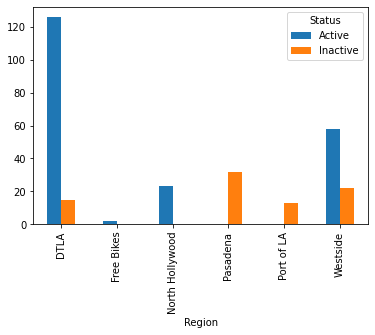

In [2]:
stations_df.groupby("Region")["Status"].value_counts().unstack().plot.bar()

Let's remove all stations that are inactive

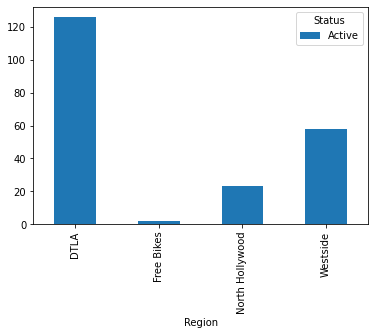

In [5]:
# Get names of indexes for which column Age has value 30
indexInactive = stations_df[ stations_df['Status'] == "Inactive" ].index
# Delete these row indexes from dataFrame
stations_df.drop(indexInactive , inplace=True)
stations_df.groupby("Region")["Status"].value_counts().unstack().plot.bar()

Now let's read in the trips data

In [4]:
trips_df = pd.read_csv("BikeShare/metro-bike-share-trips-2020-q1.csv")

print(trips_df.dtypes)

trips_df

trip_id                  int64
duration                 int64
start_time              object
end_time                object
start_station            int64
start_lat              float64
start_lon              float64
end_station              int64
end_lat                float64
end_lon                float64
bike_id                  int64
plan_duration            int64
trip_route_category     object
passholder_type         object
bike_type               object
dtype: object


,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,134867493,25,1/1/2020 0:16,1/1/2020 0:41,3063,34.048038,-118.253738,4491,34.047440,-118.247940,18419,30,One Way,Monthly Pass,electric
1,134867799,35,1/1/2020 0:24,1/1/2020 0:59,4285,NaN,NaN,4354,34.017681,-118.409081,15661,1,One Way,One Day Pass,smart
2,134868104,37,1/1/2020 0:31,1/1/2020 1:08,4344,34.014309,-118.491341,4322,34.005871,-118.429161,15848,1,One Way,Walk-up,smart
3,134868103,36,1/1/2020 0:32,1/1/2020 1:08,4344,34.014309,-118.491341,4322,34.005871,-118.429161,16053,1,One Way,Walk-up,smart
4,134868102,35,1/1/2020 0:33,1/1/2020 1:08,4344,34.014309,-118.491341,4322,34.005871,-118.429161,15694,1,One Way,Walk-up,smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76386,140275195,65,3/31/2020 22:48,3/31/2020 23:53,4460,33.994850,-118.417961,4460,33.994850,-118.417961,15300,30,Round Trip,Monthly Pass,smart
76387,140274593,23,3/31/2020 23:00,3/31/2020 23:23,3076,34.040600,-118.253838,3031,34.044701,-118.252441,16811,30,One Way,Monthly Pass,electric
76388,140274893,14,3/31/2020 23:23,3/31/2020 23:37,3031,34.044701,-118.252441,3076,34.040600,-118.253838,16811,30,One Way,Monthly Pass,electric
76389,140275293,21,3/31/2020 23:37,3/31/2020 23:58,3076,34.040600,-118.253838,3056,34.037460,-118.265381,16811,30,One Way,Monthly Pass,electric


Unfortunately, the trips do not have latitude or longitude columns. So, we are going to have to do this the hard way and reference the latitude and longitude columns in the trips_df. Then, we will copy them to the stations_df latitude and longitude columns. Now, we will now make empty latitude and longitude columns in the stations_df.

In [5]:
stations_df["latitude"] = ""
stations_df["longitude"] = ""
stations_df

,Station_ID,Station_Name,Go_live_date,Region,Status,latitude,longitude
0,3000,Virtual Station,7/7/2016,NaN,Active,,
1,3005,7th & Flower,7/7/2016,DTLA,Active,,
2,3006,Olive & 8th,7/7/2016,DTLA,Active,,
3,3007,5th & Grand,7/7/2016,DTLA,Active,,
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active,,
...,...,...,...,...,...,...,...
287,4498,Vineland & Oxnard,4/14/2020,North Hollywood,Active,,
288,4524,Wilshire & Normandie,4/17/2020,DTLA,Active,,
289,4523,Western & 3rd,4/22/2020,DTLA,Active,,
290,4502,North Hollywood Plaza,4/23/2020,North Hollywood,Active,,


We will reset the index since it is a bit off

In [6]:
stations_df = stations_df.reset_index(drop=True)
stations_df

,Station_ID,Station_Name,Go_live_date,Region,Status,latitude,longitude
0,3000,Virtual Station,7/7/2016,NaN,Active,,
1,3005,7th & Flower,7/7/2016,DTLA,Active,,
2,3006,Olive & 8th,7/7/2016,DTLA,Active,,
3,3007,5th & Grand,7/7/2016,DTLA,Active,,
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active,,
...,...,...,...,...,...,...,...
205,4498,Vineland & Oxnard,4/14/2020,North Hollywood,Active,,
206,4524,Wilshire & Normandie,4/17/2020,DTLA,Active,,
207,4523,Western & 3rd,4/22/2020,DTLA,Active,,
208,4502,North Hollywood Plaza,4/23/2020,North Hollywood,Active,,


Here let's create a df that will hold the latitude and longitude from the trips_df.
We will use these to replace the empty latitude and longitude columns in stations_df.

In [7]:
lat_lon_df = pd.DataFrame(columns = ['latitude', 'longitude'])
lat_lon_df

,latitude,longitude


We are now going to iterate through the stations and trips, so we can find the latitude and longitude.

In [8]:
found = False

for index, bike in stations_df.iterrows():
    print(bike["Station_ID"])
    for index, trip in trips_df.iterrows():
        if  bike["Station_ID"] == trip["start_station"]:
            found = True
            #bike["latitude"] = trip["start_lat"]
            #bike["longitude"] = trip["start_lon"]
            new_item = {'latitude' : trip['start_lat'],
                        'longitude' : trip['start_lon']
                       }
            lat_lon_df = lat_lon_df.append(new_item, ignore_index=True)
            break
        elif bike["Station_ID"] == trip["end_station"]:
            found = True
            #bike["latitude"] = trip["end_lat"]
            #bike["longitude"] = trip["end_lon"]
            new_item = {'latitude' : trip['end_lat'],
                        'longitude' : trip['end_lon']
                       }
            lat_lon_df = lat_lon_df.append(new_item, ignore_index=True)
            break
    
    if found == False:
        print("lat and lon not found")
        new_item = {'latitude' : np.nan,
                    'longitude' : np.nan}
        lat_lon_df = lat_lon_df.append(new_item, ignore_index=True)
    
    found = False

lat_lon_df

3000
3005
3006
3007
3008
3010
3011
3014
3016
3018
3019
3020
3022
3023
3024
3025
3026
3027
3028
3029
3030
3032
3033
3034
3035
3036
3037
3040
3042
3045
3046
3047
3048
3049
3052
3054
3056
3057
3058
3062
3063
3064
3065
3066
3067
3068
3069
3074
3075
3076
3077
3078
3079
3081
3082
4220
4227
4245
4246
4247
4248
4249
4250
4254
4266
4267
4273
4275
4285
4286
4293
4300
4301
4302
4303
4304
4306
4311
4312
4313
4314
4315
4322
4323
4324
4325
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4372
4378
4379
4380
4381
4382
4383
4384
4385
4387
4389
4390
4393
4394
4396
4397
4400
4401
4404
4405
4406
4408
4409
4410
4413
4414
4415
4416
4417
4418
4419
4420
4422
4425
4426
4427
4428
4429
4430
4431
4432
4436
4437
4438
4439
4440
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4469
4470
4472
4473
4474
4475
4476
4478
4479
4480
4482
4483
4484
4490
4491
4493
4494
4496
4499


,latitude,longitude
0,NaN,NaN
1,34.048500,-118.258537
2,34.045540,-118.256668
3,34.050480,-118.254593
4,34.046612,-118.262733
...,...,...
205,NaN,NaN
206,NaN,NaN
207,NaN,NaN
208,NaN,NaN


We now set the stations_df latitude and longitude columns to lat_lon_df columns.

In [9]:
stations_df.latitude = lat_lon_df.latitude
stations_df.longitude = lat_lon_df.longitude
stations_df

,Station_ID,Station_Name,Go_live_date,Region,Status,latitude,longitude
0,3000,Virtual Station,7/7/2016,NaN,Active,NaN,NaN
1,3005,7th & Flower,7/7/2016,DTLA,Active,34.048500,-118.258537
2,3006,Olive & 8th,7/7/2016,DTLA,Active,34.045540,-118.256668
3,3007,5th & Grand,7/7/2016,DTLA,Active,34.050480,-118.254593
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active,34.046612,-118.262733
...,...,...,...,...,...,...,...
205,4498,Vineland & Oxnard,4/14/2020,North Hollywood,Active,NaN,NaN
206,4524,Wilshire & Normandie,4/17/2020,DTLA,Active,NaN,NaN
207,4523,Western & 3rd,4/22/2020,DTLA,Active,NaN,NaN
208,4502,North Hollywood Plaza,4/23/2020,North Hollywood,Active,NaN,NaN


We will drop the stations that are NaN

In [10]:
stations_df = stations_df[stations_df['latitude'].notna()]
stations_df = stations_df[stations_df['longitude'].notna()]
stations_df = stations_df.reset_index(drop=True)
stations_df

,Station_ID,Station_Name,Go_live_date,Region,Status,latitude,longitude
0,3005,7th & Flower,7/7/2016,DTLA,Active,34.048500,-118.258537
1,3006,Olive & 8th,7/7/2016,DTLA,Active,34.045540,-118.256668
2,3007,5th & Grand,7/7/2016,DTLA,Active,34.050480,-118.254593
3,3008,Figueroa & 9th,7/7/2016,DTLA,Active,34.046612,-118.262733
4,3010,11th & Maple,7/10/2016,DTLA,Active,34.037048,-118.254868
...,...,...,...,...,...,...,...
196,4499,Victory & Colfax,3/5/2020,North Hollywood,Active,34.186569,-118.388008
197,4500,Burbank & Cahuenga,3/5/2020,North Hollywood,Active,34.172100,-118.361816
198,4503,Stanford & Washington,2/27/2020,Westside,Active,33.989700,-118.448883
199,4504,Vista Del Mar & Culver,2/18/2020,Westside,Active,33.958790,-118.448280


Let's visualize the data to see if everything looks okay

In [23]:
import folium
from folium.plugins import MarkerCluster

la_map_dark = folium.Map(location=[34.0522,-118.2437],
                        zoom_start=12,
                        tiles='CartoDB dark_matter')


locations = list(zip(stations_df['latitude'].values, stations_df['longitude'].values))
icons = [folium.Icon(icon="bicycle", prefix="fa") for _ in range(len(locations))]
popups = list(stations_df['Station_Name'].values)
cluster = MarkerCluster(locations = locations, icons = icons, popups = popups)
#folium.LayerControl().add_to(la_map_dark)
la_map_dark.add_child(cluster)
la_map_dark

# Part Two

Now that we have the latitude and longitude in the stations_df, let's also do it the other way around for the trips_df.

(This is sort of redundant, but I need the station names in the bike_df. So, at this point, I have no other choice but to do it again)

Let's convert the time to datetime format and add a hour column (which we will use for another notebook)

In [13]:
trips_df["start_time"] = pd.to_datetime(trips_df["start_time"])
trips_df["stop_time"] = pd.to_datetime(trips_df["end_time"])
trips_df["hour"] = trips_df["start_time"].map(lambda x: x.hour)

Here we are creating a temporary df to hold the station names

In [14]:
start_end_df = pd.DataFrame(columns = ['start_station_name', 'end_station_name'])
start_end_df

,start_station_name,end_station_name


In [ ]:
We run a loop to collect the station names

In [15]:
found_start = False
found_end = False

for index, trip in trips_df.iterrows():
    start_station = "Not Found"
    end_station = "Not Found"
    print(trip["trip_id"])
    for index, station in stations_df.iterrows():
        
        if  station["Station_ID"] == trip["start_station"]:
            found_start = True
            start_station = station["Station_Name"]

        if station["Station_ID"] == trip["end_station"]:
            found_end = True
            end_station = station["Station_Name"]

        if (found_start == True and found_end == True):
            print("   Both Found")
            new_item = {'start_station_name' : start_station,
                        'end_station_name' : end_station
                       }
            start_end_df = start_end_df.append(new_item, ignore_index=True)
            break
    
    if (found_start == False or found_end == False):
        if (found_start == False):
            print("   Start Station not found")
        if (found_end == False):
            print("   End Station not found")
        new_item = {'start_station_name' : start_station,
                    'end_station_name' : end_station
                   }
        start_end_df = start_end_df.append(new_item, ignore_index=True)
    
    found_start = False
    found_end = False

start_end_df

134867493
   Both Found
134867799
   Start Station not found
134868104
   Both Found
134868103
   Both Found
134868102
   Both Found
134867697
   Both Found
134867696
   Both Found
134868099
   Both Found
134868098
   Both Found
134934234
   Both Found
134867492
   Both Found
134867795
   Both Found
134867592
   Both Found
134867693
   Both Found
134867692
   Both Found
134867992
   Both Found
134873722
   End Station not found
134868594
   Both Found
134868898
   Both Found
134868593
   Both Found
134868999
   End Station not found
134868998
   End Station not found
134868592
   Both Found
134868996
   End Station not found
134868693
   End Station not found
134868692
   Both Found
134868893
   Both Found
134869094
   Start Station not found
134869294
   Both Found
134869092
   Start Station not found
134878525
   End Station not found
134870098
   Both Found
134869292
   Both Found
134869392
   Start Station not found
134870095
   Both Found
134870094
   Both Found
134870093
   Both 

   Both Found
134886292
   Both Found
134909988
   End Station not found
134909987
   Both Found
134933885
   Both Found
134909986
   Start Station not found
134909985
   Both Found
134909984
   Both Found
134909983
   Both Found
134909982
   Both Found
134909981
   Both Found
134909980
   Both Found
134909978
   Both Found
134909977
   Both Found
134909975
   Both Found
134909974
   Both Found
134909973
   Both Found
134909972
   Both Found
134909971
   Both Found
134909969
   Both Found
134909970
   Both Found
134909968
   Both Found
134909967
   Both Found
134909966
   Both Found
134909965
   Both Found
134909963
   Both Found
134909962
   End Station not found
134909960
   Start Station not found
   End Station not found
134909958
   Start Station not found
   End Station not found
134909956
   Both Found
134909955
   Both Found
134909954
   Both Found
134909951
   Both Found
134909950
   Both Found
134909949
   Both Found
134909948
   Both Found
134909947
   Both Found
134909946
 

134923994
   Both Found
134924196
   End Station not found
134923993
   Both Found
134923992
   Both Found
134924093
   Both Found
134924092
   Both Found
134924398
   Both Found
134924293
   Both Found
134924396
   Start Station not found
134924499
   Both Found
134924292
   Both Found
134924394
   Both Found
134924496
   Both Found
134924393
   Both Found
134924392
   Both Found
134924493
   Both Found
134924596
   End Station not found
134924492
   Both Found
134925108
   Both Found
134924594
   End Station not found
134924900
   Both Found
134924797
   Both Found
134924593
   Both Found
134924592
   Both Found
134924895
   Both Found
134924794
   Both Found
134924996
   Both Found
134925099
   Both Found
134924793
   Both Found
134924792
   Both Found
134925200
   End Station not found
134925096
   Both Found
134925095
   Both Found
134924993
   Both Found
134925195
   Both Found
134925092
   Both Found
134925296
   Both Found
134925193
   Both Found
134925192
   Both Found
1349252

   Start Station not found
   End Station not found
134932401
   Both Found
134933203
   Start Station not found
134933202
   Both Found
134932505
   Both Found
134932400
   Both Found
134932399
   Both Found
134932502
   Both Found
134932297
   Both Found
134932499
   Both Found
134932295
   Both Found
134932294
   Both Found
134932293
   Both Found
134933191
   Both Found
134932292
   Both Found
134932494
   Both Found
134932392
   Both Found
134932908
   Both Found
134932803
   Both Found
134932492
   Both Found
134932905
   Both Found
134932904
   Both Found
134932698
   Both Found
134932697
   Both Found
134932696
   Both Found
134932695
   Both Found
134933178
   Start Station not found
   End Station not found
134933177
   Start Station not found
   End Station not found
134932797
   Both Found
134932694
   Both Found
134932693
   Both Found
134932794
   Both Found
134932895
   Both Found
134933170
   Both Found
134933169
   Both Found
134932893
   Both Found
134932792
   Both F

   Both Found
134957148
   Both Found
134957147
   Both Found
134957146
   Both Found
134957145
   Both Found
134957144
   Both Found
134957143
   Both Found
134957142
   Both Found
134957141
   End Station not found
134957140
   Both Found
134957139
   Both Found
134957138
   Both Found
134957137
   Both Found
134957136
   Both Found
134957135
   Both Found
134957134
   Both Found
134957133
   Both Found
134957132
   Both Found
134957131
   Both Found
134957130
   Both Found
134957129
   Both Found
134957128
   Both Found
134957127
   Both Found
134957126
   Both Found
134957125
   Both Found
134957124
   Both Found
134957123
   Both Found
134957122
   Both Found
134957121
   Both Found
134957120
   Both Found
134957119
   Both Found
134957118
   Both Found
134957117
   Both Found
134957116
   Both Found
134957115
   Both Found
134957114
   Both Found
134957113
   Both Found
134957112
   Both Found
134957111
   Both Found
134957110
   Both Found
134957109
   Both Found
134957108
   Bo

   Both Found
134972895
   Both Found
134973098
   Both Found
134972894
   Both Found
134972893
   Both Found
134972892
   Both Found
134973397
   Both Found
134973703
   Both Found
134973396
   Both Found
134973094
   Both Found
134973093
   Both Found
134973393
   Both Found
134973092
   Both Found
134973493
   Both Found
134973695
   Both Found
134973696
   Both Found
134973694
   Both Found
134973998
   Both Found
134975335
   End Station not found
134973692
   Both Found
134973793
   Both Found
134973792
   Both Found
134974302
   Both Found
134973892
   Start Station not found
134973993
   Both Found
134973992
   Both Found
135075932
   End Station not found
134974093
   Both Found
134974400
   Both Found
134974092
   Both Found
134974296
   Both Found
134974295
   Both Found
134974396
   Both Found
134974294
   Both Found
134974293
   Both Found
134974292
   Both Found
134974392
   Both Found
134974798
   Both Found
134975106
   Both Found
134974495
   Both Found
134974494
   Bo

   Both Found
134980467
   Both Found
134980466
   Both Found
134980465
   Both Found
134980464
   Both Found
134980463
   Both Found
135004258
   Both Found
134980462
   Both Found
134980460
   Both Found
134980461
   Both Found
135004254
   End Station not found
134980459
   Both Found
134980458
   Both Found
134980457
   Both Found
134980456
   Both Found
134980455
   Both Found
135004248
   End Station not found
134980454
   Both Found
134980453
   Both Found
134980452
   Both Found
134980449
   Both Found
134980448
   Both Found
134980447
   Both Found
134980446
   Both Found
134980445
   Start Station not found
134980444
   Both Found
134980443
   Both Found
134980442
   End Station not found
134980441
   Both Found
134980440
   Both Found
134980439
   Both Found
134980438
   Both Found
134980437
   Both Found
134980436
   Both Found
134980435
   Both Found
134980434
   Both Found
134980433
   Both Found
134980432
   Both Found
134980431
   End Station not found
134980430
   Both

   Both Found
135004327
   Both Found
135004326
   Both Found
135004325
   Both Found
135004324
   Both Found
135004323
   Both Found
135004322
   Both Found
135004321
   Both Found
135004320
   Both Found
135004319
   Both Found
135004318
   Both Found
135004317
   Both Found
135004316
   Both Found
135004315
   Both Found
135004314
   Both Found
135004312
   Both Found
135004311
   Both Found
135004310
   Both Found
135004309
   Both Found
135004308
   Both Found
135004307
   Both Found
135004305
   Both Found
135004304
   Both Found
135004303
   Both Found
135004302
   Both Found
135004301
   Both Found
135004565
   Both Found
135004300
   Start Station not found
135004298
   Both Found
135004561
   Start Station not found
   End Station not found
135004560
   End Station not found
135004297
   Both Found
135004296
   Both Found
135004295
   Both Found
135004294
   Both Found
135004555
   Both Found
135004554
   Both Found
135004293
   Start Station not found
135004292
   Start Stat

   Both Found
135023393
   Both Found
135023192
   Both Found
135023802
   Both Found
135023493
   Both Found
135024010
   Both Found
135023592
   Both Found
135024115
   Start Station not found
135024008
   Start Station not found
135023902
   Both Found
135024006
   Both Found
135023692
   Both Found
135024004
   Both Found
135023900
   Both Found
135025354
   Both Found
135023797
   Both Found
135023796
   Both Found
135024106
   Both Found
135024105
   Both Found
135027411
   Both Found
135024102
   Both Found
135024509
   Both Found
135025240
   Both Found
135024721
   Both Found
135023894
   Both Found
135023893
   Both Found
135024718
   Both Found
135025234
   Both Found
135024201
   Both Found
135024922
   Both Found
135023994
   Both Found
135023993
   Both Found
135024608
   Both Found
135024095
   Both Found
135024711
   Both Found
135024500
   Both Found
135023992
   Both Found
135024196
   Both Found
135024603
   Both Found
135024602
   Both Found
135026463
   End Station

   Both Found
135051124
   Both Found
135051123
   Both Found
135051122
   Both Found
135051121
   Both Found
135051120
   Both Found
135051119
   Both Found
135051118
   Both Found
135051117
   Both Found
135051382
   Both Found
135051116
   Both Found
135122317
   End Station not found
135051110
   Both Found
135051108
   Both Found
135051107
   End Station not found
135051106
   End Station not found
135074552
   End Station not found
135051105
   Both Found
135051104
   Both Found
135051103
   Both Found
135051102
   Both Found
135051101
   Both Found
135051100
   Both Found
135051099
   Both Found
135051098
   Both Found
135051097
   Both Found
135051096
   Both Found
135051095
   Both Found
135051358
   Both Found
135051093
   Both Found
135051092
   Both Found
135051355
   Both Found
135051354
   Both Found
135051353
   Both Found
135051352
   Both Found
135051351
   Both Found
135051350
   Both Found
135051349
   Both Found
135051348
   Both Found
135051347
   End Station not f

   Both Found
135069595
   Both Found
135070418
   Both Found
135069492
   Both Found
135069593
   Both Found
135070000
   Both Found
135070203
   Both Found
135069592
   Both Found
135069998
   Both Found
135069997
   Both Found
135069996
   Both Found
135069692
   Both Found
135070305
   Both Found
135069994
   Both Found
135070303
   Both Found
135069892
   Both Found
135070301
   Both Found
135070618
   Both Found
135070300
   Both Found
135070506
   Both Found
135070194
   Both Found
135070295
   Both Found
135070294
   Both Found
135070396
   Both Found
135070293
   Both Found
135070292
   End Station not found
135070393
   Both Found
135070495
   Both Found
135070392
   Both Found
135070493
   Both Found
135070602
   End Station not found
135070601
   Both Found
135070600
   Both Found
135070492
   Both Found
135070598
   Both Found
135070701
   Both Found
135072152
   Both Found
135070804
   Both Found
135072150
   Both Found
135070597
   Both Found
135070596
   Both Found
1350

   Start Station not found
135097726
   Both Found
135097725
   Both Found
135097724
   Both Found
135097723
   Both Found
135097722
   Both Found
135097721
   Both Found
135098001
   Both Found
135097720
   Both Found
135097719
   Both Found
135097718
   Both Found
135097717
   Both Found
135097996
   Both Found
135097716
   Both Found
135097715
   Both Found
135097714
   Both Found
135097713
   Start Station not found
135097712
   Both Found
135097711
   Both Found
135097710
   Both Found
135097709
   Both Found
135097708
   End Station not found
135097986
   Both Found
135097707
   Both Found
135097706
   Both Found
135097705
   Both Found
135097704
   Both Found
135097703
   Both Found
135097702
   Both Found
135097701
   Both Found
135097978
   Both Found
135097700
   Both Found
135097699
   Both Found
135097975
   Both Found
135097974
   Both Found
135097697
   Both Found
135097971
   Both Found
135097970
   Both Found
135097696
   Both Found
135097695
   Both Found
135097694
   

   Both Found
135144863
   End Station not found
135120965
   Both Found
135120694
   Both Found
135120963
   Both Found
135120693
   Both Found
135120961
   Both Found
135120692
   Both Found
135120959
   Both Found
135120958
   Both Found
135120957
   Both Found
135120955
   Both Found
135120956
   Both Found
135120954
   Both Found
135120953
   Both Found
135120952
   Both Found
135120951
   Both Found
135120950
   Both Found
135120949
   Both Found
135120948
   Both Found
135120947
   Both Found
135120946
   Both Found
135120945
   Both Found
135144841
   Both Found
135120944
   Both Found
135120943
   Both Found
135120942
   Both Found
135120941
   Both Found
135120940
   Both Found
135120939
   Both Found
135120938
   Both Found
135120937
   Both Found
135120936
   Both Found
135120935
   Both Found
135120934
   Both Found
135120933
   Both Found
135120932
   End Station not found
135120931
   Both Found
135120930
   Both Found
135120929
   Both Found
135120928
   Both Found
1351

   End Station not found
135144928
   Both Found
135144927
   Start Station not found
   End Station not found
135144926
   Both Found
135144925
   Both Found
135144924
   End Station not found
135144923
   Start Station not found
135144922
   Both Found
135144921
   Both Found
135144920
   Both Found
135144919
   End Station not found
135144918
   Both Found
135144917
   Both Found
135144916
   Both Found
135144915
   Both Found
135434442
   Both Found
135144914
   Both Found
135144913
   Start Station not found
135144912
   Both Found
135145193
   Both Found
135145191
   Both Found
135144910
   Both Found
135144909
   Both Found
135144908
   Both Found
135144907
   Both Found
135144906
   Both Found
135145178
   End Station not found
135144905
   Both Found
135144904
   Start Station not found
135144903
   Start Station not found
135144902
   Both Found
135144901
   End Station not found
135145166
   Both Found
135145164
   Both Found
135144900
   Both Found
135144899
   Both Found
1

   Both Found
135159896
   Both Found
135159895
   Both Found
135159894
   Both Found
135160097
   Both Found
135159994
   Both Found
135159893
   Both Found
135159892
   Both Found
135160093
   Both Found
135160504
   Both Found
135160402
   Both Found
135160198
   Both Found
135160196
   Both Found
135160197
   Both Found
135160194
   Both Found
135160193
   Both Found
135160192
   Both Found
135160292
   Both Found
135160494
   Both Found
135160393
   Both Found
135160392
   Start Station not found
135160701
   Both Found
135160700
   Both Found
135160699
   Both Found
135160594
   Both Found
135160697
   Start Station not found
135160593
   Both Found
135160695
   Both Found
135161203
   Both Found
135160694
   Both Found
135160692
   Both Found
135161095
   Both Found
135160793
   Both Found
135161093
   Both Found
135160792
   End Station not found
135161195
   Both Found
135161503
   Both Found
135161400
   Both Found
135161194
   Both Found
135161398
   Both Found
135161397
   

   Both Found
135167992
   Both Found
135192203
   Both Found
135192202
   Both Found
135192201
   Both Found
135192200
   Both Found
135192199
   Both Found
135192198
   Both Found
135192197
   Both Found
135192196
   Both Found
135192195
   Both Found
135192194
   Both Found
135192193
   Both Found
135192192
   Both Found
135192191
   Both Found
135192190
   Both Found
135192189
   Both Found
135192187
   Both Found
135192188
   Both Found
135192186
   Both Found
135192185
   Both Found
135192184
   Both Found
135192183
   Both Found
135192182
   Both Found
135192181
   Both Found
135192180
   Both Found
135192179
   Both Found
135192178
   Both Found
135192177
   End Station not found
135192176
   Both Found
135192174
   Both Found
135192173
   Both Found
135192172
   Both Found
135216597
   End Station not found
135192171
   Both Found
135192170
   Both Found
135192169
   Both Found
135192168
   Both Found
135192167
   Both Found
135192166
   Both Found
135192165
   Both Found
1351

   Both Found
135192298
   Both Found
135192674
   Both Found
135192297
   Both Found
135192296
   Both Found
135192671
   Both Found
135192670
   Both Found
135192669
   Both Found
135192668
   End Station not found
135192667
   End Station not found
135192666
   Both Found
135192665
   Both Found
135192295
   Both Found
135192663
   Both Found
135192294
   Both Found
135192661
   Both Found
135192660
   Both Found
135192659
   Both Found
135192293
   Both Found
135192657
   Both Found
135192655
   Both Found
135192654
   Both Found
135192653
   End Station not found
135192652
   Both Found
135192651
   Both Found
135192650
   Both Found
135192649
   Both Found
135192648
   Both Found
135192647
   Both Found
135192646
   Start Station not found
   End Station not found
135192645
   Both Found
135192644
   Both Found
135192643
   Both Found
135192642
   Both Found
135192641
   Both Found
135192640
   Both Found
135192639
   Both Found
135192638
   Both Found
135192637
   Both Found
135

   Both Found
135208297
   Both Found
135208400
   Both Found
135208192
   Both Found
135208295
   Both Found
135208294
   Both Found
135208293
   Both Found
135208292
   Both Found
135208699
   Both Found
135208394
   Both Found
135208697
   Both Found
135208393
   Both Found
135208695
   Both Found
135208998
   Both Found
135208895
   Both Found
135208693
   Both Found
135208692
   Both Found
135209616
   Start Station not found
   End Station not found
135209615
   Start Station not found
   End Station not found
135208892
   Both Found
135209095
   Both Found
135209302
   Both Found
135208993
   Both Found
135256922
   End Station not found
135208992
   Both Found
135209092
   Both Found
135209298
   Both Found
135210116
   Both Found
135209297
   Both Found
135209296
   Both Found
135209194
   Both Found
135209193
   Both Found
135209397
   Both Found
135209293
   Both Found
135211883
   Both Found
135209395
   Both Found
135209703
   Both Found
135210824
   Both Found
135209393
 

   Both Found
135215625
   Both Found
135215624
   Both Found
135215623
   Both Found
135215621
   Both Found
135215620
   Both Found
135215619
   Both Found
135215618
   Both Found
135215617
   Both Found
135215616
   Both Found
135215615
   Both Found
135215614
   Both Found
135215613
   Both Found
135215612
   Both Found
135240292
   Both Found
135215610
   Both Found
135215611
   Both Found
135256498
   Both Found
135215609
   Both Found
135215608
   Start Station not found
135215607
   Both Found
135215606
   Both Found
135215605
   Both Found
135215604
   Both Found
135240283
   Both Found
135215603
   Both Found
135215602
   Both Found
135240280
   Both Found
135215601
   Both Found
135215600
   Both Found
135215599
   Start Station not found
135215598
   Both Found
135215597
   Both Found
135215596
   Both Found
135240273
   Both Found
135215595
   Both Found
135240271
   Both Found
135240270
   Both Found
135215594
   Both Found
135240268
   Both Found
135215593
   Both Found


   Both Found
135240832
   Both Found
135240830
   Both Found
135240828
   Both Found
135240393
   Both Found
135240823
   Both Found
135240821
   Both Found
135240819
   Both Found
135240817
   Both Found
135240815
   Both Found
135240810
   Both Found
135240807
   End Station not found
135240805
   Both Found
135240803
   Start Station not found
135240801
   Both Found
135240799
   Both Found
135240795
   Both Found
135240792
   Both Found
135240790
   Both Found
135240788
   Both Found
135240786
   Start Station not found
   End Station not found
135240781
   Both Found
135240780
   Both Found
135240778
   Start Station not found
135240775
   Both Found
135240772
   Both Found
135240770
   Both Found
135240768
   Both Found
135240767
   Both Found
135240765
   Both Found
135240763
   Both Found
135240761
   Both Found
135240760
   Both Found
135240753
   Both Found
135240751
   Both Found
135256036
   Both Found
135240746
   Both Found
135240744
   Both Found
135240740
   Start Stat

   End Station not found
135431327
   Both Found
135367693
   Start Station not found
135368004
   Both Found
135367796
   Both Found
135367692
   Both Found
135367794
   Both Found
135367793
   Both Found
135367898
   Both Found
135367896
   Both Found
135367996
   Both Found
135368097
   Both Found
135367895
   Both Found
135367894
   Both Found
135367893
   Both Found
135368092
   Both Found
135368504
   Both Found
135368613
   Both Found
135368399
   Both Found
135368192
   End Station not found
135368501
   Start Station not found
135368397
   Both Found
135368396
   Both Found
135369023
   End Station not found
135368393
   Both Found
135368392
   Start Station not found
135368601
   Both Found
135368494
   Both Found
135368710
   Both Found
135368598
   Both Found
135368493
   Both Found
135368704
   End Station not found
135368596
   Both Found
135369008
   Both Found
135369222
   Both Found
135369007
   Both Found
135369112
   Both Found
135368594
   Both Found
135368593
   Bo

135404756
   Both Found
135404755
   Start Station not found
135404754
   Both Found
135404753
   Both Found
135404752
   Both Found
135404751
   Both Found
135404750
   Both Found
135404749
   Both Found
135404748
   Both Found
135404747
   Both Found
135404746
   Both Found
135404745
   Both Found
135404742
   Both Found
135404739
   End Station not found
135404736
   End Station not found
135404733
   Both Found
135404729
   Start Station not found
135404727
   Both Found
135404725
   Both Found
135404724
   Both Found
135404723
   Both Found
135404722
   Both Found
135404720
   Both Found
135404719
   Both Found
135404717
   Both Found
135404716
   Both Found
135404715
   Both Found
135404714
   Both Found
135404713
   Both Found
135404712
   Both Found
135404711
   Both Found
135404710
   Both Found
135404709
   Both Found
135404708
   Both Found
135404707
   Both Found
135404706
   Both Found
135404705
   Both Found
135404704
   Both Found
135404703
   Both Found
135404702
   Bot

   Both Found
135407393
   Both Found
135407392
   Both Found
135407593
   Both Found
135407693
   End Station not found
135407893
   End Station not found
135407592
   Both Found
135408092
   Start Station not found
135408292
   Both Found
135408494
   Both Found
135408493
   Both Found
135408492
   Both Found
135408694
   Both Found
135408592
   Both Found
135408692
   Both Found
135408892
   Both Found
135408992
   Both Found
135409495
   Both Found
135409092
   Both Found
135409392
   Both Found
135409492
   Both Found
135409693
   Both Found
135411410
   Both Found
135409894
   Both Found
135409692
   Both Found
135410095
   Both Found
135410094
   Both Found
135409892
   Both Found
135410193
   Both Found
135409992
   Both Found
135410292
   Both Found
135410393
   Both Found
135410392
   Both Found
135410693
   Both Found
135410692
   Both Found
135410893
   Both Found
135410892
   Start Station not found
135411093
   Both Found
135410992
   Both Found
135411192
   Both Found
13

   Both Found
135423592
   Both Found
135423696
   End Station not found
135423903
   Both Found
135423695
   End Station not found
135425066
   Both Found
135425065
   Both Found
135423694
   End Station not found
135423798
   Both Found
135424113
   Both Found
135424008
   Both Found
135425060
   Both Found
135423693
   Both Found
135425166
   Both Found
135424110
   Both Found
135423692
   Both Found
135423795
   Both Found
135424004
   Both Found
135424319
   End Station not found
135424830
   Both Found
135423894
   Both Found
135423999
   Both Found
135423998
   Both Found
135424312
   Both Found
135424930
   Both Found
135424308
   Both Found
135424927
   Both Found
135424707
   Both Found
135424814
   Both Found
135424197
   Both Found
135424194
   Both Found
135424193
   Both Found
135424297
   Both Found
135424296
   Both Found
135424294
   Both Found
135425023
   Both Found
135424911
   Both Found
135424910
   Both Found
135425236
   Both Found
135424293
   Both Found
135424

   Both Found
135429470
   Both Found
135429469
   Both Found
135429468
   Both Found
135429467
   Both Found
135429466
   Both Found
135429465
   Both Found
135429464
   Both Found
135429463
   Both Found
135429461
   Both Found
135429460
   Both Found
135429458
   Both Found
135429457
   Both Found
135429456
   Both Found
135429455
   Start Station not found
135429454
   Both Found
135429453
   Both Found
135429452
   Both Found
135429451
   Both Found
135429449
   Both Found
135429447
   End Station not found
135429445
   End Station not found
135429441
   Both Found
135429440
   Both Found
135429439
   Both Found
135429438
   Both Found
135429436
   Both Found
135429433
   Both Found
135429429
   Both Found
135461136
   Both Found
135429427
   Both Found
135461134
   Both Found
135429425
   Both Found
135429424
   Both Found
135485494
   End Station not found
135429423
   Both Found
135429422
   Both Found
135429421
   Both Found
135429420
   Both Found
135429419
   Both Found
1354

   Start Station not found
135461353
   Both Found
135461352
   Both Found
135461351
   Both Found
135597132
   Start Station not found
   End Station not found
135461350
   Both Found
135461349
   Both Found
135461348
   Both Found
135461346
   Both Found
135461345
   Start Station not found
135461344
   Both Found
135461343
   Both Found
135461342
   Both Found
135461341
   Both Found
135461340
   Both Found
135461338
   Both Found
135461337
   Both Found
135461336
   Both Found
135461335
   Both Found
135461333
   Both Found
135461334
   Both Found
135461332
   Both Found
135461331
   Both Found
135461330
   Both Found
135461329
   Both Found
135461328
   Both Found
135461327
   Both Found
135461326
   Both Found
135461325
   Both Found
135461324
   Both Found
135461323
   Both Found
135461322
   Both Found
135461321
   Both Found
135461320
   Both Found
135461319
   Both Found
135461318
   Both Found
135461317
   Both Found
135461316
   Both Found
135461315
   Both Found
135461314


   Both Found
135479595
   Both Found
135480937
   Both Found
135479492
   Both Found
135480010
   Both Found
135479696
   Both Found
135479695
   End Station not found
135480312
   Both Found
135479592
   Both Found
135480310
   Both Found
135479798
   Both Found
135479693
   Both Found
135480004
   End Station not found
135479692
   Start Station not found
135479795
   Both Found
135479794
   Both Found
135480000
   Both Found
135480302
   Both Found
135480508
   Both Found
135480507
   Both Found
135479999
   Both Found
135481136
   Both Found
135479998
   Both Found
135480299
   Both Found
135479793
   Both Found
135479994
   Both Found
135480294
   Both Found
135480394
   Both Found
135481017
   Both Found
135479892
   Both Found
135479992
   Both Found
135484399
   End Station not found
135480599
   Both Found
135484397
   End Station not found
135480598
   Both Found
135480495
   Both Found
135480596
   Both Found
135480494
   Both Found
135480493
   Both Found
135480492
   Star

   Start Station not found
135515883
   Both Found
135515882
   Start Station not found
135516268
   Start Station not found
135515881
   Both Found
135515880
   Both Found
135515879
   Both Found
135515878
   Both Found
135515877
   Both Found
135515876
   End Station not found
135515875
   Both Found
135515873
   Both Found
135653184
   End Station not found
135516257
   Both Found
135515871
   Both Found
135515870
   Both Found
135516254
   Both Found
135515869
   Both Found
135515868
   Both Found
135515867
   Both Found
135515866
   Both Found
135515865
   Both Found
135515864
   Both Found
135516247
   Both Found
135515863
   Both Found
135516245
   Both Found
135515862
   Both Found
135515861
   Both Found
135515860
   Both Found
135515859
   Both Found
135515857
   Both Found
135515856
   Both Found
135515855
   Both Found
135515854
   Both Found
135515853
   Both Found
135515852
   Both Found
135515851
   Both Found
135515850
   Both Found
135515849
   Both Found
135515848
   

   Start Station not found
135530594
   Both Found
135530898
   Both Found
135531196
   Both Found
135531195
   Both Found
135531399
   Both Found
135531093
   Start Station not found
135531092
   Start Station not found
   End Station not found
135531295
   Start Station not found
135531702
   Both Found
135531703
   Both Found
135531497
   End Station not found
135531496
   Both Found
135531294
   Both Found
135531596
   Both Found
135531292
   Both Found
135531901
   Both Found
135531694
   Both Found
135531693
   Both Found
135531592
   Both Found
135532202
   Both Found
135531793
   Start Station not found
   End Station not found
135531894
   Both Found
135532093
   Both Found
135532304
   Both Found
135531892
   Start Station not found
   End Station not found
135532196
   Both Found
135532195
   Start Station not found
135532194
   Start Station not found
135532296
   Both Found
135532192
   Both Found
135532293
   Both Found
135532596
   Both Found
135532494
   Both Found
1355

   Both Found
135539047
   Both Found
135539046
   Both Found
135539045
   Both Found
135539043
   Both Found
135539042
   Both Found
135539041
   Both Found
135539038
   Start Station not found
135539037
   Start Station not found
135539036
   Both Found
135539035
   Both Found
135539034
   Start Station not found
135539033
   Both Found
135539032
   Both Found
135539031
   Both Found
135539030
   Start Station not found
   End Station not found
135539029
   Start Station not found
   End Station not found
135539028
   Both Found
135539027
   Both Found
135539026
   Both Found
135539025
   End Station not found
135539023
   Both Found
135539024
   Both Found
135539022
   Both Found
135539021
   Both Found
135539020
   Both Found
135539019
   Both Found
135539018
   Both Found
135570038
   Both Found
135539017
   Both Found
135539016
   Both Found
135539015
   Both Found
135539014
   Both Found
135539013
   Start Station not found
135539012
   Both Found
135539011
   Both Found
1355700

135572192
   Both Found
135572795
   Both Found
135572593
   Both Found
135572793
   Both Found
135572592
   Both Found
135572993
   Both Found
135572892
   Both Found
135573396
   Both Found
135573293
   Both Found
135573292
   Start Station not found
   End Station not found
135573393
   Both Found
135573392
   Both Found
135573492
   Both Found
135573794
   Both Found
135573692
   Start Station not found
135573792
   Both Found
135574092
   Both Found
135574599
   Both Found
135574700
   Both Found
135574598
   Both Found
135574597
   Both Found
135574192
   Both Found
135574292
   Both Found
135574492
   Both Found
135574795
   Both Found
135574593
   Both Found
135574592
   Both Found
135574893
   Both Found
135575194
   Both Found
135575193
   Both Found
135575192
   Both Found
135576093
   Both Found
135575992
   Both Found
135577692
   Both Found
135578992
   Both Found
135579292
   Both Found
135579392
   Both Found
135579992
   Both Found
135580393
   Both Found
135580292
   

   Both Found
135589194
   Both Found
135589808
   Both Found
135589295
   Both Found
135589805
   Both Found
135589804
   Both Found
135589294
   Both Found
135589696
   Start Station not found
135589695
   Both Found
135589920
   Both Found
135589800
   Both Found
135589799
   Both Found
135589914
   Both Found
135589912
   Both Found
135590023
   Both Found
135589905
   Both Found
135589904
   Both Found
135589903
   Both Found
135589902
   Both Found
135590997
   Both Found
135590130
   Both Found
135590128
   Both Found
135590124
   Both Found
135589898
   Both Found
135589897
   Both Found
135590119
   Both Found
135590445
   Both Found
135590008
   Both Found
135590110
   Both Found
135590329
   Both Found
135590004
   Both Found
135590216
   Both Found
135590003
   Both Found
135590107
   Both Found
135590323
   Both Found
135590322
   Both Found
135590105
   Both Found
135590310
   Both Found
135590200
   Both Found
135590198
   Both Found
135590304
   Both Found
135590196
   

   Both Found
135625152
   Both Found
135625151
   Both Found
135625150
   Both Found
135625149
   Both Found
135625148
   Both Found
135625147
   Both Found
135625146
   Both Found
135625145
   Both Found
135625144
   Both Found
135625143
   Both Found
135625142
   Both Found
135625141
   Both Found
135625140
   Both Found
135625139
   Both Found
135625138
   Both Found
135625137
   Both Found
135625136
   Both Found
135625135
   Both Found
135625134
   Both Found
135625133
   Both Found
135625132
   Both Found
135625131
   Both Found
135625128
   Both Found
135625126
   Both Found
135625127
   Both Found
135650976
   Both Found
135625122
   Both Found
135625121
   Both Found
135625120
   Both Found
135625117
   Start Station not found
135625116
   Both Found
135625115
   Both Found
135625114
   Both Found
135625113
   Both Found
135625112
   Both Found
135625111
   Both Found
135625110
   Start Station not found
135625109
   Both Found
135625108
   Both Found
135625107
   Both Found


   Both Found
135625770
   Both Found
135625768
   Both Found
135625764
   Both Found
135625766
   End Station not found
135625762
   Start Station not found
135625761
   Both Found
135625759
   Both Found
135625756
   Start Station not found
135625749
   Start Station not found
135625747
   Both Found
135625741
   Both Found
135625732
   Start Station not found
135625728
   Both Found
135625726
   Both Found
135625725
   Both Found
135625723
   Both Found
135625721
   Both Found
135625717
   Both Found
135625715
   Both Found
135625713
   Start Station not found
135625709
   Both Found
135625707
   Both Found
135625705
   Both Found
135625703
   Both Found
135625701
   Both Found
135625700
   Both Found
135625699
   Both Found
135625696
   Both Found
135625695
   Both Found
135625694
   Both Found
135625693
   Both Found
135625692
   Both Found
135626294
   Both Found
135625992
   Both Found
135626494
   Both Found
135626393
   Both Found
135626292
   Both Found
135626693
   Both Foun

135644724
   Both Found
135644397
   Both Found
135644394
   Both Found
135644610
   Both Found
135644393
   Both Found
135644499
   Start Station not found
135644715
   Both Found
135644714
   Both Found
135644713
   Both Found
135644712
   Both Found
135644498
   Both Found
135650016
   Both Found
135645218
   Both Found
135644602
   Both Found
135648116
   Both Found
135706822
   Both Found
135644596
   Both Found
135645417
   Both Found
135644695
   Both Found
135645310
   Both Found
135645309
   Both Found
135645200
   Both Found
135644794
   Both Found
135645196
   Both Found
135645302
   Both Found
135645194
   Both Found
135645299
   Both Found
135645399
   Both Found
135645298
   Both Found
135645612
   Both Found
135645297
   Both Found
135645609
   Both Found
135645607
   Both Found
135645294
   Both Found
135645292
   Both Found
135645819
   Both Found
135645714
   Both Found
135645713
   Both Found
135645926
   Both Found
135645596
   Both Found
135645918
   Both Found
135

135681043
   Both Found
135681042
   Both Found
135681041
   Both Found
135681040
   Both Found
135681039
   Both Found
135681038
   Both Found
135681037
   Both Found
135681036
   Both Found
135681034
   Both Found
135681033
   End Station not found
135681032
   Both Found
135681031
   Both Found
135681030
   Both Found
135681025
   Both Found
135681024
   Both Found
135681023
   Both Found
135681022
   Both Found
135681547
   Both Found
135681021
   Both Found
135681018
   Both Found
135681017
   Both Found
135681016
   Both Found
135681013
   Both Found
135681012
   Both Found
135681011
   Both Found
135681010
   Both Found
135681009
   Both Found
135681008
   Both Found
135681007
   Both Found
135681006
   Both Found
135681005
   Both Found
135681003
   Both Found
135681002
   Both Found
135681001
   Both Found
135681000
   Both Found
135935045
   Both Found
135680999
   Both Found
135680998
   Both Found
135680997
   Both Found
135680996
   Both Found
135680995
   Both Found
13568

   Both Found
135684892
   Both Found
135685293
   Both Found
135685292
   Both Found
135686192
   Both Found
135686392
   Both Found
135686492
   Both Found
135686894
   Both Found
135686793
   Both Found
135686792
   Both Found
135687192
   Both Found
135687292
   Both Found
135689892
   Both Found
135690793
   Both Found
135690692
   Both Found
135691092
   Both Found
135691292
   Both Found
135691693
   Both Found
135691392
   Both Found
135692394
   Both Found
135692093
   Both Found
135691992
   End Station not found
135693841
   Both Found
135692593
   Both Found
135692592
   Both Found
135692694
   Both Found
135692693
   Both Found
135692692
   Both Found
135692792
   Both Found
135692997
   Both Found
135692996
   Both Found
135692995
   Both Found
135693206
   Both Found
135692994
   Both Found
135693095
   Both Found
135693203
   Both Found
135692993
   Both Found
135693092
   Both Found
135693199
   Both Found
135693198
   Both Found
135693197
   Both Found
135693196
   Bo

   Both Found
135702644
   Both Found
135701802
   Both Found
135701800
   Start Station not found
135701797
   Both Found
135702310
   Both Found
135703048
   Both Found
135701898
   Both Found
135702414
   Both Found
135702413
   Both Found
135701998
   End Station not found
135701896
   Both Found
135701996
   Both Found
135701895
   Both Found
135702300
   Both Found
135702299
   Both Found
135702511
   Both Found
135702619
   Both Found
135702297
   Both Found
135762794
   Both Found
135702824
   Both Found
135702616
   Both Found
135702402
   Both Found
135702401
   Start Station not found
135702296
   Both Found
135702295
   Both Found
135702294
   Both Found
135702817
   Both Found
135702397
   Both Found
135702812
   Both Found
135702606
   Both Found
135702497
   Both Found
135702493
   Both Found
135702703
   Both Found
135702597
   Both Found
135702697
   Both Found
135703001
   Both Found
135702694
   Both Found
135702693
   Both Found
135703929
   Start Station not found


   Both Found
135737521
   End Station not found
135737519
   Both Found
135737094
   Both Found
135737516
   Both Found
135737092
   Both Found
135737513
   Both Found
135737512
   Both Found
135737511
   Both Found
135737510
   End Station not found
135737509
   Both Found
135737508
   Both Found
135737507
   Both Found
135737506
   Both Found
135737505
   Both Found
135737504
   Both Found
135737503
   Both Found
135737502
   Both Found
135737501
   Both Found
135737500
   Both Found
135737499
   Both Found
135737498
   End Station not found
135737497
   Both Found
135737496
   Both Found
135737495
   Both Found
135737493
   Both Found
135737492
   Both Found
135737491
   Both Found
135737490
   Both Found
135737489
   Both Found
135737488
   Both Found
135737487
   Both Found
135737486
   Both Found
135737485
   Both Found
135737483
   Both Found
135737482
   Both Found
135737481
   Both Found
135737480
   Both Found
135737479
   Both Found
135737478
   Both Found
135737477
   Both

   Both Found
135750495
   Both Found
135750601
   Both Found
135750494
   Both Found
135750493
   Both Found
135750598
   Both Found
135750703
   Both Found
135750597
   Both Found
135750596
   Both Found
135750595
   Both Found
135750699
   Both Found
135751656
   Both Found
135752187
   Start Station not found
135761993
   Start Station not found
135750810
   Both Found
135750808
   Both Found
135750694
   Start Station not found
   End Station not found
135750802
   Start Station not found
135751104
   Both Found
135750798
   Both Found
135751210
   Both Found
135751100
   Both Found
135750795
   Both Found
135751305
   Both Found
135751629
   Both Found
135751196
   Both Found
135751195
   Both Found
135751194
   Both Found
135751192
   Both Found
135751400
   Both Found
135751399
   Both Found
135751398
   Both Found
135751502
   End Station not found
135751611
   Both Found
135751397
   Both Found
135751609
   Both Found
135751500
   Both Found
135751396
   Both Found
135751395


   Both Found
135759405
   Both Found
135759912
   Both Found
135759505
   Both Found
135759094
   Both Found
135760119
   Both Found
135759296
   Both Found
135759295
   Both Found
135759498
   Both Found
135759395
   End Station not found
135759900
   Both Found
135759494
   Start Station not found
135760003
   Both Found
135759898
   Both Found
135760105
   Both Found
135760322
   Both Found
135759392
   Both Found
135760426
   Both Found
135759896
   Start Station not found
135759492
   Both Found
135759997
   Both Found
135760100
   Both Found
135759894
   Start Station not found
   End Station not found
135759892
   Both Found
135759993
   Both Found
135760200
   Both Found
135759992
   Both Found
135760094
   Both Found
135760309
   Both Found
135760197
   Both Found
135760307
   Both Found
135760196
   Both Found
135760305
   Both Found
135760408
   Both Found
135760093
   Both Found
135760092
   Both Found
135760301
   Both Found
135760617
   Both Found
135760300
   Both Found

   Both Found
135793398
   Both Found
135793397
   Both Found
135793396
   Both Found
135793395
   Both Found
135793916
   Both Found
135793394
   Both Found
136044849
   End Station not found
135793914
   Both Found
135793393
   End Station not found
135793392
   Both Found
135793911
   Both Found
135793910
   Both Found
135793909
   Both Found
135793908
   Start Station not found
135793907
   Both Found
135793903
   Both Found
135793902
   Both Found
135793901
   Both Found
135794380
   Both Found
135793898
   End Station not found
135793897
   Both Found
135793896
   Both Found
135793895
   Both Found
135793894
   Both Found
135793893
   End Station not found
135793892
   Both Found
135793891
   Both Found
135793890
   Both Found
135793889
   Both Found
135793888
   Both Found
135793887
   Both Found
135793886
   Both Found
135794363
   Both Found
135794362
   Both Found
136160033
   Start Station not found
   End Station not found
135794361
   Both Found
135793884
   Both Found
135

135809517
   Both Found
135809735
   Both Found
135809293
   Both Found
135809192
   Both Found
135809514
   Both Found
135809403
   Both Found
135809402
   Both Found
135809401
   Start Station not found
135809510
   Both Found
135809400
   Both Found
135809831
   Both Found
135809505
   Both Found
135809503
   Both Found
135809611
   Both Found
135809609
   Both Found
135809499
   Both Found
135809498
   Both Found
135809497
   Both Found
135809495
   Both Found
135809913
   Both Found
135809597
   Both Found
135809694
   Both Found
135810413
   Both Found
135809693
   Both Found
135809898
   Both Found
135809795
   Both Found
135809896
   Both Found
135809794
   Both Found
135810005
   Both Found
135810611
   Both Found
135810404
   Both Found
135810608
   Both Found
135809997
   Both Found
135810399
   Both Found
135810602
   Both Found
135809994
   Both Found
135809992
   Both Found
135810704
   Both Found
135810396
   Both Found
135810702
   Both Found
135810701
   Both Found
135

   Both Found
135816998
   Both Found
135816996
   Both Found
135816995
   Both Found
135817936
   Both Found
135817207
   Both Found
135817101
   Both Found
135817527
   Both Found
135817100
   Both Found
135817417
   Both Found
135817203
   Both Found
135817926
   Both Found
135817414
   Both Found
135817099
   Both Found
135817411
   Both Found
135817516
   Both Found
135817408
   Both Found
135817511
   Both Found
135817194
   Both Found
135817192
   Both Found
135817505
   Both Found
135817400
   Both Found
135817902
   Both Found
135817293
   Both Found
135817502
   Both Found
135817292
   Both Found
135817397
   Both Found
135817897
   Both Found
135817896
   Both Found
135817895
   Both Found
135817396
   Both Found
135817395
   Both Found
135817497
   Both Found
135817394
   Both Found
135817495
   Both Found
135817889
   Both Found
135817887
   Both Found
135817492
   Both Found
135817884
   Both Found
135817883
   Both Found
135817882
   Both Found
135817881
   Both Found
13

135850455
   Both Found
135850454
   Both Found
135850453
   Both Found
135850452
   Both Found
135850451
   Both Found
135850450
   Both Found
135850449
   Both Found
135850448
   Both Found
135850447
   Both Found
135850446
   Both Found
135850445
   Start Station not found
135850444
   Both Found
135850443
   End Station not found
135850442
   Both Found
135850441
   Both Found
135850440
   Both Found
135850438
   Both Found
135850437
   Start Station not found
135874607
   Both Found
135850436
   Both Found
135850435
   Both Found
135850434
   Both Found
135850433
   Start Station not found
135850432
   Both Found
135850431
   Both Found
135850430
   Both Found
135850912
   End Station not found
135850429
   Both Found
135850428
   Both Found
135850427
   Both Found
135850426
   Both Found
135850425
   Both Found
135850424
   Both Found
135850423
   Both Found
135850422
   Both Found
135850421
   Both Found
135850420
   Both Found
135850419
   Both Found
135850418
   Both Found
135

   Both Found
135867827
   Both Found
135867825
   Both Found
135867824
   Both Found
135867601
   Start Station not found
135867497
   Both Found
135867494
   Both Found
135867493
   Both Found
135868321
   Both Found
135867595
   Both Found
135868107
   Both Found
135867807
   Both Found
135868844
   Both Found
135868843
   Both Found
135868842
   Both Found
135868840
   Both Found
135868839
   Both Found
135868837
   Both Found
135867802
   Both Found
135868835
   Both Found
135868311
   Both Found
135868100
   Both Found
135869765
   End Station not found
135869764
   End Station not found
135867796
   Both Found
135867794
   Both Found
135868304
   Both Found
135868094
   Both Found
135868512
   Both Found
135868198
   Both Found
135868092
   Both Found
135868299
   Both Found
135868195
   Both Found
135868399
   Both Found
135868504
   Both Found
135868193
   Both Found
135868295
   Both Found
135868501
   Both Found
135868293
   Both Found
135868498
   Both Found
135868292
   Bo

   End Station not found
135873854
   Both Found
135873852
   Start Station not found
135873851
   Both Found
135873850
   Both Found
135873848
   Both Found
135873847
   Both Found
135873845
   Both Found
135873844
   Both Found
135873841
   Both Found
135873840
   Both Found
135873839
   End Station not found
135873838
   Both Found
135873837
   Both Found
135873835
   Both Found
135873834
   Both Found
135873833
   Both Found
135873832
   Both Found
135873831
   Both Found
135873830
   Both Found
135906179
   Both Found
135906176
   Start Station not found
135873826
   Both Found
135873824
   Both Found
135873820
   Both Found
135873818
   Both Found
135873817
   Both Found
135873816
   Both Found
135873815
   Both Found
135930197
   Both Found
135873814
   Both Found
135873810
   Both Found
135906154
   Both Found
135873806
   Both Found
135873805
   Both Found
135873804
   End Station not found
136157838
   End Station not found
135873802
   Both Found
135906148
   Start Station n

   Both Found
135906499
   Both Found
135906498
   Both Found
135906497
   Both Found
135906496
   Both Found
135906495
   Both Found
135906494
   Both Found
135906493
   Both Found
135907198
   Both Found
135906492
   Both Found
135906792
   Both Found
135906893
   Both Found
135921388
   End Station not found
135907093
   Both Found
135906892
   Both Found
135907192
   Both Found
135907293
   Both Found
135907292
   Both Found
135907392
   Both Found
135907492
   Both Found
135907592
   Both Found
135907894
   End Station not found
135907692
   Both Found
135908096
   Both Found
135908095
   Both Found
135907892
   Both Found
135913430
   Both Found
135913429
   Both Found
135908196
   Both Found
135908195
   Start Station not found
135908093
   Both Found
135908294
   Both Found
135908394
   Both Found
135908092
   Both Found
135908192
   Both Found
135908597
   Both Found
135908494
   Both Found
135908900
   Both Found
135908493
   Both Found
135916823
   Both Found
135908695
   Bo

   Start Station not found
   End Station not found
135927398
   Both Found
135927605
   Both Found
135927602
   Both Found
135927705
   Start Station not found
   End Station not found
135927601
   Both Found
135927497
   Both Found
135927392
   Both Found
135927494
   Both Found
135927698
   Both Found
135928218
   Both Found
135927596
   Both Found
135927999
   Both Found
135928214
   Both Found
135928314
   Both Found
135927594
   Both Found
135985531
   Both Found
135928100
   Both Found
135928099
   Both Found
135927592
   Both Found
135928208
   Both Found
135927995
   Both Found
135928096
   Both Found
135927994
   Both Found
135928203
   Both Found
135927992
   Both Found
135985520
   Both Found
135928092
   Both Found
135928200
   Both Found
135928199
   Both Found
135928198
   Both Found
135928197
   Both Found
135928196
   Both Found
135928195
   Both Found
135928194
   Both Found
135928610
   Both Found
135928609
   End Station not found
135985509
   Both Found
135928714
 

   Both Found
135961429
   Both Found
135985189
   Both Found
135961427
   Both Found
135961426
   Both Found
135961425
   Both Found
135961424
   Both Found
135961423
   Both Found
135961422
   Both Found
135961420
   Both Found
135961419
   Both Found
135961417
   Both Found
135961418
   Both Found
135961416
   Both Found
135961415
   Both Found
135961414
   Both Found
135961413
   Both Found
135961412
   Both Found
135961411
   Both Found
135961410
   Both Found
135961407
   Both Found
135961406
   Both Found
135961405
   Both Found
135961404
   Both Found
135961403
   Both Found
135961402
   Both Found
135961401
   Both Found
135961400
   Both Found
135961399
   Both Found
135961398
   End Station not found
135961397
   Both Found
135961396
   Both Found
135961395
   Both Found
135961394
   Both Found
135961717
   Both Found
135961393
   End Station not found
135961713
   Both Found
135961711
   Both Found
135961392
   Both Found
135961708
   Both Found
135961706
   Both Found
1359

   End Station not found
135980502
   Both Found
135980100
   Both Found
135980098
   Both Found
135980603
   Both Found
135980397
   Both Found
135980096
   Both Found
135980600
   Both Found
135980395
   Both Found
135980094
   Both Found
135981594
   Both Found
135980814
   Both Found
135980809
   Both Found
135981580
   Both Found
135980493
   Both Found
135980701
   Both Found
135980594
   Both Found
135980699
   Both Found
135980593
   Both Found
135980801
   Both Found
135980492
   Both Found
135980696
   Both Found
135980695
   Both Found
135981104
   Both Found
135981103
   Both Found
135980694
   Both Found
135980796
   Both Found
135982050
   End Station not found
135980693
   Both Found
135982048
   End Station not found
135980793
   Both Found
135980792
   Both Found
135981422
   Both Found
135980892
   Both Found
135981420
   Both Found
135981308
   Both Found
135981095
   Both Found
135981094
   Both Found
135980992
   Both Found
135981415
   End Station not found
135981

136016216
   Both Found
136016215
   Both Found
136016214
   Both Found
136016213
   Both Found
136016212
   Both Found
136016211
   Both Found
136016207
   Both Found
136016206
   Both Found
136016205
   Both Found
136016509
   Start Station not found
136016204
   Both Found
136016203
   Start Station not found
136016202
   Both Found
136016200
   Both Found
136016503
   End Station not found
136016198
   Both Found
136016197
   Both Found
136016196
   Both Found
136016195
   Both Found
136016497
   End Station not found
136016496
   Both Found
136016194
   Both Found
136016494
   Both Found
136016493
   Both Found
136016492
   Both Found
136016193
   End Station not found
136016192
   Both Found
136016489
   Both Found
136016488
   Both Found
136016487
   Both Found
136040674
   Start Station not found
   End Station not found
136016486
   Both Found
136016485
   Both Found
136016483
   Both Found
136016484
   Both Found
136016482
   Both Found
136016481
   Both Found
136016480
   Bo

   Both Found
136030298
   Both Found
136030295
   Both Found
136030294
   Start Station not found
136030395
   Both Found
136030293
   Both Found
136030614
   End Station not found
136030503
   Both Found
136030393
   Both Found
136030501
   Both Found
136030609
   Both Found
136030499
   Both Found
136030498
   Both Found
136030816
   Both Found
136030495
   Both Found
136030494
   End Station not found
136030602
   Both Found
136030600
   Both Found
136031225
   Both Found
136030598
   Both Found
136030597
   Both Found
136030596
   Both Found
136030806
   Both Found
136031325
   Both Found
136032063
   Both Found
136031218
   Both Found
136030695
   Both Found
136030694
   Both Found
136031318
   Both Found
136030800
   Both Found
136030799
   Both Found
136030592
   Both Found
136033188
   Both Found
136030797
   Both Found
136033186
   Both Found
136030796
   Both Found
136031312
   End Station not found
136031415
   Both Found
136031207
   Both Found
136030897
   Both Found
1360

136039393
   Both Found
136039498
   Both Found
136039497
   Both Found
136039495
   Both Found
136039858
   Both Found
136039494
   Both Found
136039855
   Both Found
136039853
   Both Found
136039852
   Both Found
136039851
   Both Found
136039849
   Both Found
136039848
   Both Found
136039846
   Both Found
136039843
   Both Found
136097273
   Both Found
136039842
   Both Found
136039841
   Both Found
136039840
   Both Found
136071978
   Both Found
136039839
   Both Found
136039838
   Both Found
136039837
   End Station not found
136039836
   Both Found
136039835
   Both Found
136039834
   Both Found
136039832
   Both Found
136039828
   Both Found
136039827
   Both Found
136039826
   Both Found
136039824
   Both Found
136039823
   Both Found
136039821
   Both Found
136039820
   Both Found
136039819
   Both Found
136039818
   Both Found
136039817
   Both Found
136071953
   Both Found
136039816
   Both Found
136039815
   Both Found
136039814
   Both Found
136039813
   Both Found
13603

   Both Found
136072105
   Both Found
136072104
   Both Found
136072103
   Both Found
136072100
   Both Found
136072099
   Both Found
136072098
   Both Found
136072096
   Both Found
136072547
   Both Found
136072546
   Both Found
136072095
   Both Found
136072094
   Both Found
136072540
   Both Found
136072536
   Both Found
136072092
   Both Found
136072532
   Both Found
136072530
   Both Found
136072528
   Both Found
136072526
   Both Found
136072524
   Both Found
136072522
   End Station not found
136072520
   Both Found
136072516
   Both Found
136072514
   End Station not found
136072512
   Both Found
136072510
   Both Found
136072508
   Both Found
136072506
   Both Found
136072504
   Both Found
136072502
   Both Found
136073465
   Both Found
136072498
   Both Found
136072496
   Both Found
136072495
   Both Found
136072494
   Both Found
136072492
   Both Found
136072490
   Both Found
136072488
   Both Found
136072487
   Both Found
136072485
   Both Found
136072483
   Both Found
1360

   Both Found
136088393
   Both Found
136089109
   Both Found
136089108
   Both Found
136088494
   Both Found
136089003
   Both Found
136088493
   Both Found
136088897
   Both Found
136088896
   Both Found
136089099
   Both Found
136088997
   Start Station not found
136088996
   Both Found
136088993
   Both Found
136089092
   Both Found
136089194
   Both Found
136089704
   Both Found
136089193
   Both Found
136089295
   Both Found
136089192
   Both Found
136089293
   Both Found
136268698
   End Station not found
136089494
   Both Found
136089492
   Both Found
136089696
   Both Found
136089592
   Both Found
136089894
   Both Found
136089692
   Both Found
136089892
   Both Found
136089992
   Both Found
136090497
   Both Found
136090496
   Both Found
136090393
   Both Found
136090392
   Both Found
136090595
   Both Found
136090698
   End Station not found
136090697
   Both Found
136090695
   Both Found
136090593
   Both Found
136090896
   Both Found
136090998
   Both Found
136090692
   Bo

   Both Found
136128507
   Both Found
136128506
   Both Found
136128505
   Both Found
136128504
   Both Found
136128503
   Both Found
136128502
   Start Station not found
136128501
   Both Found
136128498
   Both Found
136128497
   Both Found
136128496
   Both Found
136128495
   Both Found
136128494
   Both Found
136128493
   Both Found
136128491
   Both Found
136128490
   Both Found
136128489
   Both Found
136128488
   Both Found
136128486
   Both Found
136128484
   Both Found
136128483
   Both Found
136128482
   Both Found
136153604
   Both Found
136128481
   Both Found
136128480
   Both Found
136129026
   Both Found
136128479
   Both Found
136128478
   Both Found
136128476
   Both Found
136128477
   Both Found
136128475
   Both Found
136128473
   Both Found
136128472
   Both Found
136128471
   Both Found
136128470
   Both Found
136129015
   Both Found
136128469
   Both Found
136128468
   Both Found
136128465
   Both Found
136128464
   Both Found
136128463
   Both Found
136128462
   

   Both Found
136130494
   Both Found
136130493
   Both Found
136130994
   Both Found
136130492
   Both Found
136130892
   Both Found
136131092
   Both Found
136131593
   Both Found
136132096
   Start Station not found
136131693
   Both Found
136131592
   Both Found
136131793
   Both Found
136131792
   Both Found
136132292
   Both Found
136132392
   Both Found
136133092
   Both Found
136133492
   Both Found
136133893
   Both Found
136133892
   Both Found
136134092
   Both Found
136134392
   End Station not found
136134593
   Start Station not found
   End Station not found
136134592
   Start Station not found
   End Station not found
136134992
   Start Station not found
136135192
   Both Found
136135392
   Both Found
136138293
   Both Found
136138192
   Both Found
136138692
   Both Found
136138792
   Both Found
136138893
   Both Found
136138892
   Both Found
136139394
   Both Found
136139092
   Both Found
136139192
   Both Found
136139593
   Both Found
136139592
   Both Found
136139793

   Both Found
136148297
   Both Found
136148193
   Both Found
136148717
   Both Found
136148295
   Both Found
136148714
   Both Found
136148713
   Both Found
136148395
   Both Found
136148394
   Both Found
136148393
   Both Found
136148707
   Both Found
136148497
   Both Found
136148810
   End Station not found
136148599
   Both Found
136148919
   Both Found
136148495
   Both Found
136149023
   Both Found
136148699
   Both Found
136148908
   Both Found
136148907
   Both Found
136148693
   Both Found
136148692
   Both Found
136148795
   Both Found
136148903
   Both Found
136148902
   Both Found
136149117
   Both Found
136148901
   Both Found
136148900
   Both Found
136148794
   Both Found
136149113
   Both Found
136149112
   Start Station not found
   End Station not found
136149003
   Both Found
136148898
   Both Found
136148793
   Both Found
136149331
   Start Station not found
   End Station not found
136148894
   Both Found
136148893
   Both Found
136148996
   Both Found
136149325
 

   Both Found
136185697
   Both Found
136185696
   Both Found
136185695
   Both Found
136185694
   Both Found
136185693
   Both Found
136185692
   Start Station not found
136185691
   Both Found
136185690
   Both Found
136185689
   Both Found
136185688
   Both Found
136185687
   Both Found
136185686
   Both Found
136185685
   Both Found
136185683
   Both Found
136185682
   Both Found
136185681
   Both Found
136185680
   Both Found
136185679
   Both Found
136185678
   Both Found
136185677
   Both Found
136185676
   Both Found
136185674
   Both Found
136185673
   Both Found
136185672
   Both Found
136185671
   Both Found
136185670
   Both Found
136185669
   Both Found
136185668
   Both Found
136185667
   Both Found
136185666
   Both Found
136185665
   Both Found
136185663
   Both Found
136185664
   Both Found
136185662
   Both Found
136185661
   Both Found
136185660
   Both Found
136185659
   Both Found
136185658
   Both Found
136185657
   Both Found
136185656
   Both Found
136185655
   

   Both Found
136186216
   Both Found
136186215
   Both Found
136186213
   Both Found
136186212
   Both Found
136186210
   Both Found
136186209
   Both Found
136186208
   Both Found
136186207
   Both Found
136186206
   End Station not found
136186205
   Both Found
136186204
   Both Found
136186203
   Both Found
136186202
   Both Found
136186201
   Both Found
136186200
   Both Found
136186199
   Both Found
136186803
   Start Station not found
136186198
   Both Found
136186197
   Both Found
136186195
   Both Found
136186798
   Both Found
136186194
   Both Found
136186193
   Both Found
136186192
   Both Found
136187000
   Both Found
136186794
   Both Found
136186493
   Both Found
136186492
   Both Found
136186996
   Both Found
136187199
   Both Found
136187198
   Both Found
136186995
   Both Found
136186893
   Both Found
136186892
   Start Station not found
136186992
   Both Found
136187394
   Both Found
136189816
   Both Found
136187192
   Both Found
136187597
   Both Found
136187596
   

   Both Found
136204196
   Both Found
136204710
   Both Found
136204195
   Both Found
136207904
   Both Found
136204708
   Both Found
136204502
   Both Found
136204811
   Both Found
136204194
   Both Found
136204192
   Both Found
136204395
   Both Found
136205534
   Both Found
136204293
   Both Found
136204292
   Both Found
136204392
   Both Found
136204493
   Both Found
136204908
   Both Found
136205637
   Both Found
136204697
   Both Found
136204595
   Both Found
136204594
   Both Found
136204492
   Both Found
136204592
   Both Found
136204796
   Both Found
136205419
   Both Found
136204692
   Both Found
136204900
   Both Found
136204794
   Both Found
136205005
   Both Found
136204898
   Both Found
136205003
   Both Found
136204897
   Both Found
136204793
   Both Found
136205000
   Both Found
136205104
   Both Found
136204895
   Both Found
136204997
   Both Found
136204996
   Both Found
136204893
   Both Found
136204892
   Both Found
136205613
   Both Found
136205097
   Both Found
13

   Both Found
136207518
   Both Found
136207517
   Both Found
136207516
   Both Found
136241354
   Start Station not found
   End Station not found
136207515
   Both Found
136207514
   Both Found
136207513
   Both Found
136207512
   Both Found
136207511
   Both Found
136207510
   Both Found
136207509
   Both Found
136207508
   Both Found
136207507
   Both Found
136207506
   Both Found
136207505
   Both Found
136207504
   Both Found
136207503
   Both Found
136241336
   Both Found
136207501
   Both Found
136207500
   Both Found
136207499
   Both Found
136241329
   Both Found
136265747
   Both Found
136241328
   Both Found
136241327
   Both Found
136207497
   Both Found
136207496
   Both Found
136241323
   Both Found
136207495
   Both Found
136241320
   Both Found
136207494
   Both Found
136241317
   Both Found
136241315
   Both Found
136241312
   Both Found
136241311
   Both Found
136207492
   Both Found
136241309
   Both Found
136241306
   Both Found
136241305
   Both Found
136241304
  

   Both Found
136241521
   End Station not found
136241520
   Both Found
136241519
   Both Found
136241518
   Both Found
136241517
   Both Found
136241516
   Both Found
136241515
   Both Found
136241514
   Both Found
136241513
   Start Station not found
   End Station not found
136241512
   Start Station not found
136241511
   Start Station not found
   End Station not found
136241510
   Both Found
136241509
   Both Found
136241508
   Both Found
136241507
   Start Station not found
136241506
   Both Found
136241505
   Both Found
136241504
   Both Found
136242008
   End Station not found
136241503
   Both Found
136241502
   Both Found
136241501
   Both Found
136241500
   Both Found
136241499
   Both Found
136241498
   Both Found
136241497
   End Station not found
136241496
   Both Found
136241495
   Both Found
136241494
   Both Found
136241995
   Both Found
136241994
   Both Found
136241993
   Both Found
136241890
   Both Found
136241887
   Both Found
136241886
   Both Found
136241885
 

   Start Station not found
136259493
   Both Found
136259695
   Both Found
136263329
   Both Found
136259693
   Both Found
136259796
   Both Found
136259592
   Both Found
136260000
   Both Found
136259999
   Both Found
136259794
   End Station not found
136260098
   Both Found
136261233
   Both Found
136261232
   Both Found
136260202
   End Station not found
136260201
   Both Found
136259792
   Both Found
136260198
   Both Found
136259995
   Both Found
136260915
   Start Station not found
136260196
   Both Found
136261329
   Start Station not found
   End Station not found
136261328
   Start Station not found
136259994
   Both Found
136260912
   Both Found
136261325
   Both Found
136259993
   End Station not found
136261323
   End Station not found
136260910
   Both Found
136259992
   Both Found
136260598
   Both Found
136260192
   Both Found
136260596
   Both Found
136260295
   Both Found
136260294
   Both Found
136260903
   Both Found
136260696
   Both Found
136260901
   Both Found
1

   Both Found
136299118
   Both Found
136299117
   Both Found
136299116
   Both Found
136299115
   Both Found
136299114
   Both Found
136299113
   Both Found
136299112
   Both Found
136299111
   Both Found
136299110
   Both Found
136299109
   Both Found
136299108
   Both Found
136299107
   End Station not found
136382631
   Start Station not found
   End Station not found
136299106
   Both Found
136299105
   Both Found
136299104
   Both Found
136299103
   Both Found
136299102
   Both Found
136299101
   Both Found
136299100
   Both Found
136299099
   Both Found
136299098
   Both Found
136299097
   Both Found
136299096
   Both Found
136299095
   Both Found
136299094
   Both Found
136299093
   Both Found
136299092
   Both Found
136299091
   Both Found
136299090
   Both Found
136299089
   Both Found
136299088
   Both Found
136299087
   End Station not found
136299086
   End Station not found
136299085
   Both Found
136299084
   Both Found
136299083
   Both Found
136299081
   Both Found
136

   Both Found
136302592
   Both Found
136302892
   Both Found
136302992
   Both Found
136303594
   Both Found
136303393
   Both Found
136303392
   Both Found
136303792
   Both Found
136303892
   Both Found
136304192
   Both Found
136304392
   Both Found
136304692
   Both Found
136305093
   Both Found
136305193
   Both Found
136305092
   Both Found
136305393
   Both Found
136305392
   End Station not found
136305693
   Both Found
136305592
   End Station not found
136305893
   End Station not found
136305892
   Both Found
136306392
   Both Found
136306592
   Both Found
136308892
   Both Found
136309192
   Both Found
136311392
   Both Found
136311492
   Both Found
136311792
   Both Found
136312093
   Both Found
136502334
   End Station not found
136502333
   End Station not found
136315686
   Both Found
136322759
   End Station not found
136312694
   Start Station not found
136312693
   Both Found
136312692
   Both Found
136314863
   Both Found
136314860
   Both Found
136312792
   Both F

   Both Found
136322349
   Both Found
136322348
   Start Station not found
   End Station not found
136322346
   Start Station not found
   End Station not found
136322345
   Both Found
136322343
   Both Found
136322344
   Both Found
136322338
   Start Station not found
   End Station not found
136322332
   Both Found
136322331
   Both Found
136322329
   Both Found
136322328
   Both Found
136322327
   Both Found
136322326
   Both Found
136322325
   Both Found
136322324
   Both Found
136322323
   Both Found
136322322
   Both Found
136322321
   Both Found
136322320
   Both Found
136322319
   Start Station not found
136322318
   Both Found
136322317
   Both Found
136322316
   Both Found
136322315
   Both Found
136322314
   Both Found
136322313
   Both Found
136322312
   Both Found
136322311
   Both Found
136322310
   End Station not found
136322309
   Both Found
136322308
   Both Found
136322307
   Both Found
136322306
   Both Found
136322305
   Both Found
136322303
   Both Found
13632230

   Both Found
136357595
   Both Found
136357594
   Both Found
136357392
   Both Found
136357592
   Both Found
136357692
   Both Found
136357795
   Both Found
136357794
   Both Found
136358197
   Start Station not found
136357793
   Both Found
136357792
   Both Found
136358194
   Both Found
136358093
   Both Found
136358703
   Both Found
136358092
   Both Found
136358294
   Both Found
136358293
   Both Found
136358292
   Both Found
136358393
   Both Found
136358392
   Both Found
136358592
   Both Found
136359093
   Both Found
136358992
   Both Found
136359293
   Both Found
136359292
   Both Found
136373482
   End Station not found
136360197
   End Station not found
136359896
   Both Found
136359794
   Both Found
136359692
   Both Found
136359792
   Both Found
136360295
   Both Found
136359892
   Both Found
136360293
   Both Found
136360292
   Both Found
136360697
   Both Found
136360696
   Both Found
136360594
   Both Found
136360593
   Both Found
136360592
   Both Found
136360692
   Bo

   Both Found
136376401
   Both Found
136375993
   Both Found
136375992
   Both Found
136376505
   Both Found
136376504
   Both Found
136376094
   Both Found
136376397
   Both Found
136376501
   Both Found
136440069
   Both Found
136379159
   Both Found
136379160
   Both Found
136379158
   Both Found
136379157
   Both Found
136376093
   Both Found
136376716
   Both Found
136376715
   Both Found
136376395
   Both Found
136376713
   Both Found
136376606
   Both Found
136376498
   Both Found
136376394
   Both Found
136376393
   Both Found
136376495
   Both Found
136376601
   Both Found
136376705
   Both Found
136376599
   Both Found
136376493
   Start Station not found
136376809
   Both Found
136376492
   Both Found
136376701
   Both Found
136376913
   End Station not found
136376806
   Both Found
136376700
   Both Found
136376697
   Both Found
136377020
   Both Found
136376594
   Both Found
136376593
   Both Found
136376694
   Both Found
136376592
   Both Found
136376692
   Both Found
13

   Both Found
136415657
   Both Found
136415656
   Both Found
136415655
   Both Found
136415654
   Both Found
136415653
   Both Found
136415652
   Both Found
136415650
   Both Found
136415651
   Both Found
136415649
   End Station not found
136415648
   Both Found
136415644
   Both Found
136415642
   Both Found
136415638
   Both Found
136415637
   Both Found
136415632
   Both Found
136415630
   Both Found
136415629
   Both Found
136415627
   Both Found
136415626
   Both Found
136415625
   Both Found
136415624
   Both Found
136415623
   Both Found
136415622
   Both Found
136415621
   Both Found
136415620
   Both Found
136415619
   Both Found
136415618
   Both Found
136415617
   Both Found
136415615
   Both Found
136415616
   Both Found
136415614
   Both Found
136415613
   Both Found
136415612
   Both Found
136415611
   Both Found
136415610
   Both Found
136415609
   Both Found
136415608
   Both Found
136415607
   End Station not found
136415606
   End Station not found
136415605
   Both

   Both Found
136416311
   Start Station not found
136416309
   Both Found
136416307
   Both Found
136416305
   Both Found
136416304
   Both Found
136416303
   Both Found
136416301
   Both Found
136416299
   Both Found
136416297
   Both Found
136416295
   Both Found
136416294
   Both Found
136416292
   End Station not found
136416291
   Both Found
136416289
   Both Found
136416288
   Both Found
136416286
   Both Found
136416284
   Both Found
136416282
   Both Found
136416281
   Both Found
136416279
   Both Found
136416277
   Both Found
136416276
   Both Found
136416274
   Both Found
136416273
   Both Found
136416271
   Both Found
136416269
   Both Found
136416267
   Both Found
136416265
   Both Found
136416263
   Both Found
136416256
   Both Found
136416254
   Both Found
136416253
   Both Found
136416251
   Both Found
136416249
   Both Found
136416247
   Both Found
136416245
   Both Found
136416241
   Both Found
136416240
   Both Found
136416238
   Both Found
136416234
   Both Found
13

   Start Station not found
136429700
   Both Found
136429808
   End Station not found
136429910
   Both Found
136429802
   Both Found
136429905
   Both Found
136429801
   Both Found
136429800
   Both Found
136429798
   Both Found
136429796
   Both Found
136429795
   Both Found
136429897
   Both Found
136430214
   Both Found
136430939
   Both Found
136430001
   Both Found
136430000
   Both Found
136429999
   Both Found
136430314
   Both Found
136430102
   Both Found
136429893
   Both Found
136429996
   Both Found
136429995
   Both Found
136429994
   Both Found
136430307
   Both Found
136429993
   Both Found
136430305
   Both Found
136430096
   Both Found
136430412
   Both Found
136430095
   Both Found
136430528
   Both Found
136430526
   Both Found
136430200
   Both Found
136430199
   Both Found
136430407
   Start Station not found
136430406
   Both Found
136430197
   Both Found
136430093
   Both Found
136430195
   Start Station not found
136430506
   End Station not found
136430400
   

136437832
   Start Station not found
   End Station not found
136436994
   Both Found
136437096
   Both Found
136436993
   Both Found
136437301
   Both Found
136437407
   Both Found
136437094
   Both Found
136437299
   Both Found
136437298
   Both Found
136437403
   Both Found
136438041
   Start Station not found
   End Station not found
136437194
   Both Found
136438039
   Start Station not found
   End Station not found
136437717
   Both Found
136437401
   Both Found
136437093
   Both Found
136437295
   Both Found
136437501
   Both Found
136474064
   Both Found
136437397
   Both Found
136437396
   Both Found
136474060
   Both Found
136437293
   Both Found
136437394
   Both Found
136437707
   Both Found
136437496
   Both Found
136437600
   Both Found
136437598
   Both Found
136437909
   Both Found
136437596
   End Station not found
136437700
   Both Found
136437493
   Both Found
136437698
   Both Found
136437697
   Both Found
136437695
   Both Found
136437696
   Both Found
136438009
 

   End Station not found
136474231
   Both Found
136474230
   End Station not found
136474229
   Both Found
136473693
   Both Found
136474227
   Both Found
136474226
   Both Found
136474224
   Both Found
136474223
   Both Found
136474222
   Both Found
136474221
   Start Station not found
136474220
   End Station not found
136474219
   Both Found
136474218
   Both Found
136474217
   Both Found
136474216
   Both Found
136474215
   Both Found
136474214
   Both Found
136474213
   End Station not found
136474211
   Both Found
136474212
   Both Found
136474210
   Both Found
136474208
   Both Found
136474207
   End Station not found
136474206
   Both Found
136474205
   Both Found
136474204
   Both Found
136474203
   Both Found
136474201
   Both Found
136474200
   Both Found
136474199
   Both Found
136474198
   Both Found
136474197
   Start Station not found
136474196
   Both Found
136474195
   Both Found
136474194
   Both Found
136474192
   Both Found
136474191
   Both Found
136474190
   Both

136486995
   Both Found
136486893
   Both Found
136487099
   Both Found
136487306
   Both Found
136486993
   Both Found
136487407
   Both Found
136487097
   Both Found
136487096
   Both Found
136487095
   Both Found
136487195
   Start Station not found
136487094
   Both Found
136487093
   Both Found
136487298
   Both Found
136487612
   Both Found
136487611
   Both Found
136487297
   Both Found
136487296
   Both Found
136487295
   Both Found
136487294
   Both Found
136487606
   Both Found
136487293
   Both Found
136487394
   Both Found
136487807
   Both Found
136487393
   Both Found
136488020
   Both Found
136487499
   Both Found
136487498
   Both Found
136487496
   Both Found
136487495
   Both Found
136487597
   Both Found
136487494
   Both Found
136487595
   Both Found
136490556
   End Station not found
136487903
   Both Found
136487593
   Both Found
136487795
   Both Found
136488218
   Both Found
136488111
   Both Found
136487794
   Both Found
136487793
   Both Found
136488000
   Bot

   Both Found
136497821
   Both Found
136495196
   Both Found
136495195
   Both Found
136495839
   Both Found
136495193
   Both Found
136495940
   Both Found
136495836
   Both Found
136495295
   Both Found
136495619
   Both Found
136495618
   Both Found
136495294
   Both Found
136495830
   Both Found
136495399
   End Station not found
136495828
   Both Found
136495398
   Both Found
136495397
   Both Found
136495610
   Both Found
136495395
   Both Found
136495500
   Both Found
136495820
   Both Found
136495499
   End Station not found
136495712
   Both Found
136495394
   Both Found
136495605
   End Station not found
136495604
   Both Found
136497469
   Both Found
136495497
   Both Found
136495495
   End Station not found
136495704
   Both Found
136495599
   Both Found
136496017
   End Station not found
136495702
   Both Found
136495701
   Both Found
136495598
   Both Found
136496013
   End Station not found
136495596
   Both Found
136496731
   Both Found
136495694
   Both Found
13649662

   Both Found
136534520
   End Station not found
136533946
   Both Found
136533945
   Both Found
136533944
   Both Found
136533943
   Both Found
136533942
   Both Found
136533941
   Both Found
136533939
   Both Found
136533938
   Both Found
136533935
   Both Found
136534507
   End Station not found
136533933
   Both Found
136533932
   Both Found
136533931
   Both Found
136533929
   Both Found
136533928
   Both Found
136533926
   Both Found
136533925
   Both Found
136533923
   Both Found
136533922
   Both Found
136533920
   Both Found
136533919
   Both Found
136533918
   Both Found
136533917
   Both Found
136533916
   End Station not found
136533915
   Both Found
136533914
   Both Found
136533913
   Both Found
136533912
   Both Found
136534482
   Both Found
136533911
   Both Found
136533910
   Both Found
136533909
   Both Found
136533908
   Both Found
136533907
   Both Found
136534476
   Start Station not found
   End Station not found
136533906
   Both Found
136534474
   Both Found
136

   Both Found
136534594
   Both Found
136534593
   Both Found
136535203
   Both Found
136535910
   Both Found
136534994
   Start Station not found
136535201
   Both Found
136535094
   Both Found
136535199
   Both Found
136535400
   Both Found
136558999
   Both Found
136534993
   Both Found
136646401
   Both Found
136535197
   Both Found
136535195
   Both Found
136535196
   Both Found
136535194
   Both Found
136535193
   Both Found
136535393
   Both Found
136535594
   Both Found
136535593
   Both Found
136536003
   Both Found
136535694
   Both Found
136536297
   Both Found
136535693
   Both Found
136535893
   Both Found
136535994
   Both Found
136535993
   Both Found
136536697
   Both Found
136536798
   Both Found
136536493
   Both Found
136536593
   Both Found
136536694
   Start Station not found
136536999
   Both Found
136536998
   Both Found
136536693
   Both Found
136536793
   Both Found
136536995
   Both Found
136536994
   Both Found
136537596
   Both Found
136537093
   Both Found


   End Station not found
136551698
   Both Found
136551799
   Both Found
136551797
   Both Found
136551897
   Both Found
136551793
   Both Found
136645977
   End Station not found
136552714
   Both Found
136551995
   Both Found
136552712
   Start Station not found
136552711
   Both Found
136552397
   Both Found
136552498
   Both Found
136552601
   Both Found
136551994
   Both Found
136552395
   Both Found
136552393
   Both Found
136552703
   Both Found
136553025
   Both Found
136552702
   Both Found
136552919
   Both Found
136552493
   Both Found
136553135
   Both Found
136558566
   Both Found
136552595
   Both Found
136552806
   Both Found
136552699
   Both Found
136552697
   Start Station not found
136552801
   Both Found
136552800
   Both Found
136552907
   Both Found
136552798
   Both Found
136552797
   Both Found
136553118
   Both Found
136552794
   Both Found
136553226
   Both Found
136553547
   Both Found
136552900
   Both Found
136552899
   Both Found
136552898
   Both Found
13

   Start Station not found
136594633
   Both Found
136594632
   Both Found
136594631
   Both Found
136594630
   Both Found
136594629
   Both Found
136594626
   Start Station not found
136594625
   Both Found
136558193
   Both Found
136594623
   Both Found
136594622
   Both Found
136594621
   Both Found
136594618
   Both Found
136594617
   Both Found
136594616
   Both Found
136594610
   Both Found
136594607
   Both Found
136594603
   Both Found
136594602
   Both Found
136594601
   Both Found
136594600
   Both Found
136594599
   Both Found
136594598
   Both Found
136594597
   Both Found
136594596
   Both Found
136594595
   Both Found
136594594
   Both Found
136594592
   Both Found
136594590
   Both Found
136594591
   Both Found
136594589
   Both Found
136594588
   Both Found
136594586
   Both Found
136594585
   Both Found
136594584
   Both Found
136594583
   Both Found
136594581
   Both Found
136594580
   Both Found
136594577
   Both Found
136594575
   Both Found
136594574
   Both Found


   Both Found
136594829
   Both Found
136594828
   Both Found
136594827
   Both Found
136594826
   Both Found
136594825
   Both Found
136594824
   Start Station not found
136594823
   Both Found
136594822
   Both Found
136594821
   Both Found
136594820
   Both Found
136594819
   Both Found
136594818
   Start Station not found
136594817
   Both Found
136594816
   Both Found
136594815
   Both Found
136594814
   Both Found
136594813
   Both Found
136594812
   Both Found
136594811
   Both Found
136594810
   Both Found
136594809
   Both Found
136645135
   Both Found
136594808
   Both Found
136594807
   Both Found
136594806
   Both Found
136594805
   Both Found
136594804
   Both Found
136594803
   Both Found
136595405
   Both Found
136594802
   End Station not found
136594801
   Both Found
136594800
   Both Found
136595401
   Both Found
136595400
   Both Found
136595399
   Both Found
136595397
   Both Found
136594798
   Both Found
136595395
   Both Found
136594797
   Both Found
136595393
   

136614391
   Both Found
136610716
   Both Found
136610397
   Both Found
136614388
   Start Station not found
136610395
   Both Found
136610497
   Both Found
136610394
   Both Found
136610710
   Both Found
136619382
   Both Found
136610709
   Both Found
136610393
   Both Found
136610599
   Both Found
136610494
   Both Found
136610705
   Both Found
136610493
   Both Found
136610808
   Both Found
136610596
   Both Found
136610701
   Both Found
136611015
   Both Found
136611013
   Both Found
136610698
   Both Found
136610908
   Both Found
136610697
   Both Found
136610694
   Both Found
136610903
   Both Found
136610902
   Both Found
136610796
   Both Found
136610795
   Both Found
136610794
   Both Found
136610793
   Both Found
136610896
   Both Found
136610895
   Both Found
136611103
   Both Found
136611102
   Both Found
136610894
   Both Found
136610893
   Both Found
136644701
   Both Found
136611099
   Both Found
136611098
   Both Found
136611610
   Start Station not found
   End Station

136617902
   Both Found
136618944
   Both Found
136617901
   Both Found
136617593
   Both Found
136617694
   Both Found
136618006
   Both Found
136617693
   Both Found
136617794
   Both Found
136617896
   Both Found
136618210
   Both Found
136617793
   Both Found
136618103
   Both Found
136618315
   Start Station not found
136617894
   Both Found
136617996
   Both Found
136618204
   Both Found
136618099
   Both Found
136618098
   Start Station not found
136617994
   Both Found
136618200
   Both Found
136618199
   Both Found
136618095
   Both Found
136618094
   Both Found
136618195
   Both Found
136618406
   Both Found
136618300
   Both Found
136618193
   Both Found
136618908
   Both Found
136618506
   Both Found
136618298
   Both Found
136618905
   Both Found
136618297
   Both Found
136618903
   Both Found
136618902
   Both Found
136618400
   Both Found
136618399
   Both Found
136618897
   Both Found
136618499
   Both Found
136618294
   Both Found
136618894
   Both Found
136618394
   B

   Start Station not found
136619928
   Both Found
136619393
   Both Found
136619926
   Both Found
136619925
   Both Found
136619924
   Both Found
136619923
   Both Found
136619922
   Both Found
136619921
   Both Found
136619919
   Both Found
136619918
   Both Found
136619917
   Start Station not found
   End Station not found
136619916
   Both Found
136619915
   End Station not found
136619914
   Both Found
136619913
   Both Found
136619912
   Both Found
136619911
   Both Found
136619910
   Both Found
136619909
   Both Found
136619907
   Both Found
136619905
   Both Found
136619904
   Both Found
136619903
   Both Found
136619902
   Both Found
136619901
   Both Found
136619900
   Both Found
136619899
   Both Found
136619898
   Both Found
136619897
   Both Found
136619896
   Both Found
136619895
   Both Found
136619892
   Both Found
136704802
   End Station not found
136619891
   Both Found
136619890
   Both Found
136619889
   Both Found
136619888
   Both Found
136619887
   Both Found
1

136634595
   Both Found
136634593
   Both Found
136634794
   Both Found
136634896
   Both Found
136634895
   Both Found
136634793
   Both Found
136643466
   Both Found
136634997
   Both Found
136636786
   Both Found
136635312
   Both Found
136643462
   Both Found
136634893
   Both Found
136635204
   Both Found
136635203
   Both Found
136635410
   Both Found
136634995
   Both Found
136634994
   Both Found
136635200
   Both Found
136634993
   Both Found
136635094
   Both Found
136635196
   Both Found
136635195
   Both Found
136635194
   Both Found
136635298
   Both Found
136636238
   Both Found
136635607
   Both Found
136635606
   Both Found
136635297
   Both Found
136635296
   End Station not found
136635294
   Both Found
136635497
   Both Found
136635811
   Both Found
136635293
   Start Station not found
   End Station not found
136635809
   End Station not found
136635393
   Both Found
136635598
   Start Station not found
136643429
   Both Found
136643428
   Both Found
136635494
   Bo

   Start Station not found
   End Station not found
136642503
   Both Found
136642502
   Both Found
136642501
   Both Found
136642500
   Both Found
136642293
   End Station not found
136642397
   Both Found
136643072
   Both Found
136642396
   Both Found
136642395
   Both Found
136642802
   Both Found
136642495
   Both Found
136642394
   Both Found
136642393
   Both Found
136642798
   Both Found
136642797
   Both Found
136643062
   Both Found
136704027
   Both Found
136643061
   Both Found
136643060
   Both Found
136642696
   Both Found
136642594
   Both Found
136642593
   Both Found
136643056
   Start Station not found
136643054
   Both Found
136643053
   Both Found
136643052
   Both Found
136643051
   Both Found
136643050
   Both Found
136680107
   Start Station not found
136643049
   Both Found
136643048
   Both Found
136643047
   Start Station not found
136680103
   Both Found
136643046
   Both Found
136643045
   Start Station not found
136643044
   Start Station not found
13664304

   Both Found
136680428
   Both Found
136680425
   Both Found
136680424
   Both Found
136680423
   Both Found
136680422
   Both Found
136680421
   Both Found
136680420
   Both Found
136680419
   Both Found
136680418
   Both Found
136680417
   Both Found
136680416
   Both Found
136680415
   Both Found
136680414
   Both Found
136680413
   Both Found
136680412
   Both Found
136680411
   Both Found
136680410
   Both Found
136680408
   Both Found
136680407
   End Station not found
136680406
   Both Found
136680405
   Both Found
136680404
   Both Found
136680403
   Both Found
136680402
   Both Found
136680401
   Both Found
136680400
   Both Found
136680399
   Both Found
136680397
   Both Found
136680396
   Both Found
136680395
   Both Found
136680698
   Both Found
136680697
   Both Found
136680394
   Both Found
136680393
   Both Found
136680896
   Both Found
136680593
   Both Found
136680693
   Both Found
136680793
   Both Found
136681197
   Both Found
136681095
   End Station not found
1366

   End Station not found
136700393
   End Station not found
136700805
   Both Found
136700700
   Both Found
136701220
   End Station not found
136701219
   End Station not found
136700699
   Both Found
136700595
   Both Found
136701430
   Both Found
136700493
   Both Found
136701428
   Both Found
136701111
   Both Found
136700593
   Both Found
136700696
   Both Found
136700798
   Both Found
136700694
   Both Found
136701106
   Both Found
136700693
   Both Found
136701104
   Both Found
136701002
   Both Found
136700900
   Both Found
136700795
   Start Station not found
136700898
   Both Found
136700794
   Both Found
136701927
   Both Found
136701312
   End Station not found
136700997
   Both Found
136701310
   Both Found
136700896
   Both Found
136700793
   Both Found
136701409
   Both Found
136702022
   Both Found
136701306
   Both Found
136702128
   End Station not found
136702548
   End Station not found
136701197
   Both Found
136701196
   Both Found
136701093
   Both Found
13670181

   End Station not found
136740123
   Both Found
136740122
   End Station not found
136740121
   Both Found
136740120
   Start Station not found
136740119
   Both Found
136740118
   Both Found
136740117
   Both Found
136740116
   Both Found
136740115
   Both Found
136740114
   Both Found
136740113
   Both Found
136740112
   Both Found
136740111
   Both Found
136740110
   Both Found
136740109
   Both Found
136740108
   Both Found
136740107
   Start Station not found
136740106
   Both Found
136740105
   Both Found
136740104
   Both Found
136740103
   Both Found
136740102
   Both Found
136740101
   Both Found
136740408
   Both Found
136740100
   Both Found
136740099
   End Station not found
136740098
   Both Found
136740097
   Both Found
136740095
   Both Found
136740094
   Both Found
136740391
   Both Found
136740389
   Both Found
136740387
   Both Found
136764880
   End Station not found
136740093
   Both Found
136740383
   Both Found
136740381
   Start Station not found
136740379
   St

   Both Found
136756694
   Both Found
136756794
   Both Found
136756793
   Both Found
136756898
   Both Found
136756897
   Both Found
136756997
   Both Found
136756893
   Both Found
136757420
   Both Found
136757418
   Both Found
136757094
   Start Station not found
136760987
   Both Found
136757198
   Both Found
136757414
   Start Station not found
136757093
   Both Found
136757729
   Both Found
136757196
   Both Found
136757194
   Both Found
136758132
   Both Found
136758131
   Both Found
136757609
   Both Found
136757717
   Both Found
136757402
   Both Found
136757299
   Both Found
136759289
   Both Found
136757298
   Both Found
136759286
   Both Found
136757398
   Both Found
136757501
   Both Found
136757296
   Both Found
136757295
   Both Found
137140782
   End Station not found
136757293
   Both Found
136757495
   Both Found
136759277
   Both Found
136757494
   Both Found
136757493
   End Station not found
136758325
   Both Found
136757594
   Both Found
136757701
   Both Found
13

136800722
   Both Found
136800718
   Both Found
136800709
   Both Found
136800701
   Both Found
136800698
   Both Found
136800697
   Both Found
136800696
   Both Found
136800694
   Both Found
136800692
   Both Found
136800691
   Both Found
136800690
   Both Found
136800689
   Both Found
136800687
   Both Found
136800686
   Both Found
136800684
   Both Found
136800685
   Both Found
136800683
   Both Found
136800682
   End Station not found
136800680
   End Station not found
136800679
   Both Found
136800678
   Both Found
136800677
   Both Found
136800676
   Both Found
136800675
   Start Station not found
   End Station not found
136800674
   Both Found
136800673
   Both Found
136800672
   Both Found
136800671
   Both Found
136800670
   Both Found
136800669
   Both Found
136800668
   Both Found
136800667
   Both Found
136800666
   Both Found
136800665
   Both Found
136800664
   Both Found
136800663
   Both Found
136800662
   Both Found
136800661
   Both Found
136800660
   End Station not

   Both Found
136813395
   Both Found
136813394
   Both Found
136813495
   Both Found
136813705
   Both Found
136813595
   Start Station not found
136813494
   Both Found
136813917
   Both Found
136813916
   Both Found
136813701
   Both Found
136813807
   Both Found
136813700
   Both Found
136813911
   Both Found
136813699
   Both Found
136813698
   Both Found
136813803
   Both Found
136814119
   Both Found
136814429
   Both Found
136814224
   Both Found
136813796
   Both Found
136813998
   Both Found
136814415
   Both Found
136814101
   Both Found
136814209
   Both Found
136814207
   End Station not found
136814098
   Both Found
136814202
   Both Found
136814404
   Start Station not found
136814199
   Both Found
136814198
   Both Found
136814397
   Start Station not found
136814501
   Both Found
136814500
   Both Found
136814194
   Both Found
136814393
   Both Found
136814496
   Both Found
136814606
   Both Found
136814495
   Both Found
136814941
   Both Found
136814832
   Both Found


   Both Found
136822297
   Both Found
136822504
   Both Found
136822812
   Both Found
136822927
   Both Found
136822705
   Both Found
136823316
   Both Found
136822805
   Both Found
136822600
   Both Found
136822699
   Both Found
136822494
   Both Found
136822595
   Both Found
136822694
   Both Found
136823413
   Both Found
136823411
   Both Found
136823410
   Both Found
136823302
   Both Found
136822900
   Both Found
136823300
   Both Found
136823299
   Both Found
136822794
   Both Found
136823629
   Both Found
136822793
   Both Found
136823627
   Both Found
136823947
   Both Found
136823946
   Both Found
136823296
   Both Found
136822895
   Both Found
136823624
   Both Found
136823294
   Both Found
136823621
   Both Found
136823620
   Both Found
136823619
   Both Found
136823512
   Both Found
136823722
   Both Found
136823829
   Both Found
136823613
   Both Found
136823611
   Both Found
136823609
   Both Found
136824043
   Both Found
136823711
   Both Found
136823606
   Both Found
13

   Both Found
136862088
   Both Found
136862087
   Both Found
136862086
   Both Found
136862085
   Both Found
136862084
   Both Found
136862083
   Both Found
136862082
   Both Found
136862081
   Both Found
136862080
   Both Found
136862079
   Both Found
136862078
   Both Found
136862077
   Both Found
136862076
   Both Found
136862075
   Both Found
136862074
   Both Found
136862073
   Both Found
136862071
   Both Found
136862070
   Both Found
136862069
   Both Found
136862068
   Both Found
136862067
   Both Found
136862066
   Both Found
136862065
   Both Found
136862064
   Both Found
136862063
   Both Found
136862062
   Both Found
136862061
   Both Found
136862060
   Both Found
136862059
   Both Found
136862058
   Both Found
136862056
   Both Found
136862057
   Both Found
136862055
   Both Found
136862054
   Both Found
136862053
   Both Found
136862052
   Both Found
136862051
   Both Found
136862050
   Both Found
136862049
   Both Found
136862048
   Both Found
136862047
   Both Found
13

   End Station not found
136886704
   Both Found
136876595
   Both Found
136876802
   End Station not found
136876695
   Both Found
136876798
   Both Found
136877429
   Both Found
136876797
   Start Station not found
136876796
   Both Found
136876795
   Both Found
136876794
   Both Found
136878070
   Start Station not found
136880039
   Both Found
136877201
   Start Station not found
136877421
   Both Found
136877199
   Both Found
136877198
   Both Found
136877306
   Start Station not found
136877305
   Both Found
136877416
   Both Found
136877197
   Both Found
136877302
   Both Found
136877409
   Start Station not found
136877298
   Both Found
136877615
   Both Found
136877401
   Both Found
136877508
   Both Found
136877507
   Both Found
136877597
   Both Found
136877704
   End Station not found
136877701
   Both Found
136877699
   Both Found
136878021
   Both Found
136877698
   Both Found
136877695
   Both Found
136877904
   Both Found
136877795
   Both Found
136877794
   Both Found


   Both Found
136885594
   Both Found
136885698
   Both Found
136885697
   Both Found
136885593
   Both Found
136885695
   Both Found
136886194
   Both Found
136885694
   Both Found
136885693
   Both Found
136886190
   End Station not found
136886189
   Both Found
136885794
   Both Found
136886187
   Both Found
136886186
   Both Found
136886185
   Both Found
136886184
   Both Found
136886183
   Both Found
136886182
   Both Found
136886181
   Both Found
136886180
   Both Found
136886178
   Both Found
136886177
   Both Found
136886176
   Both Found
136886175
   Both Found
136886174
   Both Found
136886173
   Both Found
136886172
   Both Found
136886171
   Both Found
136886170
   Both Found
136886169
   Both Found
136886168
   Both Found
136886167
   Both Found
136886166
   Both Found
136886165
   Both Found
136886164
   Both Found
136886163
   Both Found
136886162
   Both Found
136886161
   Both Found
136886160
   Both Found
136886159
   Both Found
136886158
   Both Found
136886156
   Bo

   Both Found
136924097
   Both Found
136924096
   Both Found
136924095
   Both Found
136924094
   Both Found
136924093
   Both Found
136924092
   Start Station not found
136924091
   Both Found
136924090
   Both Found
136924089
   Both Found
136924088
   Both Found
136924087
   Both Found
136924086
   Both Found
136924085
   Both Found
136924084
   Both Found
136924082
   Both Found
136924081
   Both Found
136924080
   Both Found
136924078
   End Station not found
136924077
   Both Found
136924076
   Both Found
136924075
   Both Found
136924074
   Both Found
136924073
   Both Found
136924072
   Both Found
136924071
   Both Found
136924068
   Both Found
136924067
   End Station not found
136924066
   End Station not found
136924065
   Both Found
136924064
   Both Found
136924063
   Both Found
136924062
   Both Found
136924061
   Both Found
136924060
   Both Found
136924059
   Both Found
136924058
   Both Found
136924057
   Both Found
136924056
   Both Found
136924055
   Both Found
1369

136937901
   Both Found
136937796
   Start Station not found
136937898
   Start Station not found
136937795
   Both Found
136938001
   Both Found
136938210
   End Station not found
136937998
   Both Found
136938317
   Both Found
136937997
   Both Found
136937995
   Both Found
136939023
   Both Found
136937893
   End Station not found
136937993
   Start Station not found
136938097
   Both Found
136938096
   Start Station not found
136938095
   Both Found
136938198
   Both Found
136938094
   Both Found
136938196
   Both Found
136938305
   Both Found
136938195
   Both Found
136938093
   Both Found
136938625
   Both Found
136938411
   Both Found
136938302
   Both Found
136938193
   Both Found
136938621
   Both Found
136938300
   Both Found
136938407
   Both Found
136938299
   Both Found
136938405
   Both Found
136938404
   Both Found
136938298
   Both Found
136938402
   Both Found
136938297
   Both Found
136938296
   Both Found
136938295
   Both Found
136938398
   Both Found
136938397
   B

   Start Station not found
136945802
   Both Found
136946948
   Both Found
136945695
   Both Found
136946008
   Both Found
136945694
   Both Found
136946941
   Both Found
136946214
   Both Found
136946106
   Both Found
136945898
   Both Found
136946936
   Both Found
136945794
   Both Found
136945896
   Both Found
136945895
   Both Found
136946207
   Both Found
136945998
   Both Found
136946099
   Both Found
136945997
   Both Found
136945996
   Both Found
136946096
   Both Found
136945893
   Both Found
136946305
   Both Found
136946520
   Both Found
136945994
   Both Found
136946198
   Both Found
136946196
   Both Found
136946195
   Both Found
136946299
   Both Found
136946405
   Both Found
136946194
   Both Found
136946193
   Both Found
136946510
   Both Found
136946296
   Both Found
136946295
   Both Found
136946507
   Both Found
136946400
   Both Found
136947223
   End Station not found
136946908
   Both Found
136946294
   Both Found
136946398
   Both Found
136946397
   Both Found
13

   Both Found
136986146
   Both Found
136986145
   Both Found
136986143
   Both Found
136986142
   Both Found
136986139
   Both Found
136986136
   Both Found
136986135
   Both Found
136986132
   Both Found
136986131
   Both Found
136986129
   Both Found
136986128
   End Station not found
136986127
   Both Found
136986126
   Start Station not found
136986125
   Both Found
136986124
   Both Found
136986674
   Start Station not found
136986123
   Start Station not found
   End Station not found
136986672
   Start Station not found
136986122
   Both Found
136986121
   Start Station not found
136986120
   Both Found
136986119
   Both Found
136986118
   Both Found
136986117
   Both Found
136986116
   Both Found
136986115
   Both Found
136986114
   Both Found
136986113
   Both Found
136986112
   Both Found
136986111
   Both Found
136986110
   Both Found
136986109
   Both Found
136986108
   Both Found
136986107
   Both Found
136986106
   Both Found
136986105
   Both Found
136986104
   Both Fou

   Both Found
136999829
   Both Found
136998595
   Both Found
136999002
   Both Found
136998594
   Both Found
136998593
   Both Found
136999103
   Both Found
136998895
   Both Found
136998894
   Both Found
136999100
   Both Found
136998997
   Start Station not found
136998893
   Both Found
136998995
   Both Found
136998994
   Both Found
136999095
   Both Found
136999297
   Both Found
136999093
   Both Found
136999193
   Both Found
136999395
   Both Found
136999914
   Both Found
136999913
   Both Found
136999599
   Both Found
136999293
   Both Found
136999495
   Both Found
136999393
   Both Found
136999908
   Both Found
137000117
   Both Found
136999595
   Both Found
136999594
   Both Found
136999695
   Both Found
136999694
   Both Found
136999693
   Both Found
136999900
   Both Found
136999794
   Both Found
136999793
   Both Found
137000208
   Both Found
136999897
   Both Found
137000206
   Both Found
137002944
   Both Found
137000205
   Both Found
137000103
   Both Found
137000100
   

   Both Found
137008023
   Both Found
137007701
   Both Found
137007808
   Both Found
137010542
   Both Found
137007698
   Both Found
137010540
   Both Found
137007910
   Both Found
137007697
   Both Found
137007696
   Both Found
137009690
   Both Found
137008014
   Both Found
137008011
   Both Found
137008010
   End Station not found
137008321
   Both Found
137007903
   Both Found
137008318
   Both Found
137007900
   Both Found
137007796
   Both Found
137007898
   Both Found
137007795
   Both Found
137008418
   Both Found
137007794
   Both Found
137007894
   Both Found
137007893
   Both Found
137007995
   Both Found
137008412
   Both Found
137007994
   Both Found
137008096
   Both Found
137007993
   Both Found
137073755
   Both Found
137008094
   Both Found
137008407
   Both Found
137008406
   Start Station not found
137008196
   Both Found
137008301
   Both Found
137008621
   End Station not found
137008299
   Both Found
137008194
   Both Found
137073745
   Both Found
137008297
   Bo

   End Station not found
137049119
   Both Found
137048672
   Both Found
137048671
   Both Found
137048670
   Start Station not found
137048669
   Both Found
137048668
   Both Found
137048667
   Both Found
137048666
   Both Found
137048665
   Both Found
137048664
   Both Found
137048663
   End Station not found
137048662
   Both Found
137048660
   Both Found
137048657
   Both Found
137048656
   Both Found
137048655
   Both Found
137048653
   Both Found
137048652
   Both Found
137048651
   Both Found
137048650
   Both Found
137048649
   Both Found
137048648
   Both Found
137048647
   Both Found
137048645
   Both Found
137048646
   Both Found
137048644
   Both Found
137048643
   Both Found
137048642
   Both Found
137048641
   Both Found
137048640
   Both Found
137048639
   Both Found
137048638
   Both Found
137048637
   Both Found
137048636
   Both Found
137049070
   Both Found
137048635
   Both Found
137048634
   Start Station not found
137048633
   Both Found
137048632
   Both Found
13

137051893
   Both Found
137052195
   Both Found
137259848
   End Station not found
137051995
   Both Found
137051993
   Both Found
137052293
   Both Found
137052593
   Both Found
137052694
   Both Found
137052693
   Both Found
137053095
   Both Found
137053497
   Both Found
137053094
   Both Found
137053093
   Both Found
137053494
   Both Found
137053593
   Both Found
137053893
   Both Found
137054094
   Both Found
137061610
   Both Found
137066671
   Start Station not found
137054293
   Both Found
137054393
   Both Found
137054794
   Both Found
137054793
   Start Station not found
137055093
   Both Found
137055795
   Both Found
137055794
   Both Found
137055393
   Both Found
137259819
   End Station not found
137058693
   Both Found
137060793
   Both Found
137060994
   Both Found
137060993
   Both Found
137061093
   Both Found
137061393
   Both Found
137061794
   Both Found
137061793
   Both Found
137061993
   End Station not found
137062093
   Both Found
137062598
   End Station not 

137070198
   Both Found
137070512
   Both Found
137070197
   Both Found
137070510
   Both Found
137070196
   Both Found
137070195
   Both Found
137133826
   Both Found
137070507
   Both Found
137070194
   Both Found
137070399
   Both Found
137070295
   End Station not found
137071118
   End Station not found
137071117
   Both Found
137071007
   Start Station not found
   End Station not found
137071115
   Both Found
137071113
   Both Found
137070606
   Both Found
137070498
   Both Found
137070496
   Both Found
137071106
   Both Found
137070597
   Both Found
137070596
   Both Found
137071207
   Both Found
137071206
   Both Found
137070995
   Both Found
137071101
   Both Found
137071307
   Both Found
137070593
   Both Found
137071515
   Both Found
137071305
   Both Found
137071513
   Both Found
137071202
   Both Found
137071303
   Both Found
137070993
   Both Found
137071405
   Both Found
137071404
   Both Found
137071505
   Both Found
137071504
   Both Found
137071402
   Both Found
1370

   Both Found
137110397
   Both Found
137110396
   Both Found
137110394
   Both Found
137110393
   Both Found
137110669
   Both Found
137110667
   Both Found
137110665
   Both Found
137110663
   Both Found
137110661
   Both Found
137110659
   Both Found
137110655
   Both Found
137110652
   Start Station not found
137110649
   Both Found
137110647
   Both Found
137110645
   Both Found
137110644
   Both Found
137110642
   Both Found
137110640
   Both Found
137110637
   Both Found
137110635
   Both Found
137110634
   Both Found
137110631
   End Station not found
137110627
   Both Found
137110625
   Both Found
137110621
   Both Found
137110619
   Both Found
137110618
   Both Found
137110617
   Both Found
137110616
   Both Found
137110615
   Both Found
137110614
   Both Found
137110611
   Both Found
137110609
   Both Found
137110610
   Both Found
137110608
   Both Found
137110607
   Both Found
137110606
   Both Found
137110605
   Both Found
137110604
   Both Found
137110603
   Both Found
13

   Start Station not found
137133032
   Both Found
137133031
   End Station not found
137133030
   Both Found
137133029
   Both Found
137195488
   End Station not found
137133028
   Both Found
137133027
   Both Found
137133026
   Both Found
137133024
   Both Found
137133023
   Both Found
137133022
   Both Found
137133021
   Both Found
137133020
   Both Found
137133018
   Both Found
137133017
   Both Found
137133016
   Both Found
137133015
   Both Found
137133014
   End Station not found
137133013
   Both Found
137170439
   Both Found
137133012
   Both Found
137133011
   Both Found
137133010
   Both Found
137133009
   Both Found
137133007
   Both Found
137170432
   Both Found
137133006
   Both Found
137133005
   Both Found
137170429
   Both Found
137133004
   Both Found
137170427
   End Station not found
137133003
   Start Station not found
137133002
   End Station not found
137133001
   Both Found
137133000
   Both Found
137132999
   Both Found
137132997
   Both Found
137132996
   Both

   Both Found
137173993
   Both Found
137174094
   Both Found
137174093
   Both Found
137174293
   Both Found
137174493
   Both Found
137174993
   Both Found
137175793
   Both Found
137177093
   Both Found
137177393
   Both Found
137177593
   Both Found
137179493
   Both Found
137179595
   Both Found
137179594
   Both Found
137179593
   Both Found
137180593
   Both Found
137185413
   End Station not found
137180893
   Both Found
137180993
   Both Found
137181593
   Both Found
137181693
   Both Found
137182099
   Both Found
137181793
   Both Found
137181894
   Both Found
137182096
   Both Found
137181893
   Both Found
137181993
   Both Found
137182093
   Both Found
137182199
   Both Found
137182198
   Both Found
137182299
   Both Found
137182197
   Both Found
137182196
   Both Found
137182195
   Both Found
137182194
   Start Station not found
137182193
   Both Found
137182293
   Both Found
137182600
   Both Found
137182599
   Both Found
137182701
   Both Found
137182805
   Both Found
13

   Start Station not found
   End Station not found
137190712
   End Station not found
137190708
   Both Found
137190705
   Both Found
137191542
   Both Found
137190701
   Both Found
137190914
   Both Found
137191861
   Both Found
137190807
   Both Found
137190910
   End Station not found
137192286
   Start Station not found
   End Station not found
137192176
   Start Station not found
   End Station not found
137191424
   Both Found
137191012
   Both Found
137190797
   Both Found
137191623
   Both Found
137191413
   Both Found
137191620
   Both Found
137191003
   Both Found
137191511
   Both Found
137191509
   Both Found
137191404
   Both Found
137190997
   Both Found
137190996
   Both Found
137191401
   Both Found
137191718
   Both Found
137191717
   Both Found
137191929
   Both Found
137191817
   Both Found
137257610
   End Station not found
137191495
   Both Found
137191494
   Both Found
137191595
   Both Found
137191921
   Both Found
137257604
   Start Station not found
   End Sta

   Both Found
137231298
   Both Found
137231296
   End Station not found
137231297
   Both Found
137231295
   Both Found
137231294
   Both Found
137231293
   Both Found
137231292
   Both Found
137231291
   Both Found
137231290
   Both Found
137231289
   Both Found
137231288
   Both Found
137231287
   Both Found
137231286
   Both Found
137231285
   Both Found
137231284
   Both Found
137231283
   Both Found
137231282
   Both Found
137231281
   Both Found
137231280
   Both Found
137231279
   Both Found
137231278
   Both Found
137257179
   Both Found
137231277
   Both Found
137231276
   Both Found
137231274
   Both Found
137231273
   Both Found
137231272
   Both Found
137231271
   Both Found
137231270
   Both Found
137231269
   Both Found
137231268
   Both Found
137231267
   Both Found
137231266
   Both Found
137231265
   Both Found
137231813
   End Station not found
137231264
   Both Found
137231263
   Both Found
137231262
   Both Found
137231261
   Both Found
137231260
   Both Found
1372

   Both Found
137242993
   Both Found
137243194
   Both Found
137243193
   Both Found
137243393
   Both Found
137243494
   Both Found
137243602
   Both Found
137243493
   Both Found
137243911
   Both Found
137243600
   Both Found
137243599
   Both Found
137243598
   Both Found
137243597
   Both Found
137243596
   Both Found
137243595
   Both Found
137243594
   Both Found
137243593
   Both Found
137243695
   Both Found
137243694
   Both Found
137244109
   Both Found
137243693
   Both Found
137243899
   Both Found
137244106
   Both Found
137243898
   Both Found
137244103
   Both Found
137243896
   Both Found
137244202
   Both Found
137244098
   Start Station not found
137243993
   Both Found
137244096
   Both Found
137244094
   Both Found
137244302
   Both Found
137244193
   Both Found
137244508
   Both Found
137244300
   Both Found
137244506
   Both Found
137244299
   Both Found
137244496
   Both Found
137244393
   End Station not found
137244815
   Both Found
137244494
   Both Found
13

   Both Found
137252006
   Both Found
137252111
   Both Found
137252322
   Both Found
137251898
   Both Found
137252106
   Both Found
137251897
   Both Found
137251995
   End Station not found
137252099
   Both Found
137252199
   Both Found
137252307
   Both Found
137252097
   Both Found
137252305
   Both Found
137252302
   Both Found
137252301
   Both Found
137252300
   Both Found
137252929
   Both Found
137252094
   Both Found
137252407
   Both Found
137252296
   Both Found
137252405
   Start Station not found
137252295
   Both Found
137252403
   Both Found
137252294
   Both Found
137252916
   Both Found
137252915
   Both Found
137252400
   Both Found
137252913
   Both Found
137252399
   Both Found
137252504
   Both Found
137253017
   Both Found
137253016
   Both Found
137252398
   Both Found
137253121
   Both Found
137254120
   End Station not found
137252909
   Both Found
137252502
   Both Found
137252907
   Both Found
137252496
   Both Found
137252900
   Both Found
137252495
   Bo

   End Station not found
137293366
   Both Found
137293365
   Both Found
137293364
   End Station not found
137293363
   Both Found
137293362
   Both Found
137293359
   Both Found
137293358
   Both Found
137293357
   End Station not found
137293356
   Start Station not found
   End Station not found
137293355
   Both Found
137293354
   Both Found
137293353
   Both Found
137293350
   Both Found
137293349
   Both Found
137293348
   Both Found
137293347
   Both Found
137293346
   Both Found
137293345
   Both Found
137293343
   Both Found
137293342
   Both Found
137293341
   Both Found
137293340
   Both Found
137293339
   Both Found
137293338
   Both Found
137293337
   Start Station not found
137293335
   Both Found
137293334
   Both Found
137293333
   Both Found
137293332
   Both Found
137293331
   Both Found
137293870
   Both Found
137293330
   Both Found
137293329
   Both Found
137293328
   Both Found
137293327
   Both Found
137293325
   Both Found
137293324
   Start Station not found
1

   Both Found
137318601
   End Station not found
137306194
   Both Found
137306093
   Both Found
137306299
   Both Found
137306298
   Start Station not found
137306399
   Both Found
137306297
   Both Found
137306296
   Both Found
137306608
   Both Found
137306496
   Both Found
137306495
   Both Found
137382094
   Both Found
137306601
   Both Found
137306600
   Both Found
137306599
   Both Found
137306598
   Both Found
137306597
   Both Found
137306699
   Both Found
137306801
   Both Found
137306596
   Both Found
137307434
   Both Found
137306795
   Both Found
137306909
   Both Found
137306906
   Both Found
137306905
   Both Found
137306904
   Both Found
137307141
   Both Found
137307013
   Both Found
137306903
   Both Found
137307134
   Both Found
137306902
   Both Found
137307010
   Both Found
137306901
   Both Found
137307127
   Both Found
137307008
   Both Found
137307523
   Both Found
137307116
   Both Found
137307409
   Both Found
137307002
   Both Found
137307097
   Both Found
13

   Both Found
137315004
   Both Found
137314500
   Both Found
137314901
   Both Found
137314496
   Both Found
137314893
   Both Found
137315099
   Both Found
137315201
   Both Found
137315419
   Both Found
137315098
   Both Found
137314993
   Both Found
137315096
   Both Found
137315197
   End Station not found
137315095
   Both Found
137315413
   Start Station not found
137315094
   Both Found
137315093
   Both Found
137315410
   Both Found
137316061
   Both Found
137315303
   Both Found
137315731
   Both Found
137315517
   Both Found
137315302
   Both Found
137315407
   Both Found
137315514
   Both Found
137315406
   Both Found
137315301
   Both Found
137315511
   Both Found
137315947
   Both Found
137315946
   End Station not found
137316665
   Both Found
137316663
   Both Found
137315399
   Both Found
137315295
   Both Found
137315502
   Both Found
137315499
   Both Found
137316547
   Both Found
137315498
   Both Found
137315497
   Both Found
137315817
   Both Found
137315604
   Bo

137355750
   Both Found
137355748
   End Station not found
137355747
   Both Found
137355746
   Both Found
137355745
   End Station not found
137355743
   Both Found
137355742
   Both Found
137355741
   Both Found
137355740
   Both Found
137355739
   Both Found
137355738
   Both Found
137355737
   Both Found
137355736
   Both Found
137355735
   Both Found
137355734
   Both Found
137356188
   End Station not found
137355733
   Both Found
137355732
   Both Found
137355731
   Both Found
137356184
   Both Found
137355730
   Both Found
137355729
   Both Found
137355728
   Both Found
137355727
   Both Found
137355726
   Both Found
137355725
   Both Found
137355724
   Both Found
137355723
   Both Found
137355722
   Both Found
137355721
   Both Found
137355720
   Both Found
137355719
   Both Found
137355718
   Both Found
137355717
   Both Found
137355716
   Both Found
137355715
   Both Found
137355714
   Both Found
137355713
   Both Found
137355712
   Both Found
137445019
   End Station not fo

   Both Found
137375100
   Both Found
137376043
   Start Station not found
   End Station not found
137374997
   Both Found
137376041
   Start Station not found
   End Station not found
137376040
   Start Station not found
   End Station not found
137374996
   Both Found
137374995
   Both Found
137376036
   Start Station not found
   End Station not found
137375205
   Both Found
137374993
   Both Found
137375094
   Both Found
137375714
   Both Found
137375202
   Both Found
137375712
   Both Found
137375093
   Both Found
137375200
   Both Found
137375199
   Both Found
137375198
   Both Found
137375197
   Both Found
137375706
   Both Found
137375600
   Both Found
137375196
   Both Found
137375195
   Both Found
137444280
   Both Found
137375916
   Both Found
137375702
   Both Found
137375808
   Both Found
137375807
   Both Found
137375700
   Both Found
137376231
   Both Found
137376230
   Both Found
137375805
   Both Found
137375595
   End Station not found
137375697
   Both Found
1373760

   Both Found
137379994
   Both Found
137418171
   Both Found
137418170
   Both Found
137418169
   Both Found
137379993
   Both Found
137418167
   Both Found
137418166
   Both Found
137418165
   Both Found
137418164
   Both Found
137418163
   Both Found
137418162
   Both Found
137418161
   Both Found
137418160
   Both Found
137418159
   Both Found
137418158
   Both Found
137418157
   Both Found
137418156
   Both Found
137418155
   Both Found
137418154
   Both Found
137418153
   Both Found
137418152
   Both Found
137418151
   Both Found
137418150
   Both Found
137418149
   Both Found
137418148
   Both Found
137418147
   Both Found
137418145
   Both Found
137418144
   Both Found
137418143
   Both Found
137418142
   Both Found
137418140
   Both Found
137418139
   Both Found
137418138
   Both Found
137418137
   Both Found
137418136
   Both Found
137418135
   Both Found
137418134
   Both Found
137418133
   Both Found
137443846
   Both Found
137418131
   Both Found
137418130
   Both Found
13

   Both Found
137418317
   Both Found
137418316
   Both Found
137418315
   Both Found
137418313
   Both Found
137418839
   Both Found
137418312
   Both Found
137418311
   End Station not found
137443451
   End Station not found
137418310
   Both Found
137418309
   Both Found
137418308
   Both Found
137418307
   Both Found
137418306
   Both Found
137418305
   Both Found
137418304
   Both Found
137418303
   Both Found
137418302
   Both Found
137418301
   Start Station not found
137418818
   Both Found
137418300
   Both Found
137418299
   Both Found
137418298
   Both Found
137418812
   End Station not found
137418811
   End Station not found
137418810
   Both Found
137418297
   Both Found
137418296
   Both Found
137418295
   Both Found
137418806
   Both Found
137418805
   Both Found
137418804
   Both Found
137418803
   Both Found
137418294
   Both Found
137418801
   Both Found
137418800
   Both Found
137418797
   Both Found
137418796
   Both Found
137418775
   Both Found
137418773
   Both

   End Station not found
137433799
   Both Found
137433796
   Both Found
137433901
   Start Station not found
137433900
   Both Found
137434334
   End Station not found
137434114
   Both Found
137434009
   Both Found
137434008
   Both Found
137434001
   Both Found
137434000
   Both Found
137434101
   Both Found
137433997
   Both Found
137434205
   Start Station not found
137434097
   Both Found
137434312
   End Station not found
137434309
   Both Found
137434308
   Both Found
137434307
   Both Found
137434199
   Both Found
137434198
   Both Found
137434197
   Both Found
137434301
   Both Found
137434411
   Both Found
137434300
   Both Found
137434297
   Both Found
137435019
   Both Found
137434403
   Both Found
137434402
   Both Found
137434505
   Both Found
137434608
   Start Station not found
137434604
   Both Found
137435008
   Both Found
137434498
   Both Found
137434494
   Both Found
137436056
   End Station not found
137434595
   Start Station not found
137435101
   Both Found
13

   Both Found
137441208
   Both Found
137440494
   Both Found
137440493
   Both Found
137440596
   Both Found
137505297
   Both Found
137441415
   Both Found
137440594
   Both Found
137441514
   Both Found
137441307
   Both Found
137441410
   Both Found
137440993
   Both Found
137441721
   Both Found
137441198
   Both Found
137441196
   Both Found
137441195
   Both Found
137441194
   Start Station not found
137441193
   Start Station not found
137441296
   Both Found
137441606
   End Station not found
137441605
   End Station not found
137441295
   Both Found
137441603
   Both Found
137441397
   Both Found
137441396
   Both Found
137441600
   Both Found
137441599
   Both Found
137441495
   Both Found
137441701
   Both Found
137441494
   Both Found
137442520
   Both Found
137441903
   Both Found
137441698
   Both Found
137441901
   Both Found
137442515
   Both Found
137442004
   Both Found
137442108
   Both Found
137442003
   Both Found
137441593
   Both Found
137442001
   Both Found
13

   Both Found
137480304
   Both Found
137480303
   Both Found
137480841
   Both Found
137480302
   Both Found
137480839
   Both Found
137480301
   Both Found
137480837
   Both Found
137480300
   Start Station not found
137480835
   Both Found
137480299
   Both Found
137480298
   Both Found
137480297
   Both Found
137480296
   Both Found
137480295
   Both Found
137480294
   Both Found
137480293
   Both Found
137480827
   Both Found
137480826
   Both Found
137480825
   Both Found
137480824
   Both Found
137480823
   Both Found
137504860
   Both Found
137480821
   Both Found
137480819
   Both Found
137480815
   Both Found
137480814
   Both Found
137480813
   Both Found
137480812
   Both Found
137480811
   Both Found
137480810
   Both Found
137480809
   Both Found
137480808
   Both Found
137480807
   Both Found
137480806
   Both Found
137480805
   Both Found
137480804
   Both Found
137480802
   Both Found
137480801
   Both Found
137480800
   Both Found
137480799
   Both Found
137480798
   

   Both Found
137495797
   Both Found
137495893
   Both Found
137495993
   Both Found
137496299
   Both Found
137496095
   Both Found
137496094
   Both Found
137496194
   Start Station not found
137496497
   Both Found
137496193
   Both Found
137496598
   Both Found
137496700
   Both Found
137498061
   Both Found
137496393
   Both Found
137496595
   Both Found
137496493
   Both Found
137496896
   Both Found
137496895
   Both Found
137497097
   Both Found
137496893
   Both Found
137497509
   Both Found
137497199
   Both Found
137497094
   Start Station not found
137497820
   Both Found
137497403
   Both Found
137497197
   Both Found
137497195
   Both Found
137497194
   Both Found
137497295
   Both Found
137497193
   Both Found
137497396
   Both Found
137497293
   Both Found
137497600
   Both Found
137497599
   Both Found
137497496
   Both Found
137497596
   Both Found
137497698
   End Station not found
137498014
   Both Found
137497393
   Both Found
137497594
   Both Found
137497493
   

   End Station not found
137503636
   Both Found
137504118
   End Station not found
137503210
   End Station not found
137503105
   Both Found
137502694
   Both Found
137502693
   Both Found
137503206
   Both Found
137502894
   Both Found
137502895
   Both Found
137503203
   Both Found
137503735
   End Station not found
137502997
   Both Found
137542072
   Both Found
137503733
   End Station not found
137503099
   Both Found
137504104
   Both Found
137502996
   Both Found
137503307
   Both Found
137502994
   End Station not found
137504099
   Both Found
137504098
   Both Found
137502993
   Both Found
137503094
   Both Found
137503405
   Both Found
137503512
   Both Found
137504093
   End Station not found
137503195
   Both Found
137503615
   Both Found
137503301
   Both Found
137503720
   Both Found
137503093
   Both Found
137503718
   Both Found
137503717
   Both Found
137503299
   Both Found
137503507
   Both Found
137504083
   Both Found
137504082
   Start Station not found
13750350

   Both Found
137542150
   Start Station not found
137542149
   Both Found
137542148
   Both Found
137542147
   Both Found
137542146
   Both Found
137542145
   Both Found
137542144
   Both Found
137542143
   Both Found
137542142
   Both Found
137542141
   Both Found
137542140
   Both Found
137542139
   Both Found
137542138
   Both Found
137542137
   Both Found
137542136
   Both Found
137542135
   Both Found
137542134
   Both Found
137542133
   Both Found
137542132
   Both Found
137542131
   Both Found
137542130
   Both Found
137542129
   Both Found
137542128
   Both Found
137542127
   Both Found
137542126
   Both Found
137542125
   Both Found
137542124
   Both Found
137566338
   Both Found
137542123
   Both Found
137542122
   Both Found
137542121
   Both Found
137542120
   Both Found
137542119
   Both Found
137542118
   Both Found
137542117
   End Station not found
137542116
   End Station not found
137542115
   Both Found
137542114
   Both Found
137542113
   Both Found
137542112
   Bo

   Both Found
137559898
   Both Found
137559897
   Both Found
137560212
   Both Found
137559895
   Both Found
137560209
   Both Found
137559794
   Both Found
137560000
   Both Found
137561356
   End Station not found
137560205
   Both Found
137561354
   End Station not found
137560309
   End Station not found
137560100
   Both Found
137560098
   Both Found
137560303
   Both Found
137565487
   End Station not found
137560407
   Both Found
137561446
   Both Found
137560094
   Both Found
137560510
   End Station not found
137560298
   Both Found
137560093
   Both Found
137560403
   Start Station not found
137560402
   Both Found
137560716
   Both Found
137560401
   Both Found
137561227
   Both Found
137561225
   Both Found
137560502
   Both Found
137560711
   Both Found
137560607
   Both Found
137560606
   End Station not found
137560707
   Both Found
137560397
   Both Found
137560395
   Both Found
137560496
   End Station not found
137560494
   Both Found
137561104
   Both Found
13756069

137603337
   Both Found
137603336
   Both Found
137565550
   End Station not found
137565549
   Both Found
137603333
   Both Found
137565548
   Both Found
137565546
   Both Found
137565545
   Both Found
137565544
   Both Found
137627644
   Both Found
137565543
   Both Found
137565542
   Both Found
137603325
   Both Found
137603323
   Both Found
137565540
   Both Found
137565539
   Both Found
137565537
   Both Found
137565538
   End Station not found
137565536
   Both Found
137565534
   Both Found
137603315
   Both Found
137565533
   Both Found
137565532
   Both Found
137565531
   Both Found
137603311
   Both Found
137565530
   Both Found
137603308
   Both Found
137603309
   Both Found
137603306
   Both Found
137565528
   Both Found
137565527
   Both Found
137565526
   Both Found
137565525
   Both Found
137565524
   Both Found
137565523
   Both Found
137565521
   Both Found
137565520
   Both Found
137565519
   Both Found
137565518
   Both Found
137627609
   Both Found
137565517
   Both 

137603407
   Both Found
137603406
   Both Found
137603405
   Both Found
137603404
   Start Station not found
   End Station not found
137603403
   Both Found
137603682
   Both Found
137603680
   Both Found
137603678
   Both Found
137603402
   Both Found
137603401
   Both Found
137603400
   Both Found
137603399
   Both Found
137603398
   Both Found
137603397
   Both Found
137603396
   Both Found
137603663
   Start Station not found
137603395
   Both Found
137603659
   Both Found
137603394
   Both Found
137603655
   Both Found
137603653
   Both Found
137603650
   Both Found
137603649
   End Station not found
137603648
   Both Found
137603647
   Both Found
137603645
   Both Found
137603644
   Both Found
137603643
   Both Found
137603640
   Both Found
137603639
   Both Found
137603638
   Both Found
137603637
   Both Found
137603636
   Both Found
137603635
   Both Found
137603634
   End Station not found
137603633
   Both Found
137603631
   Both Found
137603630
   Both Found
137603629
   Bo

   Both Found
137623950
   Both Found
137689345
   Both Found
137623217
   End Station not found
137623835
   Both Found
137623215
   Both Found
137622997
   Start Station not found
137624051
   Both Found
137623941
   Both Found
137623829
   Both Found
137623106
   Both Found
137623938
   Both Found
137623937
   Both Found
137623105
   Both Found
137622996
   Both Found
137623102
   Both Found
137623932
   Both Found
137622994
   Start Station not found
137623100
   Both Found
137623099
   Both Found
137624035
   Both Found
137623411
   Both Found
137623098
   Both Found
137623306
   Both Found
137623202
   Both Found
137626865
   Both Found
137623201
   Both Found
137623709
   Both Found
137623196
   Both Found
137623093
   Both Found
137623705
   Both Found
137626854
   Start Station not found
137623193
   Both Found
137623295
   End Station not found
137623294
   Both Found
137626447
   Both Found
137626446
   Both Found
137623396
   Both Found
137623699
   Both Found
137623395
   

   Start Station not found
   End Station not found
137663969
   Both Found
137663968
   Both Found
137663967
   Both Found
137663966
   Both Found
137663965
   Both Found
137663964
   Both Found
137663963
   Both Found
137663962
   Both Found
137688948
   End Station not found
137663961
   Both Found
137663960
   Both Found
137663959
   Both Found
137663958
   Both Found
137663957
   Both Found
137663956
   Both Found
137663955
   Both Found
137663954
   Start Station not found
137663953
   Both Found
137663952
   End Station not found
137663951
   Both Found
137663950
   Both Found
137664324
   End Station not found
137663948
   Both Found
137664322
   End Station not found
137663947
   Both Found
137663946
   Both Found
137663945
   Both Found
137688928
   Both Found
137663943
   Both Found
137663944
   Both Found
137663942
   Both Found
137663939
   Both Found
137663933
   Both Found
137663932
   Both Found
137663930
   Start Station not found
   End Station not found
137663929
   

   Both Found
137677899
   Both Found
137677795
   Both Found
137678003
   End Station not found
137678001
   Both Found
137677894
   Both Found
137677999
   Both Found
137678214
   Both Found
137677998
   End Station not found
137677997
   Both Found
137677995
   Both Found
137678106
   Both Found
137678318
   Both Found
137677994
   Start Station not found
137678205
   Both Found
137678206
   Both Found
137678313
   Both Found
137678312
   Both Found
137678103
   Both Found
137678099
   Both Found
137678096
   Both Found
137678406
   Both Found
137678301
   Both Found
137678402
   Both Found
137678298
   Both Found
137678399
   Both Found
137678505
   Both Found
137678504
   Both Found
137678296
   Both Found
137678501
   Both Found
137679030
   End Station not found
137679028
   Both Found
137678720
   End Station not found
137678496
   Both Found
137678717
   Both Found
137678715
   Both Found
137678495
   Both Found
137679021
   Both Found
137678604
   Both Found
137678603
   Both

   End Station not found
137685199
   End Station not found
137685737
   Both Found
137685095
   End Station not found
137685404
   Start Station not found
137685196
   Both Found
137685195
   Start Station not found
137685093
   Both Found
137685513
   End Station not found
137685512
   Both Found
137685621
   Both Found
137685510
   Both Found
137685399
   Start Station not found
137685617
   Both Found
137685616
   End Station not found
137685722
   Start Station not found
137685721
   Start Station not found
137685398
   Both Found
137685397
   Both Found
137685825
   Both Found
137685505
   Both Found
137685610
   Both Found
137685501
   Both Found
137685922
   Both Found
137685500
   Both Found
137686742
   Both Found
137685499
   Both Found
137685604
   Both Found
137685498
   Both Found
137685601
   Both Found
137685915
   Start Station not found
137685599
   Both Found
137685596
   Both Found
137685595
   Both Found
137686012
   Both Found
137685698
   Both Found
137686010
   

   Both Found
137725368
   Both Found
137725367
   Both Found
137725366
   End Station not found
137725365
   Both Found
137725882
   Both Found
137725364
   Both Found
137725363
   Both Found
137725362
   Both Found
137725361
   Both Found
137725360
   End Station not found
137725359
   Both Found
137725358
   Both Found
137725357
   Both Found
137725356
   Both Found
137725355
   Both Found
137725354
   Both Found
137725353
   Both Found
137725352
   Both Found
137725351
   Both Found
137725350
   Both Found
137725349
   Both Found
137725348
   End Station not found
137725347
   Both Found
137725345
   Both Found
137725346
   Both Found
137725344
   Both Found
137750800
   End Station not found
137725343
   Both Found
137725342
   Both Found
137725341
   Both Found
137725340
   Both Found
137725339
   Both Found
137725338
   Both Found
137725337
   Both Found
137725336
   Both Found
137725852
   End Station not found
137725335
   Both Found
137725334
   Both Found
137725333
   End St

137737695
   Both Found
137738104
   Both Found
137738001
   Both Found
137738102
   Both Found
137737799
   Both Found
137737798
   Both Found
137737796
   Both Found
137737693
   Both Found
137738194
   Both Found
137738296
   Both Found
137738400
   Both Found
137738295
   Both Found
137738294
   Both Found
137738293
   Both Found
137738396
   Both Found
137738718
   Both Found
137738394
   Both Found
137738393
   Both Found
137738607
   Both Found
137738498
   Both Found
137738919
   Both Found
137738497
   Both Found
137738496
   Both Found
137738602
   Both Found
137738601
   Both Found
137738600
   Both Found
137738495
   Both Found
137738598
   Both Found
137738494
   Both Found
137738703
   Start Station not found
137738702
   Both Found
137738701
   Both Found
137738595
   Both Found
137738594
   Both Found
137738799
   Both Found
137738697
   Both Found
137739117
   Both Found
137738694
   Both Found
137738898
   End Station not found
137739109
   Both Found
137738793
   Bot

   Both Found
137746808
   Both Found
137747357
   Both Found
137746807
   Both Found
137747028
   Both Found
137746295
   Both Found
137746397
   Both Found
137746905
   Both Found
137746496
   Both Found
137746799
   Both Found
137746899
   Both Found
137747013
   Both Found
137747335
   Both Found
137746797
   End Station not found
137747009
   Both Found
137747115
   Both Found
137747114
   Both Found
137749544
   Both Found
137746794
   Both Found
137747006
   Both Found
137747108
   Both Found
137747003
   Both Found
137747322
   Both Found
137747002
   Both Found
137747001
   Start Station not found
137747000
   Both Found
137746999
   Both Found
137747102
   Both Found
137747422
   Both Found
137747316
   Both Found
137749529
   Both Found
137746997
   Both Found
137746996
   Both Found
137747737
   Both Found
137747629
   End Station not found
137747206
   Both Found
137747624
   End Station not found
137747095
   Start Station not found
137747622
   Both Found
137747516
   Bo

   Start Station not found
   End Station not found
137787592
   Both Found
137787591
   Both Found
137787590
   Both Found
137787589
   Both Found
137787588
   Both Found
137787587
   End Station not found
137787586
   Both Found
137787585
   Both Found
137787584
   Both Found
137787583
   Both Found
137787582
   Both Found
137787581
   Both Found
137787580
   Both Found
137787579
   Start Station not found
137787578
   Both Found
137787577
   End Station not found
137787576
   Both Found
137787575
   Both Found
137787574
   Both Found
137787573
   Both Found
137787572
   Both Found
137787571
   Both Found
137787570
   Both Found
137787569
   Both Found
137787568
   Start Station not found
   End Station not found
137787567
   Both Found
137787566
   Both Found
137787565
   End Station not found
137787564
   Both Found
137787563
   Both Found
137787562
   Both Found
137787561
   Both Found
137787560
   Both Found
137787558
   Both Found
137787557
   Both Found
137787556
   Both Found


   Both Found
137788993
   Both Found
137789093
   Start Station not found
137789393
   Both Found
137789495
   Both Found
137789494
   Both Found
137789493
   Both Found
137790100
   Both Found
137789593
   Both Found
137791310
   Both Found
137789894
   Both Found
137789893
   Both Found
137789995
   Both Found
137789994
   Both Found
137790195
   Both Found
137790094
   Both Found
137789993
   Both Found
137790799
   Both Found
137790393
   Both Found
137790594
   Both Found
137790796
   Both Found
137790795
   Both Found
137790895
   Both Found
137790593
   Both Found
137790693
   Both Found
137793412
   Both Found
137791294
   Both Found
137790993
   Both Found
137791497
   Both Found
137791396
   Both Found
137791395
   Both Found
137791394
   Both Found
137791793
   Both Found
137792095
   Both Found
137791893
   End Station not found
137791993
   End Station not found
137792595
   Both Found
137792494
   Start Station not found
137792493
   Both Found
137792893
   Both Found
13

137806202
   Both Found
137806201
   Both Found
137806199
   Both Found
137806298
   Both Found
137805796
   Both Found
137805795
   Both Found
137806504
   Both Found
137806711
   Both Found
137806195
   Both Found
137806399
   Both Found
137806499
   Both Found
137806398
   Both Found
137806397
   End Station not found
137806396
   Both Found
137806599
   Both Found
137806395
   Both Found
137806394
   Both Found
137806596
   End Station not found
137806800
   Both Found
137806697
   Both Found
137807011
   End Station not found
137806798
   Both Found
137807120
   Both Found
137806594
   Both Found
137807008
   Both Found
137806903
   Both Found
137806593
   Both Found
137806901
   Both Found
137807002
   Both Found
138004220
   End Station not found
137806898
   Both Found
137807332
   Both Found
137807110
   Both Found
137807216
   Both Found
137807329
   Both Found
137807328
   Both Found
137806897
   Both Found
137806793
   Both Found
137807325
   Both Found
137806895
   Both Fo

   Both Found
137812165
   End Station not found
137812164
   Start Station not found
137850835
   Both Found
137812163
   End Station not found
137812162
   Both Found
137812160
   Both Found
137812161
   Both Found
137812159
   Start Station not found
137812158
   Both Found
137812157
   Both Found
137812156
   Both Found
137812155
   Both Found
137812154
   Both Found
137812153
   End Station not found
137812152
   Both Found
137812151
   Both Found
137812150
   Both Found
137812149
   Start Station not found
137812148
   Both Found
137812147
   Both Found
137812145
   Both Found
137812144
   Both Found
137812142
   Both Found
137812141
   Both Found
137812140
   Both Found
137812139
   Both Found
137812138
   Both Found
137812137
   Both Found
137812136
   Both Found
137812135
   Both Found
137812134
   Both Found
137812133
   Both Found
137812132
   Both Found
137812130
   Both Found
137812128
   Both Found
137812127
   Both Found
137812126
   Both Found
137850795
   Both Found
13

137850961
   Both Found
137850959
   Both Found
137875970
   Both Found
137850958
   End Station not found
137850957
   Both Found
137850956
   Both Found
137850955
   Both Found
137850954
   End Station not found
137850953
   Both Found
137850952
   Start Station not found
137850951
   Both Found
137850950
   Both Found
137850949
   Both Found
137850948
   Both Found
137850947
   Both Found
137850946
   Both Found
137850945
   Both Found
137850944
   End Station not found
137850943
   Both Found
137850942
   Both Found
137850941
   Both Found
137850940
   Both Found
137850939
   Both Found
137850938
   Both Found
137850937
   Both Found
137850936
   Both Found
137850935
   Both Found
137850934
   Both Found
137850933
   Both Found
137850932
   Both Found
137850931
   Both Found
137850930
   Both Found
137850929
   End Station not found
137850928
   Both Found
137850927
   Both Found
137850926
   Both Found
137850925
   Both Found
137850924
   Both Found
137850923
   Both Found
1378509

   Start Station not found
137865402
   Both Found
137865400
   Both Found
137865510
   Both Found
137865398
   Both Found
137865397
   Both Found
137865506
   Both Found
137865396
   Both Found
137865395
   Both Found
137865745
   Both Found
137865394
   End Station not found
137865612
   End Station not found
137865393
   Both Found
137865610
   End Station not found
137865736
   Both Found
137865609
   Both Found
137865608
   Both Found
137865501
   Both Found
137868866
   Both Found
137865606
   Both Found
137865605
   Both Found
137865602
   Both Found
137865716
   End Station not found
137866013
   Both Found
137865707
   Both Found
137866007
   Both Found
137866109
   Both Found
138003007
   End Station not found
137866006
   Both Found
137865701
   Both Found
137865699
   Both Found
137866001
   Both Found
137865693
   Start Station not found
   End Station not found
137865997
   Both Found
137866205
   Start Station not found
137866202
   Both Found
137866096
   Both Found
137

   End Station not found
137872009
   Both Found
137871599
   Both Found
137872006
   Both Found
137871493
   Both Found
137871596
   Both Found
137872003
   Both Found
137872319
   Both Found
137872002
   Both Found
137871595
   Both Found
137872105
   Start Station not found
137872000
   Both Found
137871999
   Both Found
137872749
   End Station not found
137872101
   Both Found
137872526
   Both Found
137872206
   End Station not found
137872100
   Both Found
137872850
   Both Found
137872307
   Both Found
137872096
   Both Found
137871994
   Both Found
137872199
   Both Found
137872411
   Both Found
137872094
   Both Found
137874745
   Both Found
137872409
   Both Found
137874742
   Both Found
137874741
   Both Found
137872512
   Both Found
137872196
   Both Found
137872299
   Both Found
137872195
   Both Found
137872297
   Both Found
137872194
   Both Found
137872193
   Both Found
137872612
   Both Found
137872294
   Both Found
137872293
   Both Found
137872502
   Both Found
1378

   End Station not found
137913886
   Both Found
137913885
   Both Found
137913884
   Both Found
137913883
   End Station not found
137913882
   End Station not found
137913881
   Both Found
137913880
   End Station not found
137913879
   Both Found
137913878
   Both Found
137913877
   Both Found
137913875
   End Station not found
137913872
   Both Found
137913871
   Both Found
137913870
   Both Found
137913869
   Both Found
137913868
   Both Found
137913867
   Both Found
137913866
   Both Found
137913865
   Both Found
137913864
   Both Found
137913863
   End Station not found
137913862
   Both Found
137913861
   Both Found
137913860
   Both Found
137913859
   Both Found
137913858
   Both Found
137913857
   Both Found
137913856
   Both Found
137913855
   Both Found
137913854
   Both Found
137913853
   Both Found
137913852
   Both Found
137913851
   Both Found
137913850
   Start Station not found
137913849
   Both Found
137913848
   Both Found
137913847
   Both Found
137913846
   Both F

   Both Found
137914517
   Both Found
137914515
   End Station not found
137914513
   Both Found
137914511
   Both Found
137914509
   Both Found
137914507
   Both Found
137914506
   Both Found
137914504
   Both Found
137914502
   End Station not found
137914500
   Both Found
137914498
   Both Found
137914495
   Both Found
137937953
   End Station not found
137914494
   Both Found
137914492
   Both Found
137914490
   Both Found
137914488
   Both Found
137914476
   Both Found
137914474
   Both Found
137914468
   Both Found
137914459
   Both Found
137914457
   Both Found
137914454
   Both Found
137914452
   Start Station not found
137914451
   Both Found
137914449
   Both Found
137914448
   Both Found
137914447
   Both Found
137914446
   Both Found
137914445
   End Station not found
137914444
   Start Station not found
137914443
   Both Found
137914442
   Start Station not found
137914441
   Both Found
137914440
   Both Found
137914439
   Both Found
137914438
   Both Found
137914437
   St

   Both Found
137933528
   Both Found
137932904
   Both Found
137932698
   Both Found
137932697
   Both Found
137932798
   Both Found
137933206
   Both Found
137933205
   End Station not found
137933202
   Both Found
137932694
   Both Found
137932693
   Both Found
137932793
   Both Found
137933929
   Both Found
137933405
   Both Found
137933300
   Both Found
137933198
   Both Found
137933925
   Both Found
137932895
   Both Found
137933923
   Both Found
137933196
   Both Found
137933510
   Both Found
137932894
   Both Found
137933399
   Both Found
137933610
   Both Found
137933398
   Both Found
137933194
   Both Found
137932893
   Both Found
137933504
   Both Found
137933811
   Both Found
137933293
   Both Found
137933394
   Start Station not found
137933501
   Both Found
137933602
   Both Found
137933500
   Both Found
137933805
   Both Found
137933499
   Both Found
137933393
   Both Found
137933802
   Both Found
137933497
   Both Found
137933700
   Both Found
137933699
   Both Found
13

137976322
   Both Found
137976321
   Both Found
137976320
   Both Found
137976319
   Both Found
137976318
   Both Found
137976317
   Both Found
137976316
   Both Found
137976315
   Both Found
137976314
   Both Found
137976313
   Both Found
137976312
   Both Found
137976311
   Both Found
137976310
   Both Found
137976309
   Both Found
137976308
   Both Found
137976307
   Both Found
137976306
   Both Found
137976305
   Both Found
137976304
   Both Found
137976303
   Both Found
137976302
   Both Found
137976301
   Both Found
137976300
   Both Found
137976299
   Both Found
137976298
   Both Found
137976297
   Both Found
137976296
   Both Found
137976295
   Both Found
137976294
   Both Found
137976292
   Both Found
138001010
   End Station not found
137976291
   Both Found
137976290
   Both Found
137976289
   Both Found
137976288
   Both Found
137976287
   End Station not found
137976286
   End Station not found
137976285
   Both Found
137976284
   Both Found
137976283
   Both Found
1379762

   Both Found
137995345
   End Station not found
137991434
   Both Found
137990499
   Both Found
137990294
   Both Found
137990598
   Start Station not found
137991428
   Both Found
137990597
   Both Found
137990496
   Start Station not found
   End Station not found
137990803
   Both Found
137991424
   Start Station not found
   End Station not found
137990799
   End Station not found
138065679
   Both Found
137990797
   Both Found
137990796
   Both Found
137991309
   Both Found
137991415
   Both Found
137993821
   Start Station not found
   End Station not found
137991201
   Both Found
138000652
   Start Station not found
   End Station not found
137991616
   Both Found
138000647
   Start Station not found
   End Station not found
137992983
   Both Found
138000644
   Start Station not found
   End Station not found
137993812
   Start Station not found
   End Station not found
137990894
   Both Found
137995311
   Start Station not found
   End Station not found
137995309
   Start Stat

   Start Station not found
137999884
   Start Station not found
   End Station not found
137998357
   Start Station not found
138000397
   Start Station not found
   End Station not found
137994396
   Both Found
137999881
   Start Station not found
   End Station not found
137999879
   Start Station not found
   End Station not found
137999878
   Start Station not found
   End Station not found
137994394
   Both Found
138000390
   Start Station not found
   End Station not found
137996065
   Start Station not found
   End Station not found
137994393
   Both Found
137998351
   Start Station not found
   End Station not found
138065403
   Both Found
137999873
   Start Station not found
   End Station not found
137994496
   Both Found
138065400
   Start Station not found
137996717
   Start Station not found
   End Station not found
137994702
   Both Found
137994495
   Both Found
137994913
   Start Station not found
   End Station not found
137999865
   Start Station not found
   End Stati

   Start Station not found
   End Station not found
137999629
   Both Found
137997299
   Both Found
137999627
   Start Station not found
   End Station not found
137997934
   End Station not found
137999622
   Start Station not found
   End Station not found
137997933
   End Station not found
138000118
   Start Station not found
   End Station not found
138000117
   Start Station not found
   End Station not found
137999617
   Both Found
137997820
   Both Found
137997819
   Both Found
137999614
   Start Station not found
   End Station not found
137998761
   Start Station not found
   End Station not found
137998760
   Start Station not found
   End Station not found
138000110
   Start Station not found
137999611
   Start Station not found
   End Station not found
137999610
   Both Found
137997713
   Both Found
137997712
   Both Found
137998756
   Start Station not found
   End Station not found
137999605
   Both Found
137997496
   Both Found
137997600
   Both Found
137997920
   Both F

   Both Found
138038738
   Both Found
138038737
   Both Found
138038736
   Both Found
138038735
   Both Found
138038734
   Both Found
138038733
   Both Found
138038730
   Both Found
138039150
   Both Found
138038729
   Both Found
138038728
   Both Found
138038726
   Both Found
138038725
   End Station not found
138038724
   End Station not found
138038723
   Both Found
138038722
   End Station not found
138038721
   End Station not found
138039140
   Both Found
138038720
   Both Found
138038719
   Both Found
138038718
   Both Found
138038717
   Both Found
138039135
   Both Found
138039134
   Both Found
138038716
   Both Found
138039132
   Both Found
138038715
   Both Found
138038714
   Both Found
138038713
   Both Found
138038712
   Both Found
138038711
   Both Found
138038709
   Both Found
138038710
   End Station not found
138038708
   Both Found
138038707
   Both Found
138038706
   Both Found
138038705
   Both Found
138038703
   Both Found
138039118
   Both Found
138038702
   Both F

   Both Found
138051893
   Both Found
138052097
   End Station not found
138052317
   Both Found
138129164
   End Station not found
138052206
   Both Found
138052314
   Both Found
138052204
   Both Found
138052203
   Both Found
138052095
   Both Found
138052310
   Both Found
138052094
   Both Found
138052200
   Both Found
138052307
   Both Found
138052428
   Both Found
138052305
   Both Found
138052304
   Both Found
138052302
   Both Found
138052414
   End Station not found
138052299
   Both Found
138052399
   Both Found
138052293
   Both Found
138052396
   Both Found
138052913
   Both Found
138052395
   Both Found
138052701
   Both Found
138052700
   Both Found
138052909
   Both Found
138052394
   Both Found
138052907
   Start Station not found
138052698
   Both Found
138053573
   Both Found
138052799
   Both Found
138053129
   Both Found
138052696
   Both Found
138052695
   Both Found
138053014
   Both Found
138052899
   Both Found
138052898
   Both Found
138052794
   Both Found
1380

   Both Found
138060751
   Both Found
138060638
   Both Found
138059894
   Both Found
138060001
   Both Found
138060000
   Both Found
138059999
   Both Found
138060413
   Both Found
138059998
   Both Found
138059997
   Both Found
138060524
   Both Found
138060409
   Both Found
138060521
   Both Found
138060520
   Both Found
138060737
   Both Found
138060408
   Both Found
138060735
   Both Found
138059995
   Both Found
138060517
   Both Found
138060406
   Both Found
138060405
   Both Found
138060620
   Both Found
138060514
   Both Found
138060513
   Both Found
138060512
   Both Found
138060616
   End Station not found
138060610
   Both Found
138060604
   Both Found
138060499
   Both Found
138061134
   Both Found
138060707
   Both Found
138060911
   Both Found
138060597
   Both Found
138060596
   Start Station not found
138060805
   Both Found
138063150
   Start Station not found
138060804
   Both Found
138060802
   Both Found
138060696
   Both Found
138061007
   Both Found
138060798
   

   Both Found
138102448
   Both Found
138102447
   Both Found
138102446
   Both Found
138128139
   End Station not found
138102443
   Both Found
138193553
   Both Found
138102442
   Both Found
138102441
   Both Found
138102439
   Both Found
138102438
   Both Found
138102436
   Both Found
138102435
   Both Found
138102434
   End Station not found
138102433
   Both Found
138102432
   Both Found
138102431
   Both Found
138102430
   Both Found
138102429
   Both Found
138102428
   Both Found
138102427
   Start Station not found
138102424
   Both Found
138102423
   Both Found
138102422
   Both Found
138102421
   Both Found
138102420
   Both Found
138102419
   Both Found
138102418
   Both Found
138102417
   Both Found
138102416
   Both Found
138102415
   Both Found
138102414
   Both Found
138102413
   Both Found
138102412
   Both Found
138102411
   Both Found
138102410
   Both Found
138102409
   Both Found
138102849
   Both Found
138102407
   Both Found
138102846
   Both Found
138102845
   Bo

   Both Found
138114809
   Both Found
138114297
   Both Found
138114195
   Both Found
138114194
   Both Found
138114193
   Both Found
138114293
   Both Found
138114393
   Both Found
138114594
   Both Found
138114801
   Both Found
138114697
   Both Found
138114593
   Both Found
138114694
   Both Found
138114695
   Both Found
138114796
   Both Found
138114693
   Both Found
138114896
   Both Found
138259039
   End Station not found
138114794
   Both Found
138114793
   Both Found
138114893
   Both Found
138115198
   Both Found
138115095
   Both Found
138115407
   Both Found
138115302
   Both Found
138115299
   Both Found
138115194
   Both Found
138115193
   Both Found
138115296
   Both Found
138115295
   Both Found
138115398
   Both Found
138115294
   Both Found
138115506
   Both Found
138115819
   Both Found
138115395
   Both Found
138115503
   Both Found
138115394
   Both Found
138115501
   Both Found
138115500
   Both Found
138115499
   Both Found
138115916
   Both Found
138115703
   Bo

   Both Found
138121796
   Both Found
138122122
   Both Found
138121898
   Both Found
138122521
   Both Found
138121895
   Both Found
138122002
   Both Found
138121793
   Both Found
138123810
   Both Found
138122000
   Both Found
138122623
   Both Found
138121893
   Both Found
138122105
   Both Found
138122728
   Both Found
138122104
   Both Found
138122103
   Both Found
138122102
   Both Found
138122511
   Both Found
138122616
   Both Found
138122510
   Both Found
138121998
   End Station not found
138122720
   Both Found
138122508
   Both Found
138122100
   Both Found
138121997
   Both Found
138122502
   Both Found
138122094
   Both Found
138122920
   Both Found
138122708
   Both Found
138122602
   Both Found
138122600
   Both Found
138122599
   Both Found
138122703
   Both Found
138126860
   Both Found
138123022
   Both Found
138122808
   Both Found
138123016
   Both Found
138122806
   Both Found
138126851
   Both Found
138122907
   Both Found
138122805
   Both Found
138123339
   Bo

138166442
   Both Found
138166441
   Both Found
138166439
   Both Found
138166436
   Both Found
138166435
   Both Found
138166434
   Both Found
138166433
   Both Found
138166431
   Both Found
138166429
   Both Found
138166423
   Both Found
138166422
   Both Found
138166421
   Both Found
138166418
   Both Found
138166417
   Both Found
138166416
   Both Found
138166414
   Both Found
138166413
   Both Found
138166412
   Both Found
138166411
   Both Found
138166410
   End Station not found
138166409
   Both Found
138166407
   Both Found
138166406
   Both Found
138166405
   Both Found
138166403
   Both Found
138166402
   Both Found
138166401
   Both Found
138166400
   Both Found
138166399
   Both Found
138166398
   Both Found
138166397
   Both Found
138166395
   Start Station not found
138166396
   Both Found
138166394
   Both Found
138166393
   Both Found
138166392
   Both Found
138166391
   Both Found
138166390
   Both Found
138166388
   Start Station not found
   End Station not found
13

   Both Found
138166668
   Both Found
138166667
   Both Found
138166666
   Both Found
138166665
   Both Found
138166664
   Both Found
138166663
   End Station not found
138166662
   Both Found
138166661
   End Station not found
138166660
   Both Found
138166659
   Both Found
138166657
   Both Found
138166656
   Both Found
138166655
   Both Found
138166654
   Both Found
138166652
   Both Found
138166651
   Both Found
138166649
   Both Found
138166648
   Both Found
138166647
   Both Found
138166646
   Both Found
138166645
   Start Station not found
138166644
   Both Found
138166643
   Both Found
138166642
   Both Found
138166641
   Both Found
138166640
   Both Found
138166639
   Both Found
138166638
   Both Found
138166637
   Both Found
138166636
   End Station not found
138166635
   Both Found
138166634
   Both Found
138166633
   Both Found
138166632
   Both Found
138166631
   Both Found
138166630
   Both Found
138166629
   Both Found
138166628
   Both Found
138166625
   Both Found
1381

   Both Found
138180894
   Both Found
138181108
   Both Found
138181107
   Both Found
138181106
   Both Found
138181105
   Both Found
138180893
   Both Found
138181215
   Both Found
138180996
   Both Found
138181213
   Both Found
138181212
   Both Found
138181428
   Both Found
138181427
   Both Found
138180995
   Both Found
138181101
   Both Found
138180994
   Both Found
138181315
   Both Found
138180993
   Both Found
138181098
   Both Found
138181420
   Both Found
138181097
   Both Found
138181096
   Both Found
138181095
   Both Found
138181203
   Both Found
138181202
   Both Found
138181201
   Both Found
138181305
   Both Found
138181199
   Both Found
138181302
   Both Found
138181517
   Both Found
138181408
   Both Found
138181197
   Both Found
138181300
   Both Found
138181405
   Both Found
138181403
   Both Found
138181298
   Both Found
138181400
   End Station not found
138181296
   Both Found
138181915
   Both Found
138181503
   Both Found
138181910
   Both Found
138181395
   Bo

   Both Found
138188318
   Both Found
138187897
   Both Found
138188005
   Both Found
138188004
   Both Found
138188003
   Both Found
138187896
   Both Found
138188001
   Both Found
138188000
   Both Found
138188205
   End Station not found
138187895
   Both Found
138191052
   Both Found
138187894
   Both Found
138188306
   Both Found
138187996
   Both Found
138188200
   Both Found
138188303
   Both Found
138187995
   Start Station not found
138188096
   Both Found
138187994
   Both Found
138189551
   Both Found
138188094
   Both Found
138188618
   Both Found
138188298
   Both Found
138188509
   Both Found
138188614
   End Station not found
138188194
   Both Found
138188398
   Both Found
138188506
   Both Found
138188718
   Both Found
138190607
   End Station not found
138188610
   Both Found
138188295
   Both Found
138188395
   Both Found
138188502
   Both Found
138188394
   Start Station not found
138188604
   Both Found
138188603
   End Station not found
138189021
   Both Found
1381

   Both Found
138230995
   Both Found
138230994
   Both Found
138230993
   Both Found
138230990
   Both Found
138230988
   Both Found
138230984
   Both Found
138230982
   Both Found
138230981
   Both Found
138230979
   Both Found
138230978
   Both Found
138230977
   Both Found
138230975
   Both Found
138230974
   Both Found
138230973
   Both Found
138230972
   Both Found
138230971
   Both Found
138230970
   Both Found
138230968
   Both Found
138230967
   Both Found
138230966
   Both Found
138230965
   Both Found
138230964
   Both Found
138230963
   Both Found
138230962
   Both Found
138230961
   Both Found
138230959
   Both Found
138230958
   Both Found
138231666
   Both Found
138231664
   Both Found
138230957
   Both Found
138230956
   Both Found
138230955
   Both Found
138230954
   Both Found
138230951
   Both Found
138230950
   Both Found
138230947
   Both Found
138230948
   Both Found
138230945
   Both Found
138230943
   Both Found
138230942
   Both Found
138230941
   Both Found
13

   Both Found
138231310
   Both Found
138231309
   Both Found
138231308
   Both Found
138231902
   Both Found
138231307
   Both Found
138231306
   Both Found
138231305
   Both Found
138231304
   Both Found
138231897
   Both Found
138231896
   Both Found
138231303
   Both Found
138231302
   Both Found
138231893
   Both Found
138231884
   Both Found
138231301
   Both Found
138231300
   Both Found
138231878
   Both Found
138231299
   Both Found
138231298
   Both Found
138231297
   Both Found
138231870
   Both Found
138231868
   Both Found
138231866
   Both Found
138231296
   Both Found
138231295
   Both Found
138231860
   Both Found
138231294
   Both Found
138231856
   Both Found
138231854
   Both Found
138231293
   Both Found
138231850
   End Station not found
138231848
   Both Found
138231846
   Both Found
138231844
   Both Found
138231842
   Start Station not found
138231840
   Both Found
138231838
   Both Found
138231836
   Both Found
138231834
   Both Found
138231830
   Both Found
13

   End Station not found
138246193
   Both Found
138246496
   Both Found
138246600
   Both Found
138246599
   Both Found
138246598
   Both Found
138246700
   Both Found
138246697
   Both Found
138246696
   Both Found
138246594
   Both Found
138246802
   Both Found
138246593
   Both Found
138247014
   Both Found
138246800
   Both Found
138246799
   Start Station not found
138247011
   Both Found
138246693
   Both Found
138246797
   Both Found
138246796
   Both Found
138247007
   Both Found
138247006
   Both Found
138246795
   Both Found
138246794
   Both Found
138246896
   Both Found
138247002
   Both Found
138247000
   Both Found
138247102
   Both Found
138246894
   Both Found
138246998
   Both Found
138246997
   Both Found
138247415
   Both Found
138246995
   Both Found
138247201
   Both Found
138246994
   Both Found
138246993
   Both Found
138247645
   Both Found
138247514
   End Station not found
138247307
   Both Found
138247094
   Both Found
138247637
   End Station not found
1382

138253301
   Both Found
138253094
   Both Found
138253093
   Both Found
138254230
   Start Station not found
   End Station not found
138253196
   Both Found
138253297
   Both Found
138253195
   Both Found
138253804
   Both Found
138253803
   Both Found
138253194
   Both Found
138253193
   End Station not found
138253397
   Both Found
138253396
   Both Found
138253907
   Start Station not found
   End Station not found
138254758
   Both Found
138253905
   Both Found
138254325
   Both Found
138254324
   Both Found
138253904
   Both Found
138253903
   Both Found
138253902
   Both Found
138254320
   Both Found
138254423
   Both Found
138253901
   Both Found
138254105
   Both Found
138254315
   Both Found
138254103
   Both Found
138253795
   Both Found
138254741
   Both Found
138253895
   Both Found
138253893
   Both Found
138253993
   Both Found
138254201
   Both Found
138254095
   Both Found
138254199
   Both Found
138254094
   Start Station not found
138254405
   Both Found
138254620
  

138295522
   Both Found
138296120
   Both Found
138295521
   Both Found
138295520
   Both Found
138295519
   Both Found
138296115
   Both Found
138295517
   Both Found
138295516
   End Station not found
138296112
   Both Found
138295515
   Both Found
138295514
   Both Found
138295513
   Both Found
138296108
   Both Found
138295512
   Both Found
138296106
   Both Found
138295511
   Both Found
138296102
   Both Found
138295510
   Both Found
138295509
   Both Found
138295508
   Both Found
138295507
   Both Found
138295506
   Start Station not found
138295505
   Both Found
138295504
   Both Found
138295503
   Both Found
138296084
   Both Found
138296082
   Both Found
138296081
   Both Found
138296080
   Both Found
138295502
   Both Found
138295501
   Both Found
138295500
   Both Found
138295499
   End Station not found
138295497
   Both Found
138296073
   Both Found
138295496
   Both Found
138296071
   Both Found
138295495
   Both Found
138295494
   Both Found
138296068
   Both Found
13829

   Both Found
138296319
   Both Found
138296317
   Both Found
138296315
   Both Found
138296313
   Both Found
138296311
   Both Found
138296309
   Both Found
138296705
   Both Found
138296307
   Both Found
138296305
   Both Found
138296303
   Both Found
138297219
   Both Found
138296299
   Both Found
138296297
   Start Station not found
138296698
   Both Found
138296295
   Both Found
138297214
   Both Found
138296696
   Both Found
138297212
   Both Found
138297211
   Both Found
138296798
   Both Found
138296293
   Both Found
138296999
   Both Found
138321018
   End Station not found
138296694
   Both Found
138296693
   Both Found
138297102
   Both Found
138296794
   Both Found
138304769
   Both Found
138296894
   Both Found
138296793
   End Station not found
138297201
   Both Found
138296993
   Both Found
138297097
   Both Found
138297096
   Both Found
138297197
   Both Found
138297095
   Both Found
138297195
   Both Found
138297094
   Both Found
138297295
   Both Found
138297093
   Bo

   Both Found
138312810
   End Station not found
138312807
   End Station not found
138312298
   Both Found
138312700
   Both Found
138312297
   Both Found
138312803
   Start Station not found
138312698
   Both Found
138312697
   Both Found
138312296
   Both Found
138312797
   Both Found
138313106
   Both Found
138313105
   Both Found
138313315
   Both Found
138313314
   Both Found
138312794
   Both Found
138312999
   Both Found
138313310
   Both Found
138312998
   Both Found
138312997
   Both Found
138314892
   End Station not found
138312995
   Both Found
138312994
   Both Found
138313408
   Both Found
138312993
   Both Found
138313302
   Both Found
138313405
   Both Found
138313514
   Both Found
138313195
   Both Found
138313511
   Both Found
138313194
   Both Found
138313400
   Both Found
138313296
   Both Found
138313506
   Both Found
138313611
   Both Found
138313609
   Both Found
138313608
   Both Found
138313395
   Both Found
138313501
   Both Found
138313500
   Both Found
1383

   End Station not found
138319395
   Both Found
138319394
   Both Found
138319393
   Both Found
138320207
   Both Found
138319702
   Both Found
138319701
   Both Found
138319596
   Both Found
138319494
   Both Found
138319698
   Start Station not found
   End Station not found
138319802
   Both Found
138319801
   Both Found
138320199
   Both Found
138320198
   Both Found
138320197
   Both Found
138319696
   Both Found
138320194
   Both Found
138320193
   Both Found
138319798
   Both Found
138319695
   Both Found
138320190
   Both Found
138319694
   Both Found
138320187
   Both Found
138319794
   Both Found
138320185
   Both Found
138320184
   End Station not found
138320183
   Start Station not found
138319793
   Both Found
138320181
   End Station not found
138320180
   End Station not found
138320179
   Start Station not found
   End Station not found
138320178
   Both Found
138360904
   Both Found
138320177
   Both Found
138320176
   Both Found
138320175
   Both Found
138320174
   

   Both Found
138361151
   Both Found
138361150
   Both Found
138361149
   Both Found
138361148
   Both Found
138361146
   Both Found
138361145
   Both Found
138361144
   Both Found
138361143
   Both Found
138361141
   Both Found
138361140
   Both Found
138361139
   Both Found
138361138
   Both Found
138361137
   Both Found
138361136
   Both Found
138361135
   Both Found
138361134
   Both Found
138361133
   Both Found
138361132
   Both Found
138361131
   Both Found
138361130
   Both Found
138361129
   Both Found
138361128
   Both Found
138361127
   Both Found
138361126
   Both Found
138361125
   Both Found
138361124
   Both Found
138361123
   Both Found
138361122
   Both Found
138361121
   Both Found
138361120
   Both Found
138361119
   Both Found
138361118
   Both Found
138361117
   Both Found
138361115
   Both Found
138361114
   Both Found
138361113
   Both Found
138361112
   Both Found
138361111
   Both Found
138361110
   Both Found
138361109
   End Station not found
138361108
   St

138374493
   Both Found
138374996
   End Station not found
138374995
   Both Found
138385113
   Both Found
138375096
   Both Found
138375196
   Both Found
138375301
   Both Found
138375194
   Both Found
138375298
   Both Found
138375297
   Both Found
138375193
   Both Found
138375501
   Both Found
138375602
   Both Found
138375295
   Both Found
138376311
   Both Found
138375496
   Both Found
138375495
   Both Found
138375494
   Both Found
138375493
   Both Found
138376103
   End Station not found
138376305
   Both Found
138375593
   Start Station not found
138375805
   Both Found
138375803
   Both Found
138375999
   Both Found
138375998
   Both Found
138375799
   Both Found
138378387
   Both Found
138376503
   Both Found
138377437
   Both Found
138377436
   Both Found
138376400
   End Station not found
138376399
   Both Found
138376294
   Both Found
138376397
   Both Found
138376396
   Both Found
138376293
   Both Found
138376597
   Both Found
138376496
   Both Found
138376394
   Both 

138382631
   Both Found
138382096
   Both Found
138382304
   Both Found
138382094
   Both Found
138382093
   Both Found
138382194
   Both Found
138382193
   Both Found
138382299
   Both Found
138382298
   Both Found
138382297
   Both Found
138382296
   Both Found
138382295
   Both Found
138382294
   Both Found
138449403
   Both Found
138382404
   Both Found
138382403
   Both Found
138382293
   Both Found
138382723
   Both Found
138382401
   Both Found
138382504
   Both Found
138449396
   Both Found
138382400
   Start Station not found
138382399
   Both Found
138382398
   Both Found
138382397
   Both Found
138382396
   Both Found
138382606
   Both Found
138382395
   Both Found
138383331
   Both Found
138383221
   Both Found
138383220
   Both Found
138383545
   End Station not found
138383116
   Start Station not found
138383648
   End Station not found
138382602
   Both Found
138382710
   Both Found
138382495
   Both Found
138382708
   Both Found
138382600
   Both Found
138449375
   Bot

   End Station not found
138424920
   Both Found
138424919
   Both Found
138424918
   Both Found
138424917
   Both Found
138424916
   Both Found
138424915
   Both Found
138424914
   Both Found
138424913
   Both Found
138425356
   Both Found
138424912
   Both Found
138424911
   Both Found
138424910
   Both Found
138424909
   Both Found
138424908
   Both Found
138424907
   Both Found
138424906
   Both Found
138424905
   Both Found
138425345
   Both Found
138425344
   Both Found
138425343
   Both Found
138424904
   Both Found
138424903
   End Station not found
138424902
   End Station not found
138425339
   Both Found
138424901
   End Station not found
138424900
   Both Found
138425336
   Both Found
138424899
   Both Found
138425334
   Both Found
138425333
   Both Found
138425331
   Both Found
138425330
   Both Found
138425329
   Both Found
138424897
   Both Found
138425327
   Both Found
138425326
   Both Found
138425325
   Both Found
138424896
   Both Found
138424895
   Start Station not

   Both Found
138436593
   Both Found
138436993
   End Station not found
138437395
   Both Found
138513849
   End Station not found
138437393
   Both Found
138438497
   Start Station not found
138438093
   Both Found
138438193
   Both Found
138438695
   Both Found
138438293
   Both Found
138438493
   Both Found
138438894
   Both Found
138439397
   Both Found
138438893
   Start Station not found
138439294
   Both Found
138439393
   Both Found
138439693
   Both Found
138439996
   Both Found
138440201
   Both Found
138440200
   Both Found
138439895
   Both Found
138439894
   Both Found
138440197
   Both Found
138439893
   Both Found
138440818
   Both Found
138440299
   Both Found
138440294
   Both Found
138440396
   Both Found
138440600
   Both Found
138440799
   Both Found
138440797
   Both Found
138440794
   Both Found
138440793
   Both Found
138441201
   Both Found
138440896
   Both Found
138440895
   Both Found
138441301
   Both Found
138441097
   Both Found
138440894
   Start Station

   Both Found
138488293
   Both Found
138488292
   Both Found
138488291
   Both Found
138488290
   Both Found
138488289
   Both Found
138488287
   Both Found
138488286
   Both Found
138488285
   Both Found
138488283
   Both Found
138488282
   Both Found
138488281
   Start Station not found
138488280
   Both Found
138488279
   Both Found
138488278
   Both Found
138488277
   Both Found
138488276
   Both Found
138488275
   Both Found
138488274
   Both Found
138488273
   Both Found
138488271
   Both Found
138488270
   Both Found
138513407
   End Station not found
138488269
   Both Found
138488267
   Both Found
138488266
   Both Found
138488265
   Both Found
138488264
   Both Found
138488263
   End Station not found
138488262
   Both Found
138488261
   Both Found
138488260
   Both Found
138488259
   Both Found
138488258
   Both Found
138488257
   Both Found
138488256
   Both Found
138488254
   Both Found
138488253
   Both Found
138488252
   Both Found
138488251
   Both Found
138488250
   Bo

   Both Found
138500693
   Both Found
138501004
   Both Found
138500795
   Both Found
138501108
   Both Found
138500794
   Both Found
138500793
   Both Found
138501419
   Both Found
138501000
   Both Found
138501205
   Both Found
138501518
   Both Found
138501204
   Both Found
138501203
   Both Found
138501199
   End Station not found
138501305
   Both Found
138501198
   Both Found
138501195
   Both Found
138501299
   Both Found
138501194
   Both Found
138501193
   Both Found
138501296
   Both Found
138501295
   Both Found
138501294
   Both Found
138501395
   Both Found
138504904
   Both Found
138501730
   Both Found
138501293
   Both Found
138502025
   Both Found
138501498
   End Station not found
138501496
   Both Found
138501601
   Both Found
138501714
   Both Found
138501597
   Both Found
138501596
   Both Found
138502334
   Both Found
138502013
   Both Found
138501493
   Both Found
138501593
   Both Found
138501702
   Both Found
138501701
   Both Found
138501700
   Both Found
1385

138509508
   Both Found
138508995
   Both Found
138509506
   Both Found
138509724
   Both Found
138509618
   Both Found
138508994
   Both Found
138509615
   Both Found
138509828
   Both Found
138777320
   End Station not found
138509503
   Both Found
138509502
   Both Found
138509717
   Both Found
138509612
   Both Found
138509501
   Both Found
138510694
   End Station not found
138509606
   Both Found
138512145
   Both Found
138512142
   Both Found
138509602
   Both Found
138509704
   Both Found
138509810
   Both Found
138509700
   Both Found
138510022
   Both Found
138510021
   Both Found
138510137
   Both Found
138509801
   Both Found
138510131
   Both Found
138509694
   Both Found
138510013
   Both Found
138509693
   Both Found
138509798
   Both Found
138510451
   Both Found
138509796
   Both Found
138509795
   Both Found
138509794
   Both Found
138509903
   Both Found
138510006
   Both Found
138510005
   End Station not found
138577948
   Both Found
138509902
   Both Found
1385099

138552080
   Both Found
138552079
   Both Found
138552077
   Both Found
138552076
   Both Found
138552075
   Both Found
138552074
   Both Found
138552073
   Both Found
138552072
   Both Found
138552071
   Both Found
138552070
   Both Found
138552069
   Both Found
138552068
   Both Found
138552067
   Both Found
138552066
   Both Found
138552065
   Both Found
138552064
   Both Found
138552063
   Both Found
138552060
   Start Station not found
138552059
   Both Found
138552058
   Both Found
138552057
   Both Found
138552056
   Both Found
138552054
   Both Found
138552050
   Both Found
138577541
   End Station not found
138552049
   End Station not found
138552048
   Both Found
138577538
   Both Found
138552046
   Both Found
138552045
   Both Found
138552044
   End Station not found
138552043
   Both Found
138552042
   Both Found
138552041
   Both Found
138552580
   Both Found
138552039
   Start Station not found
   End Station not found
138552038
   Start Station not found
   End Station 

   Both Found
138556393
   Both Found
138556594
   Both Found
138556493
   Both Found
138557293
   Both Found
138557593
   Both Found
138557893
   Both Found
138558393
   Both Found
138558593
   Both Found
138559293
   Both Found
138559594
   Both Found
138560193
   Both Found
138560495
   Both Found
138560893
   Both Found
138561493
   Both Found
138561594
   Both Found
138561593
   Both Found
138561893
   Both Found
138562093
   Both Found
138562293
   Both Found
138563397
   Both Found
138562794
   Both Found
138562994
   Both Found
138562793
   Both Found
138563495
   Both Found
138563093
   Both Found
138563493
   Both Found
138563694
   Both Found
138563693
   Both Found
138563797
   Both Found
138563796
   Both Found
138563795
   Both Found
138563794
   Both Found
138563793
   Both Found
138563893
   Both Found
138564720
   Both Found
138563994
   Both Found
138564097
   Both Found
138564095
   Both Found
138564094
   Both Found
138564404
   End Station not found
138564093
   Bo

   Both Found
138571702
   Both Found
138571393
   Both Found
138572114
   Both Found
138571699
   Both Found
138571697
   Both Found
138572109
   Both Found
138571595
   Both Found
138571594
   Both Found
138571999
   Both Found
138571593
   Both Found
138571997
   Both Found
138572103
   Both Found
138572209
   Both Found
138571693
   Both Found
138572531
   Both Found
138572101
   Both Found
138572206
   Both Found
138572100
   Both Found
138572204
   Both Found
138572203
   Both Found
138572202
   Both Found
138572309
   Both Found
138572308
   Both Found
138571995
   Both Found
138572098
   Both Found
138572097
   Both Found
138572736
   Both Found
138572095
   Both Found
138572302
   End Station not found
138572732
   Both Found
138572300
   Both Found
138572619
   Both Found
138574868
   Both Found
138572299
   Both Found
138572195
   Both Found
138572404
   Both Found
138572509
   Both Found
138572403
   Both Found
138572194
   Both Found
138572093
   Both Found
138572295
   Bo

   Both Found
138616539
   Both Found
138616538
   Both Found
138616537
   Both Found
138616536
   Both Found
138616535
   Both Found
138616534
   Both Found
138616533
   Both Found
138616532
   Both Found
138616531
   Both Found
138616530
   Both Found
138616529
   Both Found
138616528
   Both Found
138616527
   Both Found
138616526
   Both Found
138616525
   Both Found
138616524
   Both Found
138709447
   Both Found
138616523
   Both Found
138616522
   Both Found
138616521
   Both Found
138616520
   Both Found
138616519
   Both Found
138616518
   Both Found
138616516
   Both Found
138616515
   Both Found
138616514
   Both Found
138616513
   Both Found
138616512
   Both Found
138616511
   Both Found
138616510
   Both Found
138616509
   Both Found
138616508
   Both Found
138616507
   Both Found
138616505
   Both Found
138616503
   Both Found
138616502
   Both Found
138616501
   Both Found
138616500
   Both Found
138616499
   Both Found
138616498
   Both Found
138616497
   Both Found
13

   Both Found
138631440
   Both Found
138630896
   Both Found
138631003
   Both Found
138631112
   Both Found
138631537
   Both Found
138631110
   Both Found
138631214
   Both Found
138631213
   Both Found
138630998
   Start Station not found
138630996
   Both Found
138631316
   Both Found
138631102
   Both Found
138631101
   Both Found
138630993
   Both Found
138631203
   Both Found
138631099
   Both Found
138631418
   Both Found
138631417
   Both Found
138631098
   Both Found
138631097
   Both Found
138631307
   Both Found
138631198
   Both Found
138631197
   Both Found
138631304
   Both Found
138631302
   Both Found
138631300
   End Station not found
138631615
   Both Found
138631298
   Both Found
138631403
   Both Found
138631401
   Both Found
138631296
   Both Found
138631399
   Start Station not found
138631294
   End Station not found
138632122
   Both Found
138631606
   Both Found
138631396
   Both Found
138631705
   Both Found
138631494
   Both Found
138631600
   Both Found
13

138638695
   Both Found
138638901
   Both Found
138638694
   Both Found
138639108
   Both Found
138638899
   Both Found
138639620
   Both Found
138638897
   Both Found
138638895
   Both Found
138639615
   Both Found
138638894
   Both Found
138639100
   Both Found
138639099
   Both Found
138639204
   Both Found
138638893
   Both Found
138639609
   Both Found
138639202
   Both Found
138639716
   Both Found
138639201
   Both Found
138639714
   Both Found
138640486
   Both Found
138639605
   Both Found
138639096
   Both Found
138639198
   Both Found
138639095
   Both Found
138639934
   Both Found
138639708
   Both Found
138639707
   Both Found
138639094
   Both Found
138640139
   Both Found
138639093
   Both Found
138639599
   Both Found
138639598
   Both Found
138639596
   Start Station not found
138640231
   Start Station not found
   End Station not found
138639813
   Both Found
138639594
   Both Found
138641197
   Both Found
138639698
   Both Found
138639804
   Both Found
138639904
   

   Start Station not found
138681720
   Both Found
138682266
   Both Found
138681719
   Both Found
138681718
   End Station not found
138681716
   Both Found
138681715
   Both Found
138681714
   Both Found
138681712
   Both Found
138681711
   Both Found
138681710
   Both Found
138681709
   Both Found
138681708
   End Station not found
138681707
   Both Found
138682252
   Both Found
138681705
   End Station not found
138681704
   Both Found
138681703
   Both Found
138707616
   Both Found
138681702
   Both Found
138681701
   Both Found
138682245
   Both Found
138681700
   Both Found
138681699
   Both Found
138682242
   Both Found
138681698
   Both Found
138682240
   Both Found
138681697
   Both Found
138682238
   Both Found
138681696
   Both Found
138682236
   End Station not found
138682235
   Both Found
138681695
   Both Found
138681694
   Start Station not found
138682232
   Both Found
138682231
   Both Found
138682230
   Start Station not found
138681693
   Both Found
138682228
   St

138694500
   Both Found
138694498
   Both Found
138694716
   Both Found
138694603
   Both Found
138694602
   Both Found
138694600
   Both Found
138694709
   Both Found
138695143
   Both Found
138694705
   Both Found
138694917
   Both Found
138694701
   Both Found
138694697
   Both Found
138694798
   Both Found
138695337
   Both Found
138694793
   Both Found
138694905
   Both Found
138694904
   Both Found
138695018
   Both Found
138694903
   Both Found
138694896
   Both Found
138694895
   Both Found
138695006
   Both Found
138695108
   Both Found
138695003
   Both Found
138695105
   Both Found
138695000
   Both Found
138695001
   Both Found
138695101
   Both Found
138695416
   Both Found
138695195
   Both Found
138695410
   Both Found
138695512
   Both Found
138695301
   Both Found
138695408
   Both Found
138696362
   Both Found
138695407
   Both Found
138695193
   Both Found
138695299
   Both Found
138695404
   Both Found
138695403
   Both Found
138695810
   Both Found
138695504
   Bot

   Both Found
138702697
   Both Found
138703136
   Both Found
138702797
   Both Found
138703516
   End Station not found
138702899
   Both Found
138702794
   Start Station not found
138703122
   Both Found
138702897
   Both Found
138702896
   Both Found
138703116
   End Station not found
138703720
   Both Found
138702998
   Both Found
138702997
   Both Found
138703106
   Start Station not found
138703105
   Both Found
138703103
   Both Found
138702994
   Both Found
138703605
   Both Found
138703603
   Both Found
138703096
   Both Found
138703601
   Both Found
138703095
   Both Found
138703497
   Both Found
138703809
   Both Found
138703496
   Both Found
138703094
   Start Station not found
138703701
   Start Station not found
138703494
   Both Found
138703803
   Both Found
138703593
   Start Station not found
138703697
   Both Found
138703696
   Both Found
138704226
   Both Found
138703695
   Both Found
138703694
   Both Found
138703904
   End Station not found
138704010
   Both Found


   Both Found
138747489
   Both Found
138747488
   Both Found
138747487
   Both Found
138747486
   Both Found
138747485
   Both Found
138747484
   Both Found
138747483
   Both Found
138747482
   Both Found
138747480
   Both Found
138747479
   Both Found
138747478
   Both Found
138747477
   Both Found
138747476
   Both Found
138747475
   Both Found
138747474
   Both Found
138747473
   Both Found
138747472
   Both Found
138747471
   Both Found
138747470
   Both Found
138747469
   Both Found
138747468
   End Station not found
138747467
   Both Found
138747465
   Both Found
138747464
   Both Found
138747463
   Both Found
138747462
   Both Found
138747461
   Both Found
138747460
   Both Found
138747459
   Both Found
138747458
   Both Found
138747457
   Both Found
138747456
   Both Found
138747455
   Both Found
138747454
   Both Found
138747453
   Both Found
138747452
   Both Found
138747451
   Both Found
138747450
   Both Found
138747449
   Start Station not found
138747448
   Both Found
13

138747997
   Both Found
138747996
   Both Found
138748298
   Both Found
138747995
   Both Found
138748296
   Both Found
138747994
   Both Found
138747993
   Both Found
138748293
   Both Found
138748600
   Both Found
138748498
   Start Station not found
138748497
   Both Found
138748906
   Both Found
138748496
   Both Found
138748394
   Both Found
138748595
   Both Found
138748393
   Both Found
138749003
   Both Found
138748493
   Both Found
138748797
   Both Found
138748694
   Both Found
138748898
   Both Found
138749201
   Both Found
138748897
   Both Found
138748794
   End Station not found
138748793
   Both Found
138748893
   Both Found
138749297
   Both Found
138748993
   Both Found
138749194
   Both Found
138749093
   Both Found
138749597
   Both Found
138749596
   Both Found
138749394
   Both Found
138749293
   Both Found
138749798
   Both Found
138749797
   Both Found
138749796
   Both Found
138749593
   Both Found
138749794
   Both Found
138749693
   Both Found
138750393
   Bot

   Both Found
138766393
   Both Found
138767334
   Both Found
138766496
   Both Found
138766708
   Both Found
138766600
   Both Found
138766810
   Both Found
138766495
   Both Found
138766598
   Both Found
138766807
   Both Found
138767865
   End Station not found
138766597
   Both Found
138766494
   Both Found
138767323
   Both Found
138766493
   Both Found
138766594
   Both Found
138766593
   Both Found
138766699
   Both Found
138767318
   Both Found
138766698
   Both Found
138766697
   Both Found
138766696
   Both Found
138767428
   Both Found
138766695
   Both Found
138766795
   Both Found
138767424
   Both Found
138766693
   Both Found
138767098
   Both Found
138767097
   Both Found
138767420
   Both Found
138767096
   Both Found
138766793
   Both Found
138767094
   Both Found
138767305
   Both Found
138767197
   Both Found
138767196
   Both Found
138767302
   Both Found
138767301
   Both Found
138837583
   Both Found
138767093
   Both Found
138767405
   Both Found
138767194
   Bo

   Both Found
138812479
   Both Found
138812478
   Both Found
138812476
   Both Found
138812475
   Both Found
138812474
   Both Found
138812471
   Both Found
138812470
   Both Found
138812469
   Both Found
138812468
   Both Found
138812465
   Both Found
138812464
   Both Found
138812463
   Both Found
138812462
   Both Found
138812460
   Both Found
138812459
   Both Found
138812458
   Both Found
138812457
   Both Found
138812456
   Both Found
138812455
   Both Found
138812453
   Both Found
138812454
   Both Found
138812452
   Both Found
138812451
   End Station not found
138812450
   Both Found
138812449
   Both Found
138812448
   Both Found
138812447
   Both Found
138812446
   Both Found
138812442
   Both Found
138812440
   Both Found
138812439
   Both Found
138812435
   Both Found
138812434
   Both Found
138812432
   Both Found
138812430
   Both Found
138812429
   End Station not found
138812428
   Both Found
138812427
   End Station not found
138812426
   Both Found
138812425
   Both

   Both Found
138813182
   Both Found
138813180
   Both Found
138813179
   Both Found
138813177
   Both Found
138813175
   Both Found
138813174
   End Station not found
138813172
   Both Found
138813171
   Start Station not found
138813169
   Start Station not found
138813167
   Both Found
138813165
   Both Found
138813163
   Both Found
138813161
   Both Found
138813159
   Start Station not found
138813157
   Both Found
138813154
   Both Found
138813152
   Both Found
138813150
   Both Found
138813148
   Both Found
138813146
   Both Found
138813123
   Both Found
138813119
   End Station not found
138813117
   Both Found
138813115
   Both Found
138813113
   End Station not found
138813111
   Both Found
138813109
   Both Found
138813107
   Both Found
138813105
   Both Found
138813103
   End Station not found
138813101
   Both Found
138813099
   Both Found
138813097
   Both Found
138813095
   Both Found
138813093
   Both Found
138813091
   End Station not found
138813089
   Both Found
1388

   Both Found
138830595
   Both Found
138830800
   Both Found
138901624
   End Station not found
138830696
   Both Found
138831115
   End Station not found
138830594
   Both Found
138830593
   Both Found
138831112
   End Station not found
138830693
   Both Found
138831322
   Both Found
138831110
   Both Found
138830898
   Both Found
138830897
   Both Found
138831318
   Both Found
138830896
   Both Found
138830795
   Both Found
138831105
   End Station not found
138831104
   Both Found
138830794
   Both Found
138830996
   Both Found
138831101
   Both Found
138831100
   Both Found
138830793
   Both Found
138831098
   End Station not found
138830994
   Both Found
138831306
   Both Found
138831096
   Both Found
138836061
   End Station not found
138831202
   Both Found
138831515
   Both Found
138832870
   Both Found
138831094
   Both Found
138831512
   End Station not found
138831199
   Both Found
138831510
   Both Found
138831509
   Start Station not found
138831406
   Both Found
13883130

   Both Found
138836101
   Both Found
138836100
   Both Found
138877142
   Both Found
138836099
   Both Found
138877140
   Both Found
138877139
   Both Found
138877138
   End Station not found
138836098
   End Station not found
138877135
   Both Found
138836096
   End Station not found
138836095
   End Station not found
138836094
   Both Found
138836093
   Both Found
138877130
   Both Found
138877129
   Both Found
138877128
   Both Found
138877127
   Both Found
138877123
   Both Found
138877122
   Both Found
138877121
   Both Found
138877120
   Both Found
138877119
   Start Station not found
138877118
   Start Station not found
138877117
   Start Station not found
   End Station not found
138877116
   Both Found
138877115
   Both Found
138877114
   Both Found
138877112
   Both Found
138877111
   Both Found
138877110
   Both Found
138877109
   Both Found
138877108
   Both Found
138877107
   Both Found
138877104
   Both Found
138877102
   Both Found
138877101
   Both Found
138877100
   S

   Start Station not found
   End Station not found
138880595
   Both Found
138880493
   Both Found
138880794
   Start Station not found
138880593
   Both Found
138881197
   Both Found
138880994
   Both Found
138880893
   Both Found
138881094
   Both Found
138881093
   Both Found
138881696
   Both Found
138881695
   Both Found
138881594
   Both Found
138966645
   End Station not found
138881593
   Both Found
138881994
   Start Station not found
138881993
   Both Found
138882294
   Both Found
138882093
   Both Found
138882593
   End Station not found
138882693
   Start Station not found
138882994
   Both Found
138882993
   Both Found
138883394
   Both Found
138883594
   Both Found
138883193
   Both Found
138884693
   Both Found
138886800
   Both Found
138885295
   Both Found
138885794
   Both Found
138885793
   Both Found
138885893
   Both Found
138887398
   Both Found
138885994
   Both Found
138885993
   Both Found
138887395
   Both Found
138886993
   Both Found
138887594
   Start Stat

   Both Found
138898612
   Both Found
138898194
   Both Found
138899016
   Both Found
138898400
   Both Found
138898608
   Both Found
139154965
   End Station not found
138898294
   Both Found
138900452
   Both Found
138898711
   Both Found
138898398
   Both Found
138898605
   Both Found
138898706
   Both Found
138898396
   Both Found
138899530
   Both Found
138898602
   Both Found
138899747
   Both Found
138899002
   Both Found
138898494
   Both Found
138899744
   Both Found
138899741
   Both Found
138899631
   Both Found
138899739
   Both Found
138898597
   Both Found
138898596
   Both Found
138898697
   Both Found
138899942
   Both Found
138898696
   Both Found
138899305
   Both Found
138899304
   Both Found
138899198
   Both Found
138899197
   Both Found
138899196
   Both Found
138899195
   Both Found
138899404
   Both Found
138899403
   Both Found
138899402
   Both Found
138899401
   End Station not found
138899296
   End Station not found
138899719
   Both Found
138899718
   Both

138940946
   Both Found
138940945
   Both Found
138940944
   Both Found
138941277
   Both Found
138940940
   Both Found
138940939
   Both Found
138940938
   Both Found
138940937
   Both Found
138940936
   Both Found
138940935
   Both Found
138940934
   Both Found
138941252
   Both Found
138940933
   Both Found
138940932
   Both Found
138940931
   Both Found
138940930
   Both Found
138940929
   Both Found
138940928
   Both Found
138940927
   Both Found
138940926
   Both Found
138940925
   Both Found
138940924
   Both Found
138940923
   Both Found
138940922
   Both Found
138940921
   Both Found
138940920
   End Station not found
138940919
   Both Found
138940918
   Both Found
138940917
   Both Found
138940916
   Both Found
138940915
   Both Found
138940914
   Both Found
138940913
   Both Found
138940912
   End Station not found
138940910
   Both Found
138940909
   Both Found
138940908
   Both Found
138940907
   Both Found
138940906
   Both Found
138940905
   Both Found
138940904
   Both 

   Both Found
138956615
   End Station not found
138956614
   Both Found
138956612
   Both Found
138956300
   Both Found
138956606
   Both Found
138956502
   Both Found
138956915
   End Station not found
138956397
   Both Found
138956911
   End Station not found
138956598
   Both Found
138956700
   Both Found
138956698
   Both Found
138957515
   Both Found
138956696
   Both Found
138956799
   Both Found
138957403
   Both Found
138956796
   Both Found
138957007
   Both Found
138957400
   Both Found
138957921
   Both Found
138956795
   End Station not found
138956896
   Both Found
138956997
   Both Found
138956893
   End Station not found
138956993
   Both Found
138957704
   Both Found
138957912
   Both Found
138957911
   Both Found
138957496
   Both Found
138957702
   Both Found
138957495
   Both Found
138960234
   Both Found
138957494
   Start Station not found
   End Station not found
138957493
   Start Station not found
   End Station not found
138957905
   Both Found
138957595
   Bo

   Both Found
138964299
   Both Found
138964298
   Both Found
138964402
   Both Found
138964510
   Both Found
138964297
   Both Found
138964400
   Both Found
138964505
   Both Found
138964396
   Both Found
138964501
   Both Found
138964898
   Both Found
138964897
   Both Found
138964393
   Both Found
138964498
   Both Found
138964497
   Both Found
139029347
   Both Found
138964893
   Both Found
138964496
   Both Found
138964495
   Both Found
138964890
   Both Found
138964889
   Both Found
138964888
   Both Found
138964887
   Both Found
138964494
   End Station not found
138964885
   Both Found
138964493
   Both Found
139029336
   Both Found
139029335
   End Station not found
138964883
   Both Found
138964882
   Start Station not found
138964881
   Both Found
139005289
   Both Found
139005288
   Both Found
138964880
   Both Found
138964879
   Both Found
138964878
   Both Found
138964877
   Both Found
138964876
   Both Found
138964875
   Both Found
138964874
   Both Found
138964873
   Bo

   Both Found
139005363
   End Station not found
139005362
   Both Found
139005361
   End Station not found
139005360
   Both Found
139005359
   Both Found
139005358
   End Station not found
139005357
   Both Found
139005356
   Both Found
139005355
   Both Found
139005354
   Start Station not found
139005353
   Both Found
139005352
   Both Found
139005351
   Both Found
139005350
   Both Found
139005349
   Both Found
139005348
   Both Found
139005347
   Both Found
139005346
   Both Found
139005345
   Both Found
139005344
   Start Station not found
139005343
   End Station not found
139005342
   End Station not found
139005341
   Both Found
139005340
   Both Found
139005339
   Both Found
139005337
   Both Found
139005336
   Both Found
139005604
   End Station not found
139005334
   Both Found
139005333
   Both Found
139005332
   Both Found
139005331
   Both Found
139005330
   Both Found
139005329
   Both Found
139005328
   Both Found
139005327
   Both Found
139005324
   Both Found
139005

   Both Found
139025904
   Both Found
139025903
   Both Found
139025802
   Both Found
139025700
   Both Found
139025397
   Both Found
139025293
   Both Found
139025797
   Both Found
139025696
   Both Found
139025394
   Both Found
139025694
   Both Found
139025393
   Both Found
139026196
   Both Found
139026095
   Both Found
139026094
   End Station not found
139027540
   Both Found
139025993
   Both Found
139027229
   Both Found
139026296
   Both Found
139093730
   Both Found
139026295
   Both Found
139026603
   Both Found
139026294
   Both Found
139026830
   Both Found
139026496
   Both Found
139026393
   Both Found
139027214
   End Station not found
139026598
   Both Found
139026597
   Both Found
139026494
   Both Found
139026807
   Both Found
139026493
   Both Found
139026697
   Both Found
139026594
   Both Found
139027099
   Both Found
139026695
   Both Found
139026593
   Both Found
139026796
   Both Found
139027095
   Both Found
139026693
   Both Found
139026793
   Both Found
1390

   End Station not found
139068712
   Both Found
139068711
   Both Found
139068710
   Both Found
139068709
   Both Found
139068708
   Both Found
139068707
   Both Found
139068706
   Both Found
139068705
   Both Found
139068704
   Both Found
139068703
   Start Station not found
139068702
   Both Found
139068701
   Both Found
139152380
   End Station not found
139068700
   Both Found
139068699
   Both Found
139068698
   Both Found
139068697
   Both Found
139069199
   Both Found
139068696
   Start Station not found
139068695
   Both Found
139068694
   Both Found
139068693
   End Station not found
139068994
   Start Station not found
139068993
   Both Found
139069393
   Both Found
139069493
   Both Found
139069593
   Both Found
139069693
   End Station not found
139069993
   Both Found
139070293
   Both Found
139070595
   Both Found
139070393
   End Station not found
139070493
   Both Found
139070693
   Both Found
139070793
   Both Found
139071194
   Both Found
139071193
   Both Found
1390

   End Station not found
139087439
   Both Found
139087332
   End Station not found
139087220
   Both Found
139087219
   Both Found
139087328
   Both Found
139087326
   Both Found
139087325
   Both Found
139087324
   Both Found
139087001
   Both Found
139087215
   Both Found
139087211
   Both Found
139087104
   Both Found
139087634
   Both Found
139087420
   Both Found
139087202
   Both Found
139087201
   Both Found
139087409
   Both Found
139087408
   Both Found
139087196
   Both Found
139087195
   Both Found
139087616
   Both Found
139087615
   Both Found
139087614
   Both Found
139088558
   Both Found
139087300
   Both Found
139087401
   Both Found
139087610
   Both Found
139087399
   Both Found
139087393
   Both Found
139088227
   Both Found
139088123
   Both Found
139087601
   Both Found
139087600
   Both Found
139087599
   Both Found
139087598
   Both Found
139087706
   Both Found
139087496
   Both Found
139088325
   Both Found
139087596
   Both Found
139087701
   Both Found
1390

   Start Station not found
139133084
   Both Found
139133083
   Both Found
139133082
   Both Found
139133081
   End Station not found
139133080
   Both Found
139133079
   Both Found
139133078
   Start Station not found
   End Station not found
139133077
   Both Found
139133076
   Start Station not found
139133075
   Both Found
139133074
   Both Found
139133073
   Both Found
139133072
   Both Found
139133071
   Both Found
139133070
   Both Found
139133068
   Both Found
139133069
   Both Found
139133067
   Both Found
139133066
   Both Found
139133065
   Both Found
139133064
   Both Found
139133063
   Both Found
139133062
   Both Found
139133061
   Both Found
139133060
   Start Station not found
   End Station not found
139133059
   Both Found
139133058
   Both Found
139133057
   Both Found
139133056
   Both Found
139133055
   End Station not found
139133054
   Both Found
139133053
   Both Found
139133052
   Both Found
139133051
   Both Found
139133050
   Both Found
139133049
   Both Foun

   Both Found
139133594
   Both Found
139133593
   Both Found
139133895
   Both Found
139133894
   Both Found
139134298
   Both Found
139134297
   Both Found
139134501
   Both Found
139134196
   Both Found
139134193
   Both Found
139134396
   Both Found
139134395
   Both Found
139134394
   Both Found
139134393
   Both Found
139134895
   Both Found
139134793
   Both Found
139134893
   End Station not found
139135094
   Both Found
139135093
   Both Found
139135293
   Both Found
139135393
   Both Found
139135494
   End Station not found
139135493
   Both Found
139135795
   Both Found
139135693
   Both Found
139135793
   Start Station not found
139135893
   Both Found
139136093
   Both Found
139136596
   Both Found
139136194
   Both Found
139136193
   Both Found
139136695
   Both Found
139136393
   Both Found
139136693
   Both Found
139136993
   Both Found
139137093
   Both Found
139138999
   Both Found
139138494
   Both Found
139138293
   Both Found
139138693
   Both Found
139138995
   Bo

   Both Found
139175906
   Both Found
139175905
   Start Station not found
   End Station not found
139175904
   Start Station not found
139175903
   Both Found
139175902
   Both Found
139175901
   Both Found
139175899
   Both Found
139175897
   Both Found
139175896
   Both Found
139216183
   End Station not found
139175894
   Both Found
139216180
   Both Found
139216179
   Both Found
139216178
   Both Found
139216177
   Both Found
139216176
   Both Found
139216175
   Both Found
139216174
   Both Found
139216173
   Both Found
139216172
   Both Found
139216171
   Both Found
139216168
   Start Station not found
   End Station not found
139216166
   Start Station not found
   End Station not found
139216163
   End Station not found
139216162
   Both Found
139216161
   Start Station not found
   End Station not found
139216159
   Both Found
139216157
   Both Found
139216156
   Start Station not found
   End Station not found
139216154
   Both Found
139216151
   End Station not found
139216

   Both Found
139233996
   Start Station not found
139234201
   Both Found
139234406
   End Station not found
139234622
   Both Found
139234093
   Both Found
139234515
   Both Found
139234511
   Both Found
139234613
   Both Found
139234502
   Both Found
139235111
   Start Station not found
139234498
   Both Found
139234497
   Both Found
139235104
   Both Found
139234597
   Both Found
139234897
   Both Found
139235098
   Both Found
139234693
   Both Found
139235401
   Both Found
139235400
   Both Found
139235399
   Both Found
139235499
   Both Found
139235194
   Both Found
139235599
   Both Found
139235396
   Both Found
139235395
   Both Found
139236004
   Both Found
139235594
   Both Found
139236000
   Both Found
139235899
   Both Found
139235593
   Both Found
139236202
   Both Found
139235796
   End Station not found
139236199
   Both Found
139237015
   Both Found
139236097
   Both Found
139235794
   Both Found
139236496
   Both Found
139235893
   Both Found
139236093
   Start Station

   Both Found
139278971
   Both Found
139278969
   Both Found
139278967
   Both Found
139278965
   Both Found
139278964
   Both Found
139278963
   Both Found
139278961
   Both Found
139278959
   Both Found
139278957
   Both Found
139278955
   Both Found
139278953
   Both Found
139278951
   Both Found
139278948
   Both Found
139278947
   Both Found
139278944
   Both Found
139278942
   Both Found
139278940
   Both Found
139278938
   Both Found
139278937
   Both Found
139278935
   Both Found
139278933
   Both Found
139278931
   Both Found
139278929
   Both Found
139278927
   Both Found
139278926
   Both Found
139278924
   Both Found
139278922
   Both Found
139278920
   Both Found
139278918
   Both Found
139278916
   Both Found
139278914
   Both Found
139278912
   Both Found
139278910
   Both Found
139278909
   Both Found
139301486
   Both Found
139278907
   Both Found
139278905
   Both Found
139278903
   Both Found
139278902
   Both Found
139278900
   Both Found
139278899
   Both Found
13

139339958
   Both Found
139339957
   Both Found
139339956
   End Station not found
139339955
   Both Found
139339954
   Both Found
139339953
   Both Found
139339951
   Both Found
139339950
   Both Found
139339949
   Both Found
139339948
   Both Found
139339946
   Both Found
139339945
   Both Found
139339944
   Both Found
139339943
   Both Found
139339942
   Both Found
139339941
   Both Found
139339940
   Both Found
139339939
   Both Found
139339938
   Both Found
139339937
   Both Found
139339936
   Both Found
139339935
   Both Found
139339933
   Both Found
139339934
   Both Found
139339932
   Both Found
139339930
   Both Found
139339929
   Both Found
139339928
   Both Found
139339927
   Both Found
139339926
   Both Found
139339925
   Both Found
139339924
   Both Found
139339923
   Both Found
139339922
   Both Found
139339921
   Both Found
139339920
   Both Found
139339918
   Both Found
139339917
   Both Found
139339916
   Both Found
139339915
   Both Found
139339914
   Both Found
13933

   Both Found
139360096
   Both Found
139360918
   Both Found
139360095
   Both Found
139360195
   Both Found
139360194
   Both Found
139360294
   Both Found
139360600
   Both Found
139360599
   Both Found
139360395
   Both Found
139360394
   Both Found
139360596
   Both Found
139360293
   Both Found
139360594
   Both Found
139423911
   Both Found
139360493
   Both Found
139361007
   Both Found
139360801
   Both Found
139360693
   Both Found
139360799
   Both Found
139361825
   Both Found
139360798
   Both Found
139360797
   Both Found
139360796
   Both Found
139361000
   Both Found
139361408
   Both Found
139360795
   End Station not found
139360794
   Both Found
139484090
   Both Found
139360793
   Both Found
139360996
   Both Found
139361505
   Both Found
139361504
   Both Found
139423893
   End Station not found
139361301
   Both Found
139361402
   Both Found
139360894
   End Station not found
139361707
   End Station not found
139361809
   End Station not found
139361299
   Both F

139411094
   Both Found
139411093
   Both Found
139411397
   Both Found
139411396
   Both Found
139411395
   Both Found
139411394
   Both Found
139411494
   Both Found
139411594
   Both Found
139411593
   Both Found
139411893
   Both Found
139411994
   Both Found
139412510
   Both Found
139411993
   Both Found
139412296
   Both Found
139412194
   Both Found
139412703
   Both Found
139412502
   Both Found
139412193
   Both Found
139412293
   Both Found
139416070
   Both Found
139412395
   Both Found
139412394
   Both Found
139412497
   Both Found
139412393
   Both Found
139413111
   Both Found
139412495
   Start Station not found
139416063
   Both Found
139412494
   Both Found
139412493
   Both Found
139412798
   Both Found
139412903
   Both Found
139412797
   Both Found
139414019
   End Station not found
139413104
   Both Found
139413205
   Both Found
139412899
   Both Found
139412896
   Both Found
139413303
   Both Found
139412997
   Both Found
139412996
   Both Found
139413297
   Bot

   Both Found
139460793
   Both Found
139460893
   Both Found
139461793
   Both Found
139462093
   Both Found
139463793
   Both Found
139464093
   Both Found
139464793
   Both Found
139465293
   Both Found
139466193
   Both Found
139466794
   Both Found
139468294
   End Station not found
139467893
   Both Found
139469095
   Both Found
139468994
   Both Found
139469194
   Both Found
139468993
   Both Found
139469694
   Start Station not found
139469593
   Both Found
139469793
   Both Found
139470093
   Both Found
139470294
   Both Found
139470293
   Both Found
139470493
   Both Found
139470593
   Both Found
139470694
   Both Found
139470693
   Both Found
139470995
   Both Found
139470994
   Both Found
139471397
   Both Found
139471095
   Both Found
139471493
   End Station not found
139471802
   Both Found
139471593
   Both Found
139471696
   Both Found
139471798
   Both Found
139471694
   Both Found
139471894
   Both Found
139471793
   Both Found
139472197
   Both Found
139471995
   Bo

139519176
   Both Found
139519175
   Both Found
139519174
   Both Found
139519173
   Both Found
139519172
   Both Found
139519171
   Both Found
139519170
   Both Found
139719209
   End Station not found
139519168
   Both Found
139519167
   Both Found
139519166
   Both Found
139519165
   Both Found
139519164
   Both Found
139519163
   Both Found
139519162
   Both Found
139519161
   Both Found
139519160
   Both Found
139542683
   Both Found
139519159
   Both Found
139519158
   Both Found
139519157
   Both Found
139519156
   Both Found
139519155
   Both Found
139519154
   Both Found
139519153
   Both Found
139519152
   Both Found
139519151
   Both Found
139519150
   Both Found
139519149
   Both Found
139519148
   Both Found
139519147
   Both Found
139519146
   Both Found
139519145
   Both Found
139519144
   Both Found
139519143
   Both Found
139519142
   Both Found
139519141
   Both Found
139519140
   Both Found
139519139
   Both Found
139519138
   Both Found
139519137
   Both Found
13951

   Both Found
139536599
   Start Station not found
139536700
   Both Found
139536800
   Both Found
139537110
   Both Found
139536799
   Both Found
139537214
   Both Found
139536794
   Both Found
139536793
   Both Found
139536996
   Both Found
139537314
   Both Found
139537633
   Both Found
139537416
   Both Found
139537629
   Both Found
139537519
   Both Found
139542264
   Both Found
139537310
   Both Found
139537514
   Both Found
139537203
   Both Found
139537202
   Both Found
139538031
   Both Found
139537296
   Both Found
139540621
   Both Found
139537920
   Both Found
139537919
   Both Found
139537395
   Both Found
139538657
   Start Station not found
139537497
   Both Found
139537393
   Both Found
139538239
   Both Found
139537603
   Both Found
139537602
   Both Found
139537911
   Both Found
139538005
   Both Found
139537901
   Both Found
139537899
   Both Found
139538430
   Both Found
139538425
   Both Found
139537994
   End Station not found
139538319
   Both Found
139537993
   

   Both Found
139578063
   Both Found
139578062
   End Station not found
139577795
   Both Found
139578060
   Both Found
139578059
   Both Found
139578058
   Both Found
139578057
   Both Found
139577794
   Both Found
139578055
   Both Found
139578052
   Both Found
139578053
   Both Found
139578051
   Both Found
139578050
   Both Found
139578049
   Both Found
139578048
   Both Found
139578047
   Both Found
139578046
   Both Found
139578045
   Both Found
139578044
   Both Found
139578043
   Both Found
139578042
   Both Found
139601116
   Both Found
139578041
   Both Found
139578040
   Both Found
139578039
   Both Found
139578038
   Both Found
139578037
   Both Found
139578036
   Both Found
139578035
   Both Found
139578034
   Both Found
139578033
   Both Found
139578032
   Both Found
139578031
   Both Found
139578030
   Both Found
139578029
   Both Found
139578028
   Both Found
139578027
   Both Found
139578026
   Both Found
139578024
   Both Found
139578025
   Both Found
139578023
   Bo

   Both Found
139600400
   Both Found
139600297
   Both Found
139600093
   Both Found
139600194
   Both Found
139600193
   Both Found
139600499
   Start Station not found
139600738
   Start Station not found
139600395
   Both Found
139600293
   Both Found
139600735
   Both Found
139600496
   Both Found
139600733
   Both Found
139636255
   Start Station not found
139600732
   End Station not found
139600731
   Both Found
139600495
   Both Found
139636251
   Both Found
139600393
   Both Found
139636249
   Both Found
139600728
   Both Found
139600727
   Both Found
139600726
   Both Found
139600725
   Both Found
139600493
   Both Found
139600723
   Both Found
139600722
   Both Found
139600721
   Both Found
139600720
   Both Found
139600719
   Both Found
139600718
   Both Found
139600717
   Both Found
139600716
   Both Found
139600715
   Both Found
139600714
   Both Found
139600713
   Both Found
139600712
   Both Found
139600711
   End Station not found
139600710
   Both Found
139636229
   

139650612
   Both Found
139649793
   Both Found
139650094
   Both Found
139649993
   Both Found
139650193
   Both Found
139650194
   Both Found
139650294
   Both Found
139650397
   Both Found
139650600
   Both Found
139650599
   Both Found
139650395
   Both Found
139651001
   Both Found
139651105
   Both Found
139650594
   Both Found
139650695
   Both Found
139650997
   Both Found
139650996
   Both Found
139651098
   Both Found
139652723
   Both Found
139651300
   Both Found
139651607
   Both Found
139651199
   Both Found
139651096
   Both Found
139651197
   Both Found
139651095
   Both Found
139651805
   Both Found
139651397
   Both Found
139651600
   Both Found
139651093
   Both Found
139651193
   Both Found
139651495
   Both Found
139651394
   Both Found
139651696
   Both Found
139651695
   Both Found
139652503
   Both Found
139652401
   Both Found
139651895
   Both Found
139651894
   Both Found
139651893
   Both Found
139652096
   Both Found
139652095
   Both Found
139652094
   Bot

   Both Found
139693831
   Both Found
139693830
   Both Found
139693829
   Both Found
139693828
   Both Found
139693827
   Both Found
139693826
   Both Found
139693825
   Start Station not found
   End Station not found
139693824
   Start Station not found
   End Station not found
139693823
   Both Found
139693822
   Both Found
139693821
   Both Found
139693820
   Both Found
139693819
   Both Found
139693818
   Both Found
139693817
   End Station not found
139693816
   Both Found
139693815
   Both Found
139693814
   Both Found
139693813
   Both Found
139693812
   Both Found
139693811
   Both Found
139693810
   Both Found
139693809
   Both Found
139693808
   Both Found
139693807
   Both Found
139693806
   Both Found
139693805
   Both Found
139693804
   Both Found
139693803
   Both Found
139693802
   Both Found
139693801
   Both Found
139693800
   Both Found
139694070
   Both Found
139694069
   Both Found
139694068
   Both Found
139717202
   End Station not found
139693799
   Both Found


   Both Found
139713493
   Both Found
139714100
   Both Found
139714099
   Both Found
139714098
   Both Found
139714097
   Both Found
139774465
   Both Found
139774464
   Both Found
139714407
   Both Found
139714303
   Both Found
139714302
   Both Found
139714918
   Both Found
139716049
   Both Found
139716047
   Both Found
139716847
   End Station not found
139716846
   Both Found
139714813
   Both Found
139714298
   Both Found
139714504
   Both Found
139714194
   Both Found
139716567
   End Station not found
139714296
   Both Found
139714295
   Both Found
139714193
   Both Found
139714499
   Both Found
139714293
   Both Found
139714497
   Both Found
139714496
   Both Found
139714802
   Both Found
139716558
   Both Found
139715412
   Both Found
139714801
   Both Found
139714596
   End Station not found
139716554
   Both Found
139714394
   Both Found
139714393
   Both Found
139715819
   Both Found
139714493
   Both Found
139715113
   Both Found
139715714
   Both Found
139715713
   Both

   Both Found
139751108
   Both Found
139751107
   Both Found
139751106
   Both Found
139751105
   Both Found
139751104
   Both Found
139751102
   Both Found
139751101
   Both Found
139751100
   Both Found
139751099
   Both Found
139766045
   End Station not found
139751098
   Both Found
139751097
   Both Found
139751096
   Both Found
139751095
   Both Found
139751094
   Both Found
139751093
   Both Found
139752593
   Both Found
139753895
   Both Found
139753694
   Both Found
139753593
   Both Found
139756898
   Both Found
139754493
   Both Found
139755495
   Both Found
139755494
   Both Found
139755293
   Both Found
139756693
   Both Found
139762293
   Both Found
139762793
   Both Found
139763193
   Both Found
139763293
   Both Found
139763893
   Both Found
139764297
   Both Found
139765306
   Both Found
139764394
   Both Found
139765000
   Both Found
139764999
   Both Found
139764693
   Both Found
139764997
   End Station not found
139764794
   Both Found
139764893
   Both Found
1397

   Both Found
139773738
   Both Found
139773298
   Both Found
139773400
   Both Found
139773297
   Both Found
139772993
   Both Found
139773504
   Both Found
139773094
   Both Found
139773093
   Both Found
139773501
   Both Found
139773395
   Both Found
139773728
   Both Found
139773193
   Both Found
139773726
   Both Found
139773498
   Both Found
139773724
   Both Found
139773393
   Both Found
139773722
   Both Found
139819778
   Both Found
139773496
   Both Found
139773720
   Both Found
139773719
   Both Found
139773495
   Both Found
139773494
   Both Found
139773716
   Both Found
139773715
   Both Found
139773713
   Both Found
139807030
   Both Found
139773712
   Both Found
139773711
   Both Found
139773710
   Both Found
139773709
   Both Found
139773708
   Start Station not found
139773707
   Both Found
139773706
   Both Found
139773705
   Both Found
139807021
   Both Found
139773704
   Both Found
139773703
   Both Found
139773702
   Both Found
139773701
   Both Found
139773700
   

   Both Found
139861853
   Both Found
139861852
   Both Found
139861851
   Both Found
139861850
   Both Found
139861849
   Both Found
139861848
   Both Found
139861847
   Both Found
139861846
   Both Found
139861845
   Both Found
139861844
   Both Found
139861843
   Both Found
139861842
   Both Found
139861841
   Both Found
139861840
   Both Found
139861839
   Both Found
139861838
   Both Found
139861837
   Both Found
139861836
   Both Found
139861835
   Both Found
139861834
   Both Found
139861833
   Both Found
139861832
   Both Found
139861831
   End Station not found
139861830
   Both Found
139861829
   Both Found
139861828
   Both Found
139861827
   Both Found
139861826
   Both Found
139861824
   Both Found
139861823
   Both Found
139861822
   Both Found
139862072
   Both Found
139861821
   Both Found
139861820
   Both Found
139861819
   Both Found
139861818
   Both Found
139861817
   Both Found
139861816
   Both Found
139861815
   Both Found
139861814
   Both Found
139861813
   Bo

139939824
   Both Found
139883595
   Both Found
139883800
   Both Found
139884439
   Both Found
139939820
   End Station not found
139884438
   Both Found
139884210
   Both Found
139883696
   Both Found
139883695
   Both Found
139883594
   Both Found
139883593
   Both Found
139883897
   Both Found
139883896
   Both Found
139884203
   Both Found
139883795
   End Station not found
139884428
   Both Found
139884201
   Both Found
139883794
   Both Found
139883994
   Both Found
139884197
   Both Found
139916011
   End Station not found
139883993
   Both Found
139884094
   Both Found
139884194
   Both Found
139884419
   Start Station not found
139884093
   Both Found
139884294
   Both Found
139884293
   Both Found
139884415
   Both Found
139884414
   Both Found
139884413
   Both Found
139916000
   End Station not found
139884412
   Both Found
139884411
   Both Found
139884410
   Both Found
139884409
   Both Found
139884408
   Both Found
139884407
   Both Found
139884406
   Both Found
1398844

   Both Found
139936898
   Both Found
139936897
   Both Found
139936896
   Both Found
139937001
   Start Station not found
139936693
   Both Found
139936999
   Both Found
139936894
   Both Found
139936793
   Both Found
139937097
   Both Found
139936996
   Both Found
139937299
   Both Found
139936995
   Both Found
139936994
   Both Found
139936993
   Both Found
139937194
   Both Found
139937294
   Both Found
139937193
   Both Found
139937796
   Both Found
139993420
   Both Found
139993419
   Both Found
139938206
   Both Found
139938413
   Both Found
139937899
   Start Station not found
139938002
   Both Found
139938001
   Both Found
139937898
   Both Found
139938308
   End Station not found
139969992
   Both Found
139938305
   Both Found
139937997
   Both Found
139937895
   Both Found
139937793
   Both Found
139937994
   Both Found
139939185
   Both Found
139938503
   Both Found
139939183
   Both Found
139938299
   Both Found
139938298
   Both Found
139938194
   Both Found
139938093
   

139986102
   Both Found
139988656
   Both Found
139986101
   Both Found
139988654
   Both Found
139986534
   Both Found
139986416
   Both Found
139987782
   Both Found
140046935
   Both Found
139987781
   Both Found
139987771
   Both Found
139986724
   End Station not found
139986722
   Both Found
139987047
   Both Found
139986705
   Both Found
139987306
   End Station not found
139986802
   Both Found
139987002
   Both Found
139987407
   Both Found
139987402
   Both Found
139987618
   Both Found
139987296
   Both Found
139987395
   Both Found
139988281
   Both Found
139987293
   Both Found
139987393
   Both Found
139987951
   Both Found
139987501
   Both Found
139987609
   Both Found
139987948
   Both Found
139987947
   Both Found
139989291
   Both Found
139987832
   Both Found
139987945
   Both Found
139987942
   Both Found
139987718
   Both Found
139988261
   Both Found
139987710
   Both Found
139988469
   Both Found
139988237
   Both Found
139988236
   Both Found
139988022
   End S

   End Station not found
140022830
   Both Found
140022829
   Both Found
140022828
   Both Found
140022827
   Start Station not found
140022826
   Both Found
140022825
   Both Found
140022824
   Both Found
140022818
   Both Found
140022817
   Both Found
140022816
   Both Found
140022815
   Both Found
140099365
   End Station not found
140022814
   Both Found
140022813
   Both Found
140022811
   Both Found
140022810
   Both Found
140022809
   Both Found
140022808
   Both Found
140022806
   Both Found
140022803
   Both Found
140022801
   Both Found
140022800
   Both Found
140022799
   Both Found
140023016
   End Station not found
140022793
   Both Found
140023010
   Both Found
140023009
   Both Found
140023008
   Both Found
140023007
   Both Found
140023004
   Both Found
140023003
   Both Found
140023002
   Both Found
140023001
   Both Found
140023000
   Both Found
140022999
   Both Found
140022998
   Start Station not found
   End Station not found
140022997
   Both Found
140022996
   B

   Both Found
140075281
   Both Found
140075280
   Both Found
140075278
   Both Found
140075277
   Start Station not found
140075275
   Both Found
140075274
   Both Found
140075273
   Both Found
140075272
   Both Found
140075271
   Both Found
140075270
   Both Found
140075269
   Both Found
140075268
   Both Found
140075267
   Both Found
140075266
   Both Found
140075265
   Both Found
140075264
   Both Found
140075263
   Both Found
140075262
   Both Found
140075261
   Both Found
140075260
   Both Found
140075259
   Both Found
140075258
   Both Found
140075257
   Both Found
140075256
   Both Found
140075255
   Both Found
140075254
   Both Found
140075252
   Both Found
140075251
   Both Found
140075250
   Both Found
140075249
   Both Found
140075248
   Both Found
140075247
   Both Found
140075246
   Both Found
140075245
   Both Found
140075244
   Both Found
140075243
   Both Found
140075241
   Both Found
140075240
   Both Found
140075239
   Both Found
140075238
   Both Found
140075237
   

   Both Found
140094198
   Both Found
140093795
   Both Found
140094095
   Both Found
140094195
   Both Found
140093794
   Both Found
140094296
   Both Found
140094398
   Both Found
140094608
   Both Found
140094295
   Both Found
140094293
   Both Found
140200178
   End Station not found
140094394
   Both Found
140094499
   Both Found
140094498
   Both Found
140094601
   Both Found
140094805
   Both Found
140094600
   Both Found
140094702
   Both Found
140094701
   Both Found
140094393
   Both Found
140094908
   Both Found
140094800
   Both Found
140094496
   Both Found
140094905
   End Station not found
140094698
   Both Found
140095512
   End Station not found
140094903
   Both Found
140095507
   End Station not found
140096544
   Both Found
140094896
   Both Found
140094895
   Both Found
140097371
   Both Found
140095100
   Start Station not found
140097369
   Both Found
140094894
   Both Found
140096645
   Both Found
140095811
   Both Found
140094893
   Both Found
140094996
   Both

   Both Found
140126908
   Both Found
140126904
   Both Found
140126902
   Both Found
140126901
   Both Found
140126900
   Both Found
140126899
   Both Found
140126898
   Both Found
140126897
   Both Found
140126896
   Both Found
140126895
   Both Found
140126894
   Both Found
140126893
   Both Found
140127294
   Both Found
140127293
   Both Found
140127594
   Both Found
140127493
   Both Found
140127793
   Both Found
140130193
   Both Found
140131393
   Both Found
140143267
   Both Found
140135293
   Both Found
140136593
   Both Found
140139493
   Both Found
140139795
   Both Found
140140097
   Both Found
140139794
   Both Found
140140095
   Both Found
140140094
   Both Found
140139793
   Both Found
140140294
   Both Found
140140393
   Both Found
140141406
   Both Found
140140493
   Both Found
140140695
   Both Found
140140694
   Both Found
140140693
   Both Found
140141198
   Both Found
140140994
   Both Found
140141096
   Both Found
140199780
   End Station not found
140142220
   Bo

   Both Found
140176309
   Both Found
140176308
   Both Found
140176305
   Both Found
140176304
   Both Found
140176303
   Both Found
140176302
   Both Found
140176301
   Both Found
140176300
   Both Found
140176299
   Both Found
140176467
   Both Found
140176466
   Both Found
140176298
   Both Found
140176464
   Both Found
140176463
   Both Found
140176462
   Both Found
140176297
   Both Found
140176460
   Both Found
140176459
   Both Found
140176458
   Both Found
140176296
   Both Found
140176456
   Both Found
140176295
   Both Found
140176294
   Both Found
140176453
   Both Found
140176293
   Both Found
140176451
   Both Found
140176450
   Both Found
140176449
   Both Found
140176448
   Both Found
140176447
   Both Found
140249071
   End Station not found
140176446
   Both Found
140176445
   Both Found
140249068
   End Station not found
140176444
   Both Found
140176443
   Both Found
140176442
   Both Found
140176441
   Both Found
140176440
   Both Found
140176439
   Both Found
1401

   Both Found
140199036
   Both Found
140199033
   Both Found
140199032
   Both Found
140199031
   Both Found
140199030
   Both Found
140396152
   End Station not found
140199029
   Both Found
140199026
   Both Found
140199025
   Both Found
140199024
   Both Found
140199023
   Both Found
140199022
   Both Found
140225421
   Both Found
140199021
   Both Found
140199019
   End Station not found
140199020
   Both Found
140199018
   Both Found
140199017
   Both Found
140199016
   Both Found
140199015
   Both Found
140199014
   Both Found
140199013
   Both Found
140199012
   End Station not found
140225410
   Both Found
140199011
   Both Found
140199010
   Both Found
140199009
   Both Found
140199008
   Both Found
140199007
   Both Found
140199006
   Both Found
140199005
   Both Found
140199004
   Both Found
140225400
   Both Found
140199002
   Both Found
140225397
   Both Found
140199000
   Both Found
140225395
   Both Found
140198999
   Both Found
140225393
   Both Found
140198998
   Both

   Both Found
140244399
   Both Found
140244502
   Both Found
140248269
   Both Found
140244704
   Both Found
140248266
   Both Found
140244397
   End Station not found
140244806
   Both Found
140244805
   Both Found
140244493
   Both Found
140244902
   Both Found
140244901
   Both Found
140245115
   Both Found
140247082
   Both Found
140244900
   Both Found
140244796
   Start Station not found
140244693
   Both Found
140245514
   Both Found
140244794
   Both Found
140245512
   Both Found
140245001
   Both Found
140244895
   Both Found
140245100
   Both Found
140244998
   Both Found
140245403
   Both Found
140245402
   Both Found
140245400
   Both Found
140245602
   Both Found
140245816
   Both Found
140245501
   Both Found
140245500
   Both Found
140245708
   Both Found
140247669
   Both Found
140245395
   Both Found
140245704
   Both Found
140245703
   Both Found
140245494
   Both Found
140245699
   Both Found
140246118
   Both Found
140245698
   Both Found
140245697
   Both Found
14

   End Station not found
140274017
   Both Found
140274015
   Both Found
140274013
   Both Found
140274011
   Both Found
140274010
   Both Found
140274008
   Both Found
140274007
   Both Found
140274004
   Both Found
140274003
   Both Found
140274002
   Both Found
140274001
   Both Found
140274000
   Both Found
140273999
   Both Found
140273998
   Both Found
140273997
   Both Found
140273996
   Both Found
140273995
   Both Found
140273994
   Both Found
140273993
   Both Found
140275195
   Both Found
140274593
   End Station not found
140274893
   Start Station not found
140275293
   Both Found
140275894
   Both Found


,start_station_name,end_station_name
0,Olive & 5th,Main & Winston
1,Not Found,Venice & Glendon
2,Downtown Santa Monica Expo Line Station,Venice & Inglewood
3,Downtown Santa Monica Expo Line Station,Venice & Inglewood
4,Downtown Santa Monica Expo Line Station,Venice & Inglewood
...,...,...
76386,Culver & Inglewood,Culver & Inglewood
76387,9th & Los Angeles,Not Found
76388,Not Found,9th & Los Angeles
76389,9th & Los Angeles,Grand & 14th


We set the columns in the temporary df (start_end_df) to the columns of the same name in trips_df.

In [17]:
trips_df["start_station_name"] = start_end_df["start_station_name"]
trips_df["end_station_name"] = start_end_df["end_station_name"]
trips_df

# stations_df.latitude = lat_lon_df.latitude
# stations_df.longitude = lat_lon_df.longitude
# stations_df

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,stop_time,hour,start_station_name,end_station_name
0,134867493,25,2020-01-01 00:16:00,1/1/2020 0:41,3063,34.048038,-118.253738,4491,34.047440,-118.247940,18419,30,One Way,Monthly Pass,electric,2020-01-01 00:41:00,0,Olive & 5th,Main & Winston
1,134867799,35,2020-01-01 00:24:00,1/1/2020 0:59,4285,NaN,NaN,4354,34.017681,-118.409081,15661,1,One Way,One Day Pass,smart,2020-01-01 00:59:00,0,Not Found,Venice & Glendon
2,134868104,37,2020-01-01 00:31:00,1/1/2020 1:08,4344,34.014309,-118.491341,4322,34.005871,-118.429161,15848,1,One Way,Walk-up,smart,2020-01-01 01:08:00,0,Downtown Santa Monica Expo Line Station,Venice & Inglewood
3,134868103,36,2020-01-01 00:32:00,1/1/2020 1:08,4344,34.014309,-118.491341,4322,34.005871,-118.429161,16053,1,One Way,Walk-up,smart,2020-01-01 01:08:00,0,Downtown Santa Monica Expo Line Station,Venice & Inglewood
4,134868102,35,2020-01-01 00:33:00,1/1/2020 1:08,4344,34.014309,-118.491341,4322,34.005871,-118.429161,15694,1,One Way,Walk-up,smart,2020-01-01 01:08:00,0,Downtown Santa Monica Expo Line Station,Venice & Inglewood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76386,140275195,65,2020-03-31 22:48:00,3/31/2020 23:53,4460,33.994850,-118.417961,4460,33.994850,-118.417961,15300,30,Round Trip,Monthly Pass,smart,2020-03-31 23:53:00,22,Culver & Inglewood,Culver & Inglewood
76387,140274593,23,2020-03-31 23:00:00,3/31/2020 23:23,3076,34.040600,-118.253838,3031,34.044701,-118.252441,16811,30,One Way,Monthly Pass,electric,2020-03-31 23:23:00,23,9th & Los Angeles,Not Found
76388,140274893,14,2020-03-31 23:23:00,3/31/2020 23:37,3031,34.044701,-118.252441,3076,34.040600,-118.253838,16811,30,One Way,Monthly Pass,electric,2020-03-31 23:37:00,23,Not Found,9th & Los Angeles
76389,140275293,21,2020-03-31 23:37:00,3/31/2020 23:58,3076,34.040600,-118.253838,3056,34.037460,-118.265381,16811,30,One Way,Monthly Pass,electric,2020-03-31 23:58:00,23,9th & Los Angeles,Grand & 14th


Now, the data has been cleaned. So, we can put this into a csv and use it for visualization in another notebook.

In [41]:
trips_df.to_csv('2020 Q1 Cleaned Bike Data.csv', header=True, index=False)